In [1]:
# imports and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import prepare

# supress scientific notation
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 78
pd.options.display.max_rows = 60

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('PlayerData.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 2087
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PlayerID                               371 non-null    int64  
 1   Player_Name                            371 non-null    object 
 2   Age                                    371 non-null    float64
 3   Height                                 368 non-null    float64
 4   MaxRank                                371 non-null    float64
 5   Hand                                   371 non-null    object 
 6   Country                                371 non-null    object 
 7   win_count                              371 non-null    float64
 8   lose_count                             371 non-null    float64
 9   match_count                            371 non-null    float64
 10  win%                                   371 non-null    float64
 11  aces_

In [3]:
df.sample(5)

PlayerID       Player_Name        Age  Height  MaxRank Hand Country  \
704     103898  Julien Benneteau  33.043121   185.0     25.0    R     FRA   
756     104745      Rafael Nadal  22.228611   185.0      1.0    L     ESP   
1205    104620    Simone Bolelli  23.321013   183.0     37.0    R     ITA   
73      102450        Tim Henman  27.893224   185.0      4.0    R     GBR   
1343    105074   Ruben Bemelmans  29.774127   183.0     84.0    L     BEL   

      win_count  lose_count  match_count  win%  aces_in_match_lost  \
704       208.0       223.0        431.0  0.48               221.0   
756       741.0       146.0        887.0  0.84               142.0   
1205       89.0       128.0        217.0  0.41               119.0   
73        250.0       139.0        389.0  0.64               130.0   
1343       26.0        44.0         70.0  0.37                39.0   

      aces_in_match_won  ace_count  aces_per_game  \
704               205.0      426.0          0.988   
756               724.0      866.0          0.976   
1205               84.0      203.0          0.935   
73                232.0      362.0          0.931   
1343               23.0       62.0          0.886   

      first_serve_percentage_match_lost  first_serve_percentage_match_won  \
704                            0.633159                          0.645977   
756                            0.680257                          0.683340   
1205                           0.659938                          0.675347   
73                             0.579780                          0.608919   
1343                           0.632795                          0.638428   

      first_serve_won_percentage_match_lost  \
704                                0.653184   
756                                0.637243   
1205                               0.630195   
73                                 0.676731   
1343                               0.676498   

      first_serve_won_percentage_match_won  breakpoints_won_match_lost  \
704                               0.748691                       221.0   
756                               0.748767                       142.0   
1205                              0.762319                       119.0   
73                                0.770237                       130.0   
1343                              0.748734                        39.0   

      breakpoints_won_match_won  breakpoint_count  breakpoints_per_game  \
704                       205.0             426.0              0.988399   
756                       724.0             866.0              0.976325   
1205                       84.0             203.0              0.935484   
73                        232.0             362.0              0.930591   
1343                       23.0              62.0              0.885714   

      win_count_30  loss_count_30  win_count_100  loss_count_100  \
704           50.0           96.0          161.0           206.0   
756          339.0          109.0          643.0           136.0   
1205          20.0           64.0           62.0           114.0   
73            59.0           68.0          185.0           127.0   
1343           4.0           15.0           17.0            34.0   

      total_top30_matches  total_top100_matches  top_30_win%  top_100_win%  \
704                 146.0                 367.0     0.342466      0.438692   
756                 448.0                 779.0     0.756696      0.825417   
1205                 84.0                 176.0     0.238095      0.352273   
73                  127.0                 312.0     0.464567      0.592949   
1343                 19.0                  51.0     0.210526      0.333333   

      hard_surface_win  hard_surface_loss  hard_surface_match_count  \
704              144.0              136.0                     280.0   
756              354.0              101.0                     455.0   
1205              34.0               67.0                     101.0   

In [4]:
# # change df cols to lower case
# # Column names: remove white spaces and convert to lower case
# df.columns = df.columns.str.strip().str.lower()
# df.columns

In [5]:
# # get rid of spaces in the columns names
# df.player_name= df.player_name.str.replace(' ', '_')
# df.player_name= df.player_name.str.lower()
# df.player_name

In [6]:
def prep_player_data(df):
    '''
    - gets rid of capital letters in the columns' names and players name
    - substitutes ' ' for '_' in players name
    '''
    df.columns = df.columns.str.strip().str.lower()
    df.player_name= df.player_name.str.replace(' ', '_')
    df.player_name= df.player_name.str.lower()
    
    return df
    

In [7]:
df = prep_player_data(df)
df.head()

playerid     player_name        age  height  maxrank hand country  \
0    103720  lleyton_hewitt  20.752909   180.0      1.0    R     AUS   
1    102158  patrick_rafter  26.477755   185.0      2.0    R     AUS   
2    103017  nicolas_kiefer  22.535250   183.0      4.0    R     GER   
3    210013  martin_damm_sr  28.227242   188.0     67.0    R     CZE   
4    103264  mariano_puerta  26.904860   180.0      9.0    L     ARG   

   win_count  lose_count  match_count  win%  aces_in_match_lost  \
0      458.0       196.0        654.0  0.70               183.0   
1       97.0        44.0        141.0  0.69                40.0   
2      217.0       162.0        379.0  0.57               150.0   
3       19.0        32.0         51.0  0.37                31.0   
4       76.0        79.0        155.0  0.49                77.0   

   aces_in_match_won  ace_count  aces_per_game  \
0              422.0      605.0          0.925   
1               86.0      126.0          0.894   
2              205.0      355.0          0.937   
3               19.0       50.0          0.980   
4               70.0      147.0          0.948   

   first_serve_percentage_match_lost  first_serve_percentage_match_won  \
0                           0.525558                          0.539098   
1                           0.637279                          0.653328   
2                           0.514047                          0.537990   
3                           0.546553                          0.611743   
4                           0.637432                          0.680268   

   first_serve_won_percentage_match_lost  \
0                               0.675974   
1                               0.700358   
2                               0.689337   
3                               0.693080   
4                               0.613399   

   first_serve_won_percentage_match_won  breakpoints_won_match_lost  \
0                              0.773470                       183.0   
1                              0.795185                        40.0   
2                              0.792370                       150.0   
3                              0.806999                        31.0   
4                              0.746508                        77.0   

   breakpoints_won_match_won  breakpoint_count  breakpoints_per_game  \
0                      422.0             605.0              0.925076   
1                       86.0             126.0              0.893617   
2                      205.0             355.0              0.936675   
3                       19.0              50.0              0.980392   
4                       70.0             147.0              0.948387   

   win_count_30  loss_count_30  win_count_100  loss_count_100  \
0         134.0          110.0          351.0           184.0   
1          35.0           25.0           75.0            38.0   
2          70.0           87.0          168.0           148.0   
3           4.0            9.0           11.0            25.0   
4          11.0           33.0           55.0            71.0   

   total_top30_matches  total_top100_matches  top_30_win%  top_100_win%  \
0                244.0                 535.0     0.549180      0.656075   
1                 60.0                 113.0     0.583333      0.663717   
2                157.0                 316.0     0.445860      0.531646   
3                 13.0                  36.0     0.307692      0.305556   
4                 44.0                 126.0     0.250000      0.436508   

   hard_surface_win  hard_surface_loss  hard_surface_match_count  hard_win%  \
0             265.0              118.0                     383.0   0.691906   
1              47.0               25.0                      72.0   0.652778   
2             141.0               88.0                     229.0   0.615721   
3               9.0               16.0                      25.0   0.360000   
4              14.0               21.0                     

In [8]:
df.playerid.duplicated().sum()

0

In [9]:
# players to analise 
rivals = ['roger_federer', 'rafael_nadal', 'novak_djokovic', 'andy_murray'] # Andy Roddick is not in the df   

In [10]:
# create df of top rivals of Nadal
roger_and_rivals = df[df['player_name'].isin(['roger_federer', 'rafael_nadal', 'novak_djokovic', 'andy_murray'])]
roger_and_rivals

playerid     player_name        age  height  maxrank hand country  \
133     103819   roger_federer  22.485969   185.0      1.0    R     SUI   
756     104745    rafael_nadal  22.228611   185.0      1.0    L     ESP   
997     104925  novak_djokovic  24.213552   188.0      1.0    R     SRB   
1075    104918     andy_murray  29.503080   190.0      1.0    R     GBR   

      win_count  lose_count  match_count  win%  aces_in_match_lost  \
133       907.0       212.0       1119.0  0.81               202.0   
756       741.0       146.0        887.0  0.84               142.0   
997       670.0       143.0        813.0  0.82               134.0   
1075      496.0       158.0        654.0  0.76               154.0   

      aces_in_match_won  ace_count  aces_per_game  \
133               866.0     1068.0          0.954   
756               724.0      866.0          0.976   
997               645.0      779.0          0.958   
1075              476.0      630.0          0.963   

      first_serve_percentage_match_lost  first_serve_percentage_match_won  \
133                            0.597457                          0.629201   
756                            0.680257                          0.683340   
997                            0.635394                          0.656273   
1075                           0.559638                          0.588219   

      first_serve_won_percentage_match_lost  \
133                                0.701538   
756                                0.637243   
997                                0.653117   
1075                               0.668232   

      first_serve_won_percentage_match_won  breakpoints_won_match_lost  \
133                               0.796579                       202.0   
756                               0.748767                       142.0   
997                               0.762887                       134.0   
1075                              0.772850                       154.0   

      breakpoints_won_match_won  breakpoint_count  breakpoints_per_game  \
133                       866.0            1068.0              0.954424   
756                       724.0             866.0              0.976325   
997                       645.0             779.0              0.958180   
1075                      476.0             630.0              0.963303   

      win_count_30  loss_count_30  win_count_100  loss_count_100  \
133          407.0          146.0          786.0           200.0   
756          339.0          109.0          643.0           136.0   
997          326.0          115.0          588.0           134.0   
1075         205.0          110.0          422.0           151.0   

      total_top30_matches  total_top100_matches  top_30_win%  top_100_win%  \
133                 553.0                 986.0     0.735986      0.797160   
756                 448.0                 779.0     0.756696      0.825417   
997                 441.0                 722.0     0.739229      0.814404   
1075                315.0                 573.0     0.650794      0.736475   

      hard_surface_win  hard_surface_loss  hard_surface_match_count  \
133              552.0              120.0                     672.0   
756              354.0              101.0                     455.0   
997              448.0               86.0                     534.0   
1075             349.0              101.0                     450.0   

      hard_win%  clay_surface_win  clay_surface_loss  \
133    0.821429             189.0               57.0   
756    0.778022             339.0               27.0   
997    0.838951             156.0               45.0   
1075   0.775556              77.0               39.0   

      clay_surface_match_count  clay_win%  grass_surface_win  \
133                      246.0   0.768293              132.0   
756                      366.0   0.926230               46.0   
997                      201.0   0.776119               58.0   
1075               

In [11]:
### create a player that is th average of rogers feder rivals 
rivals_df = df[df['player_name'].isin(['rafael_nadal', 'novak_djokovic', 'andy_murray'])]
rivals_df.mean()# will gi us the stats for the average top competitor for rafael nadal

playerid                                 104862.666667
age                                          25.315081
height                                      187.666667
maxrank                                       1.000000
win_count                                   635.666667
lose_count                                  149.000000
match_count                                 784.666667
win%                                          0.806667
aces_in_match_lost                          143.333333
aces_in_match_won                           615.000000
ace_count                                   758.333333
aces_per_game                                 0.965667
first_serve_percentage_match_lost             0.625097
first_serve_percentage_match_won              0.642611
first_serve_won_percentage_match_lost         0.652864
first_serve_won_percentage_match_won          0.761501
breakpoints_won_match_lost                  143.333333
breakpoints_won_match_won                   615.000000
breakpoint

In [12]:
rivals_df.mean().to_dict() 

{'playerid': 104862.66666666667,
 'age': 25.315080994733336,
 'height': 187.66666666666666,
 'maxrank': 1.0,
 'win_count': 635.6666666666666,
 'lose_count': 149.0,
 'match_count': 784.6666666666666,
 'win%': 0.8066666666666666,
 'aces_in_match_lost': 143.33333333333334,
 'aces_in_match_won': 615.0,
 'ace_count': 758.3333333333334,
 'aces_per_game': 0.9656666666666666,
 'first_serve_percentage_match_lost': 0.6250965559162417,
 'first_serve_percentage_match_won': 0.6426108624641352,
 'first_serve_won_percentage_match_lost': 0.6528640987300323,
 'first_serve_won_percentage_match_won': 0.7615012329145713,
 'breakpoints_won_match_lost': 143.33333333333334,
 'breakpoints_won_match_won': 615.0,
 'breakpoint_count': 758.3333333333334,
 'breakpoints_per_game': 0.9659356746851913,
 'win_count_30': 290.0,
 'loss_count_30': 111.33333333333333,
 'win_count_100': 551.0,
 'loss_count_100': 140.33333333333334,
 'total_top30_matches': 401.3333333333333,
 'total_top100_matches': 691.3333333333334,
 'top

In [13]:
# create the record of a player that is the average of the Nadals competition
median_record = rivals_df.mean().to_dict() 

# add record to dataframe 
roger_and_rivals = roger_and_rivals.append(median_record, ignore_index=True)

In [14]:
# # Change the name for the created player 
# roger_and_rivals['player_name'] = roger_and_rivals['player_name'].fillna('median_player', inplace=True)

In [15]:
roger_and_rivals

playerid     player_name        age      height  maxrank hand country  \
0  103819.000000   roger_federer  22.485969  185.000000      1.0    R     SUI   
1  104745.000000    rafael_nadal  22.228611  185.000000      1.0    L     ESP   
2  104925.000000  novak_djokovic  24.213552  188.000000      1.0    R     SRB   
3  104918.000000     andy_murray  29.503080  190.000000      1.0    R     GBR   
4  104862.666667             NaN  25.315081  187.666667      1.0  NaN     NaN   

    win_count  lose_count  match_count      win%  aces_in_match_lost  \
0  907.000000       212.0  1119.000000  0.810000          202.000000   
1  741.000000       146.0   887.000000  0.840000          142.000000   
2  670.000000       143.0   813.000000  0.820000          134.000000   
3  496.000000       158.0   654.000000  0.760000          154.000000   
4  635.666667       149.0   784.666667  0.806667          143.333333   

   aces_in_match_won    ace_count  aces_per_game  \
0              866.0  1068.000000       0.954000   
1              724.0   866.000000       0.976000   
2              645.0   779.000000       0.958000   
3              476.0   630.000000       0.963000   
4              615.0   758.333333       0.965667   

   first_serve_percentage_match_lost  first_serve_percentage_match_won  \
0                           0.597457                          0.629201   
1                           0.680257                          0.683340   
2                           0.635394                          0.656273   
3                           0.559638                          0.588219   
4                           0.625097                          0.642611   

   first_serve_won_percentage_match_lost  \
0                               0.701538   
1                               0.637243   
2                               0.653117   
3                               0.668232   
4                               0.652864   

   first_serve_won_percentage_match_won  breakpoints_won_match_lost  \
0                              0.796579                  202.000000   
1                              0.748767                  142.000000   
2                              0.762887                  134.000000   
3                              0.772850                  154.000000   
4                              0.761501                  143.333333   

   breakpoints_won_match_won  breakpoint_count  breakpoints_per_game  \
0                      866.0       1068.000000              0.954424   
1                      724.0        866.000000              0.976325   
2                      645.0        779.000000              0.958180   
3                      476.0        630.000000              0.963303   
4                      615.0        758.333333              0.965936   

   win_count_30  loss_count_30  win_count_100  loss_count_100  \
0         407.0     146.000000          786.0      200.000000   
1         339.0     109.000000          643.0      136.000000   
2         326.0     115.000000          588.0      134.000000   
3         205.0     110.000000          422.0      151.000000   
4         290.0     111.333333          551.0      140.333333   

   total_top30_matches  total_top100_matches  top_30_win%  top_100_win%  \
0           553.000000            986.000000     0.735986      0.797160   
1           448.000000            779.000000     0.756696      0.825417   
2           441.000000            722.000000     0.739229      0.814404   
3           315.000000            573.000000     0.650794      0.736475   
4           401.333333            691.333333     0.715573      0.792099   

   hard_surface_win  hard_surface_loss  hard_surface_match_count  hard_win%  \
0        552.000000              120.0                672.000000   0.821429   
1        354.000000              101.0                455.000000   0.778022   
2        448.000000               86.0                534.000000   0.838951   
3        349.000000              101.0         

In [16]:
roger_and_rivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   playerid                               5 non-null      float64
 1   player_name                            4 non-null      object 
 2   age                                    5 non-null      float64
 3   height                                 5 non-null      float64
 4   maxrank                                5 non-null      float64
 5   hand                                   4 non-null      object 
 6   country                                4 non-null      object 
 7   win_count                              5 non-null      float64
 8   lose_count                             5 non-null      float64
 9   match_count                            5 non-null      float64
 10  win%                                   5 non-null      float64
 11  aces_in_ma

In [17]:
# change player id data type
# when adding mean_rival data types conflict
roger_and_rivals['playerid'] = roger_and_rivals.playerid.astype(int)
roger_and_rivals['maxrank'] = roger_and_rivals.maxrank.astype(int)
roger_and_rivals['player_name'] = roger_and_rivals.player_name.astype(str)

In [18]:
roger_and_rivals['hand'] = roger_and_rivals.hand.astype(str)
roger_and_rivals['country'] = roger_and_rivals.country.astype(str)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 2087
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   playerid                               371 non-null    int64  
 1   player_name                            371 non-null    object 
 2   age                                    371 non-null    float64
 3   height                                 368 non-null    float64
 4   maxrank                                371 non-null    float64
 5   hand                                   371 non-null    object 
 6   country                                371 non-null    object 
 7   win_count                              371 non-null    float64
 8   lose_count                             371 non-null    float64
 9   match_count                            371 non-null    float64
 10  win%                                   371 non-null    float64
 11  aces_

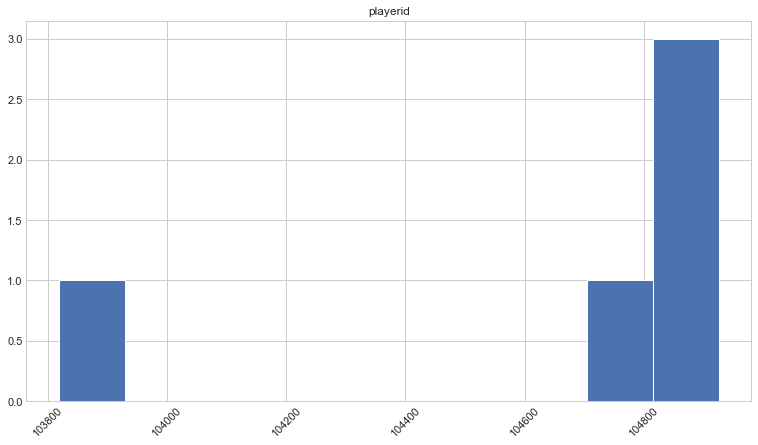

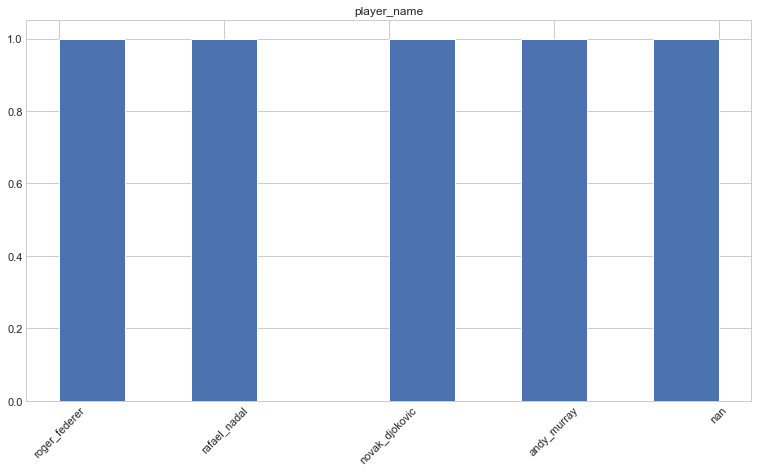

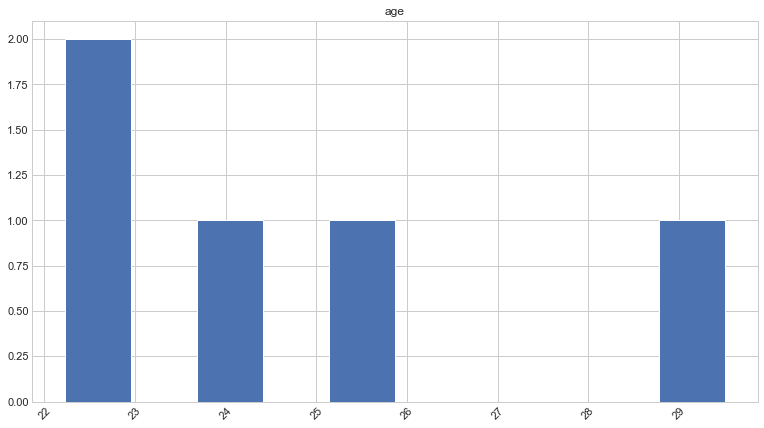

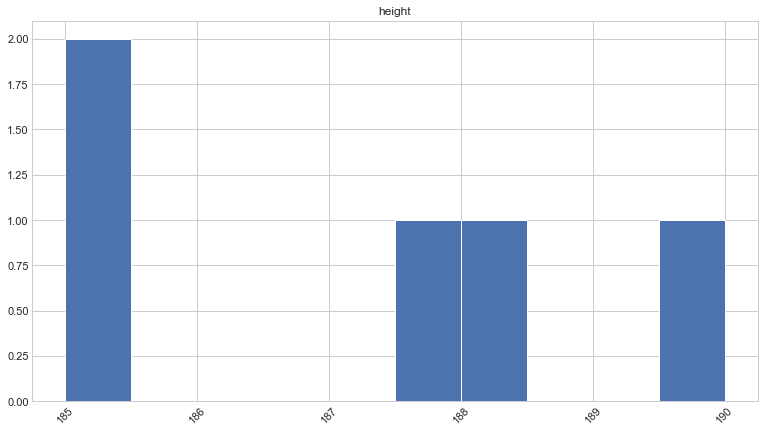

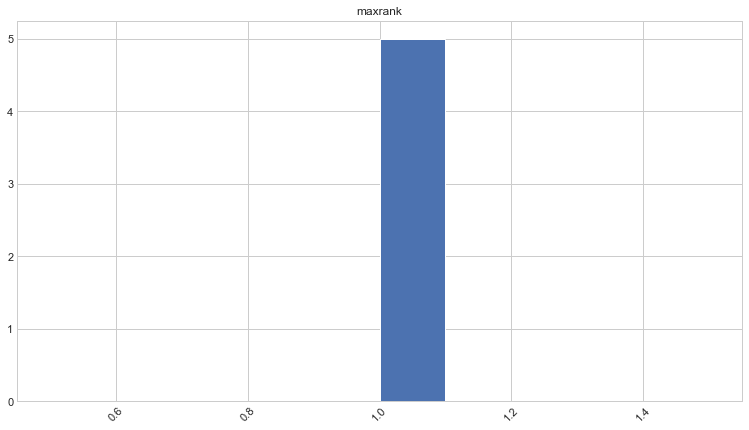

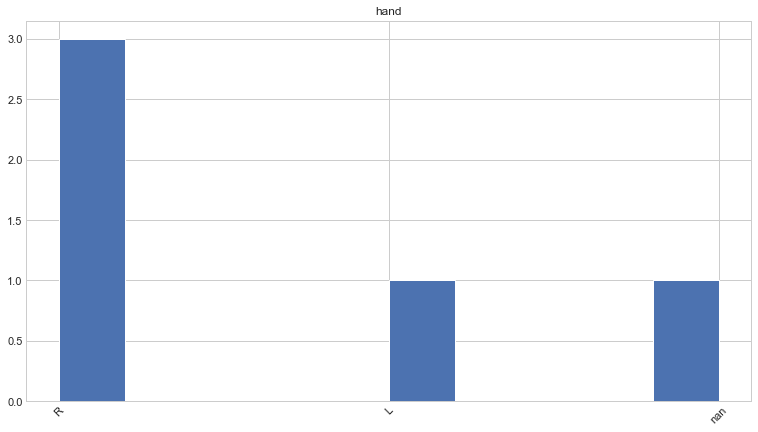

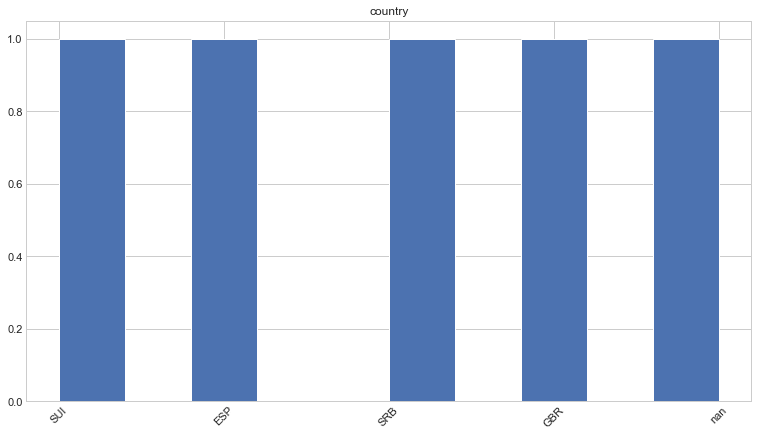

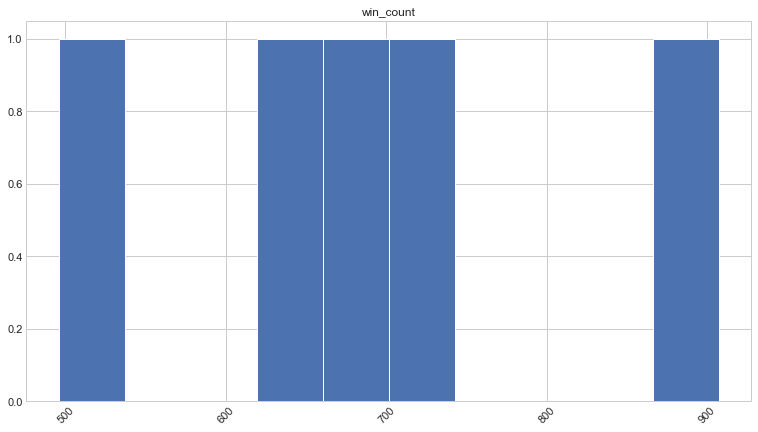

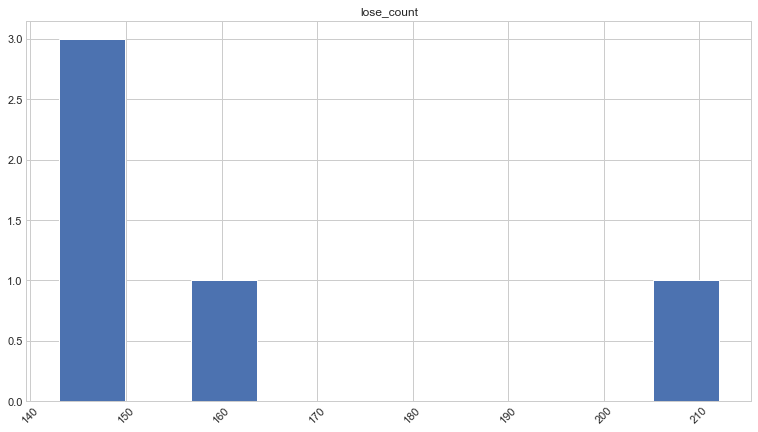

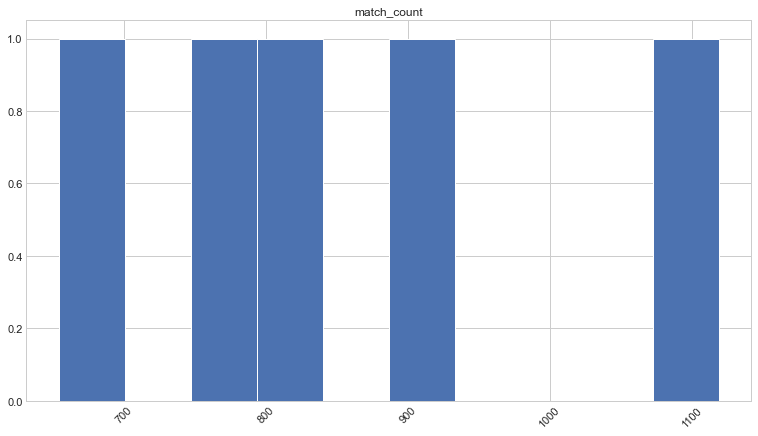

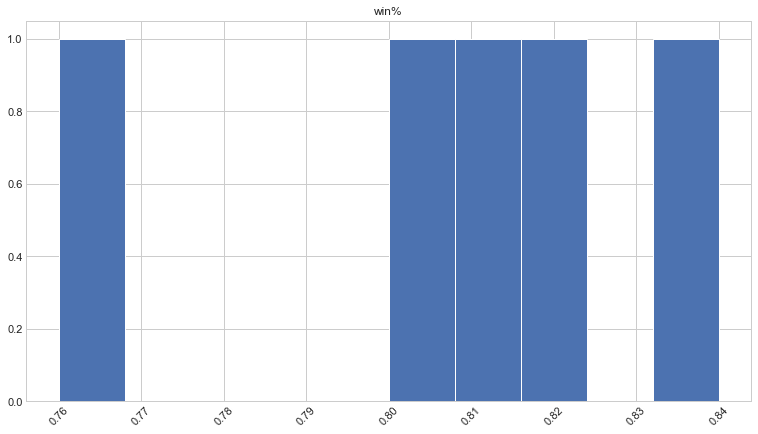

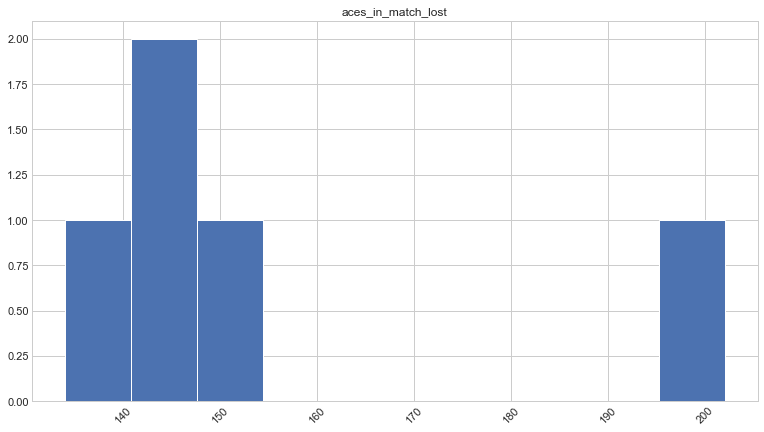

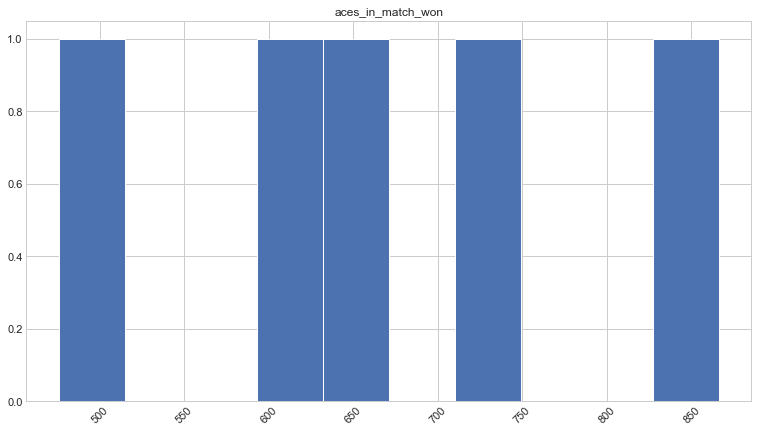

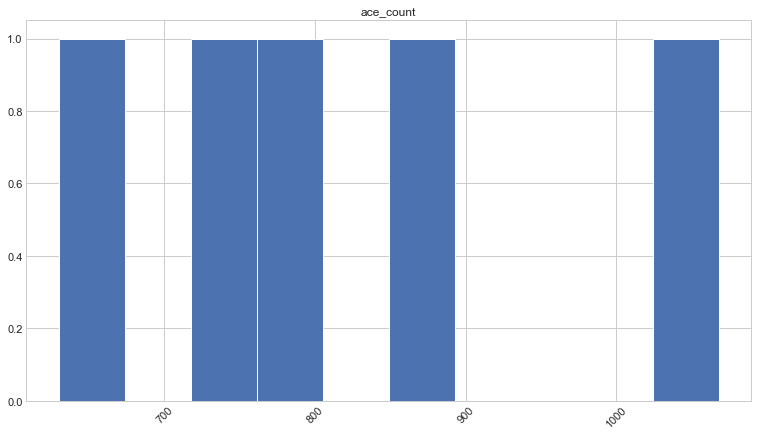

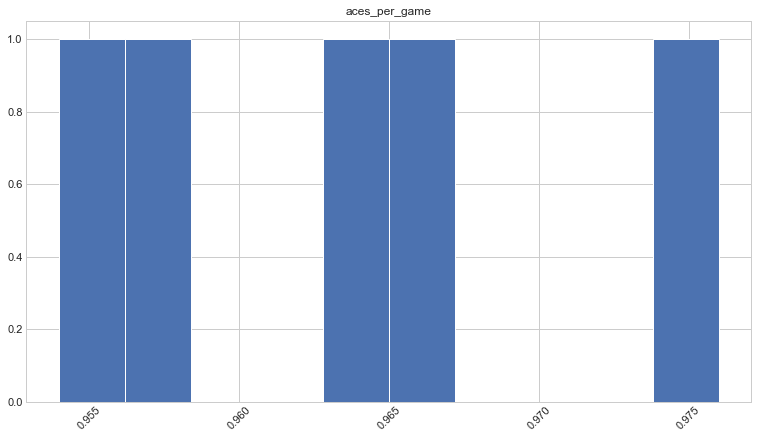

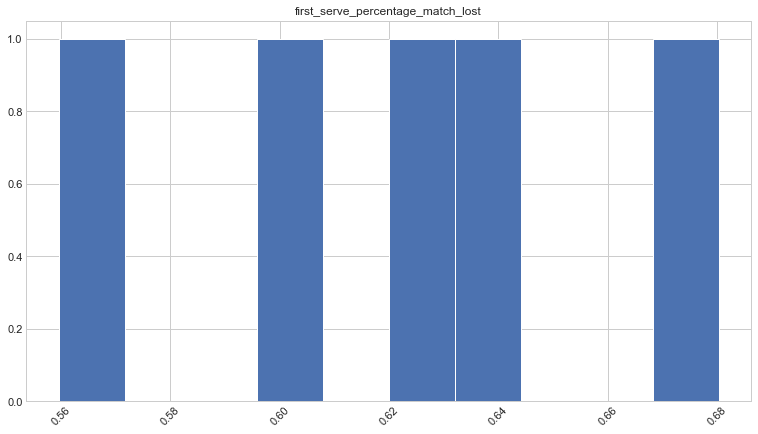

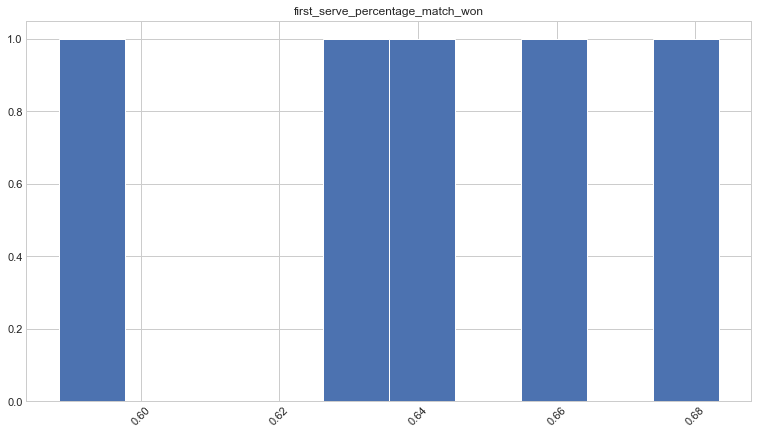

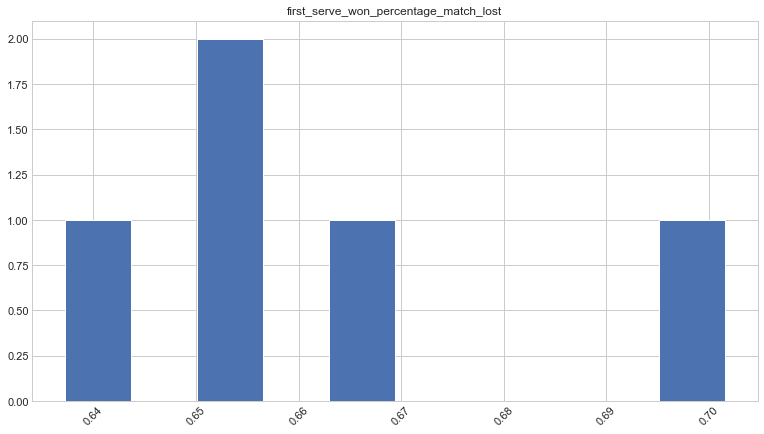

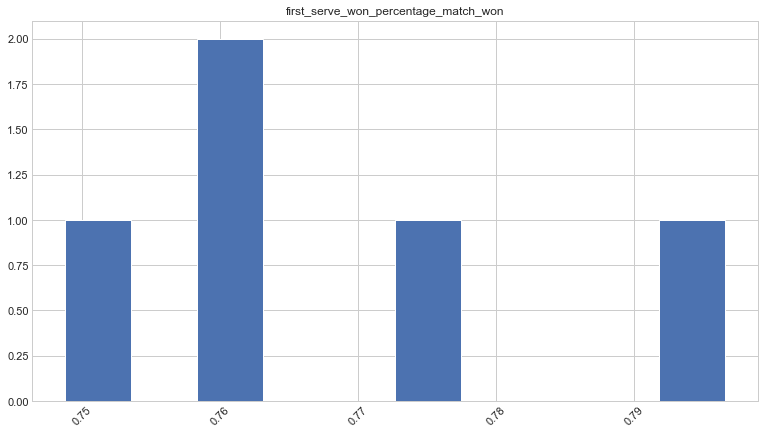

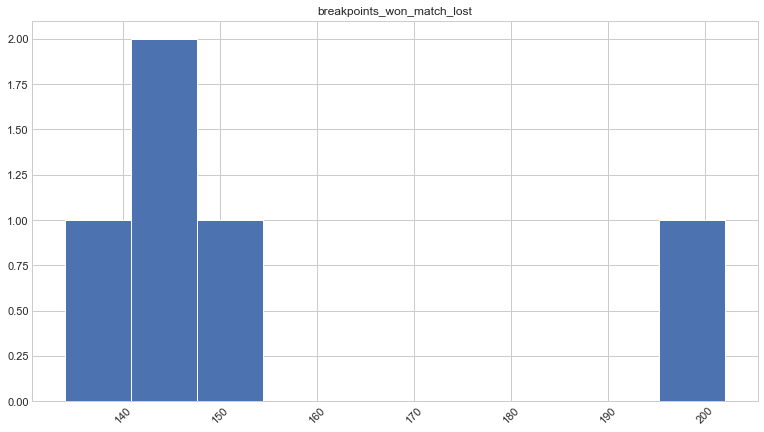

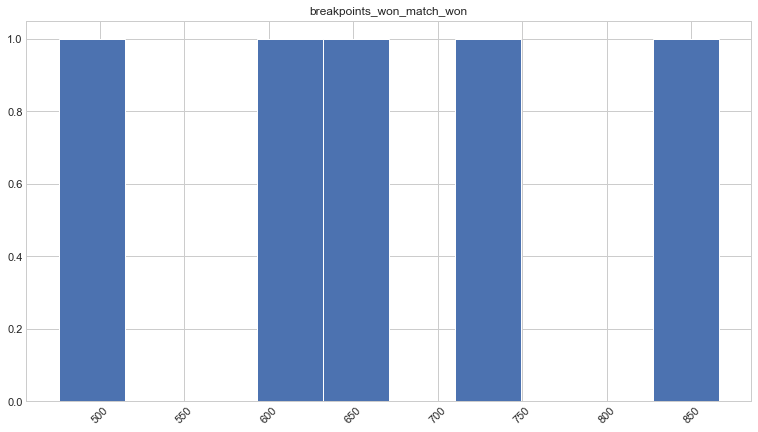

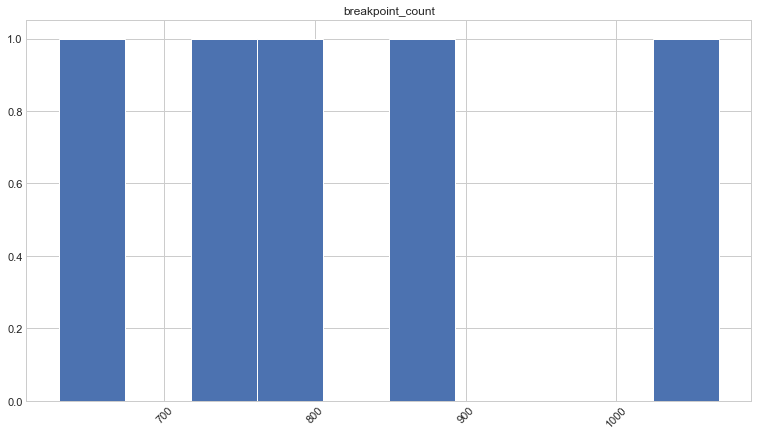

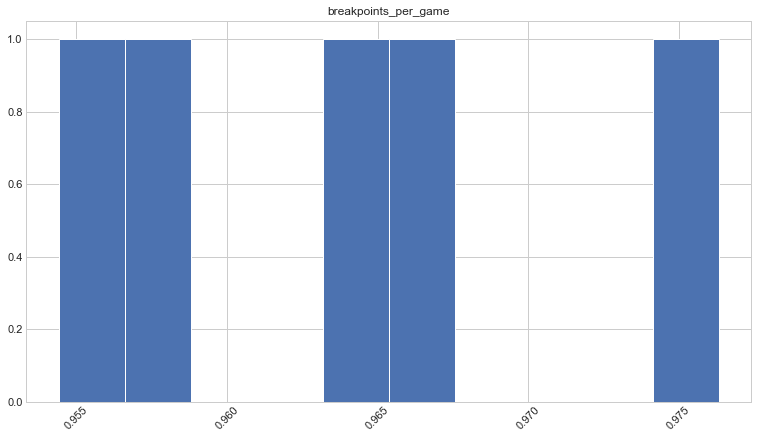

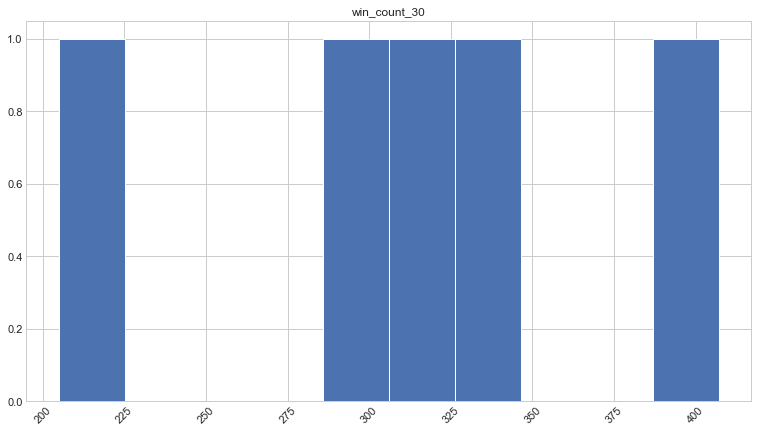

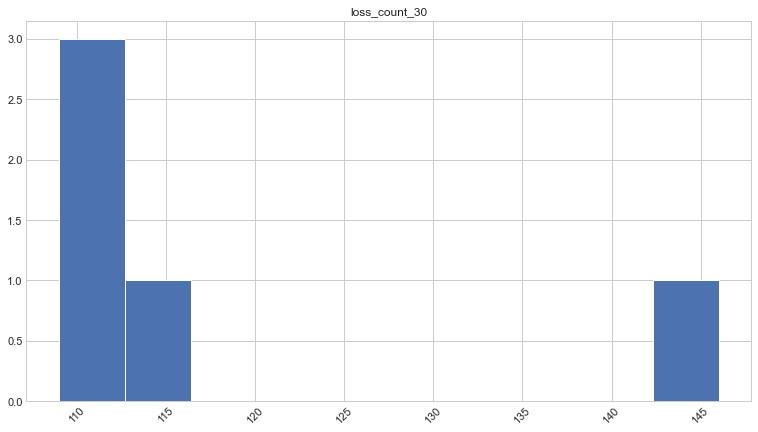

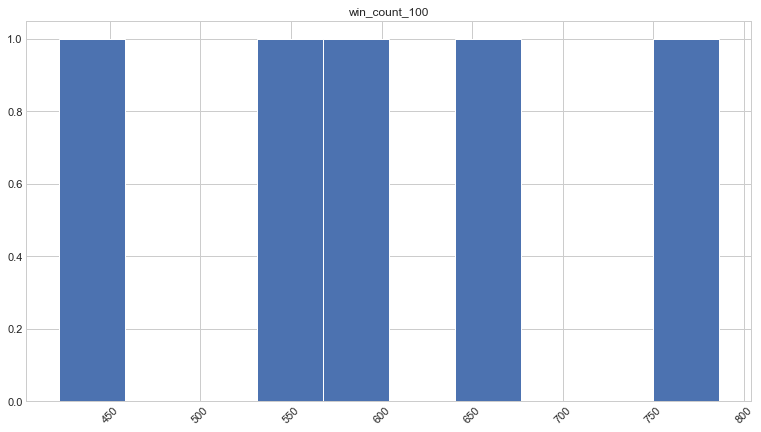

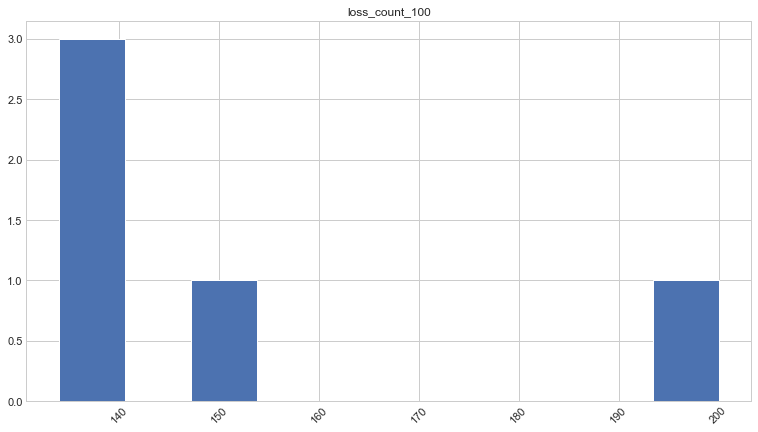

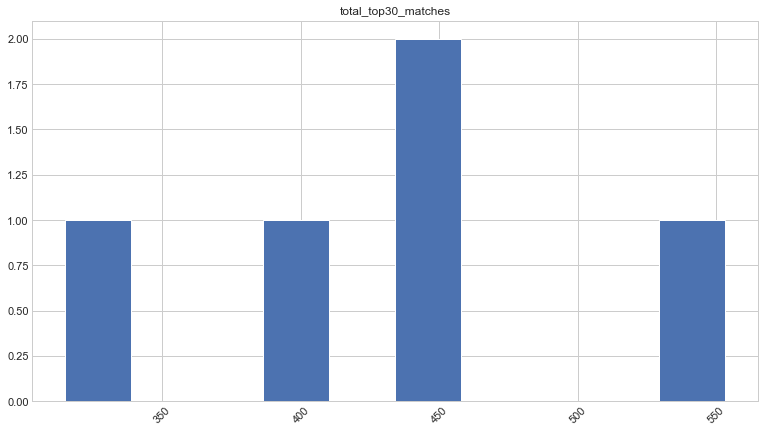

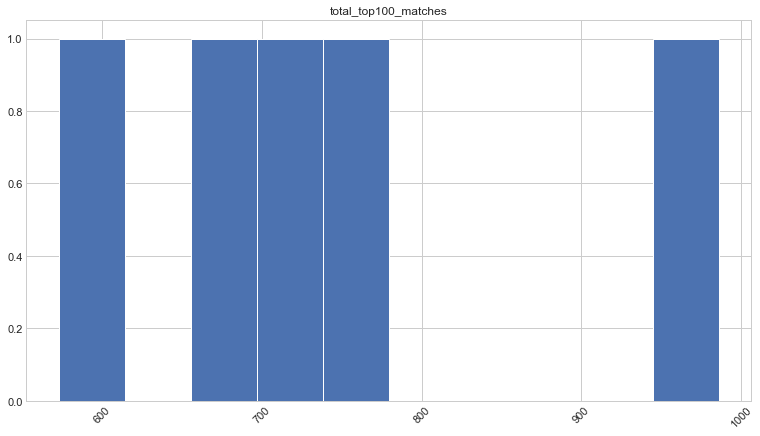

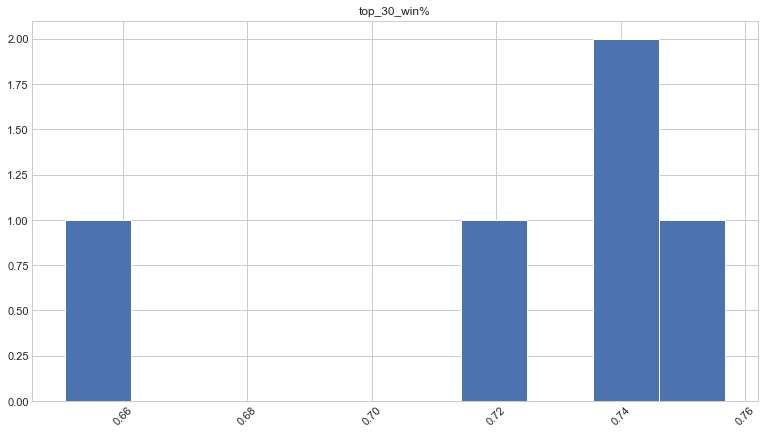

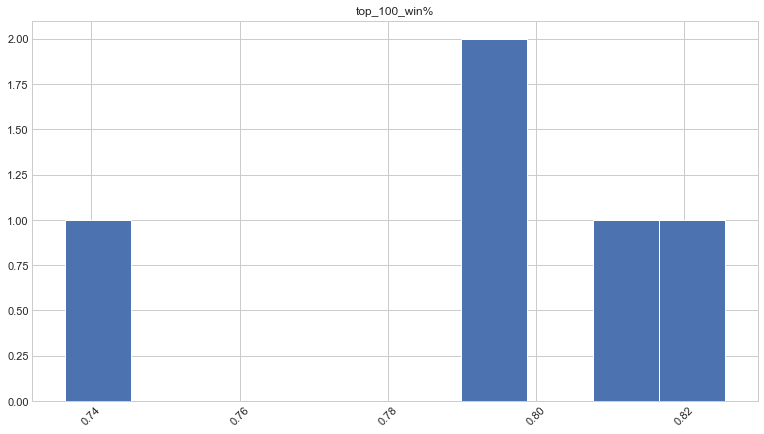

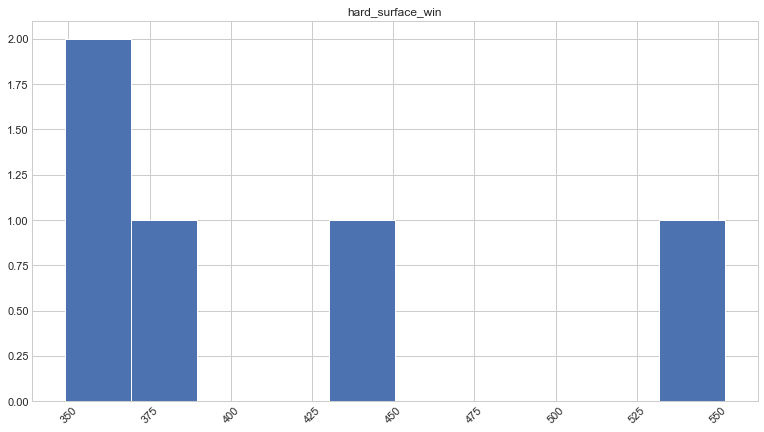

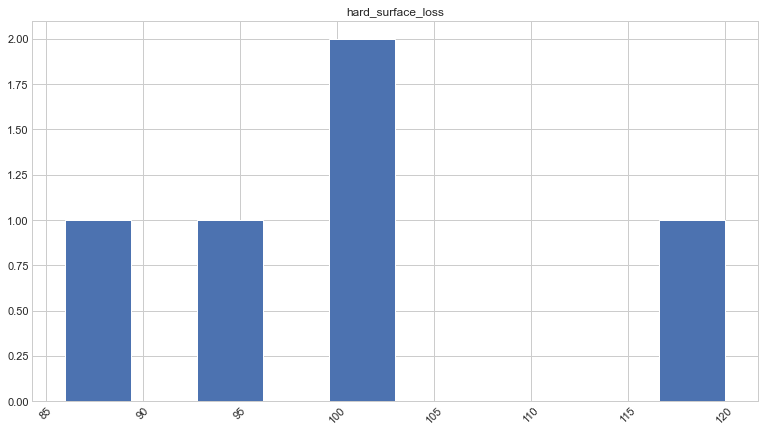

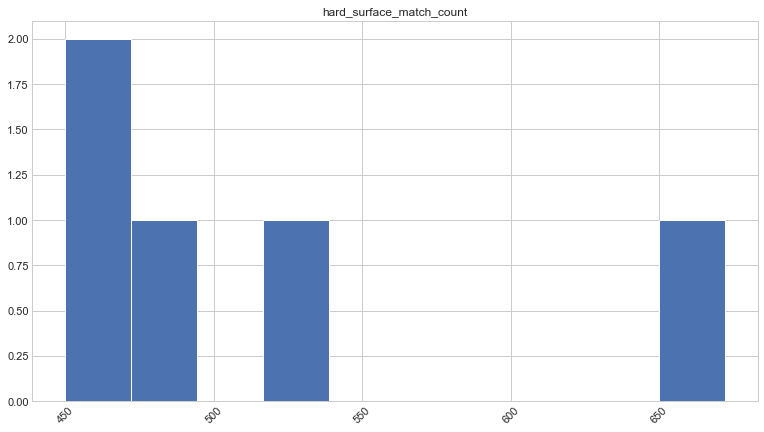

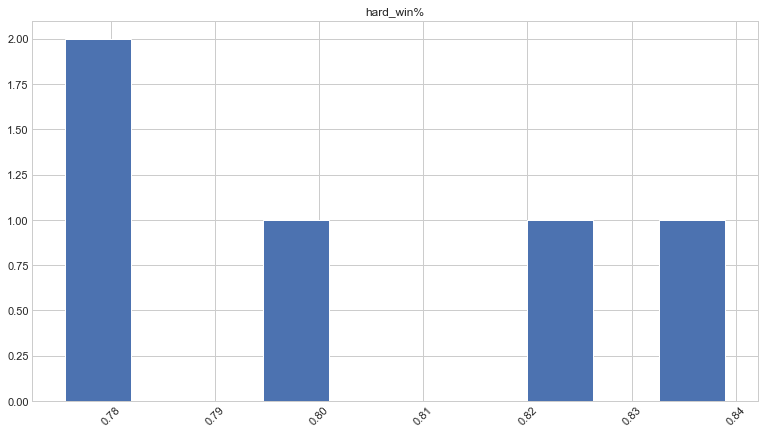

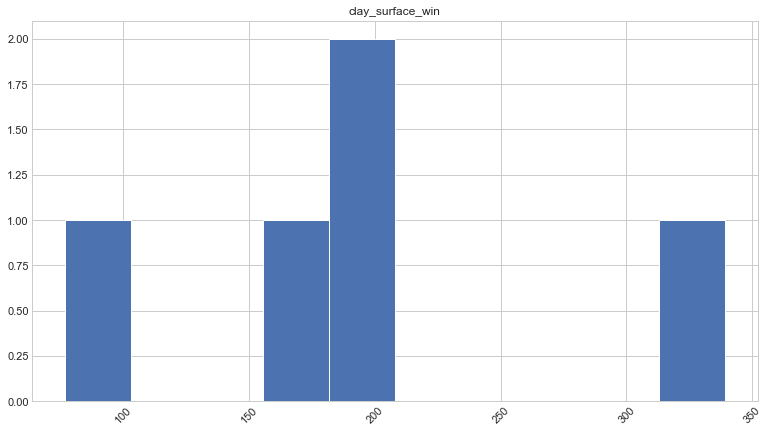

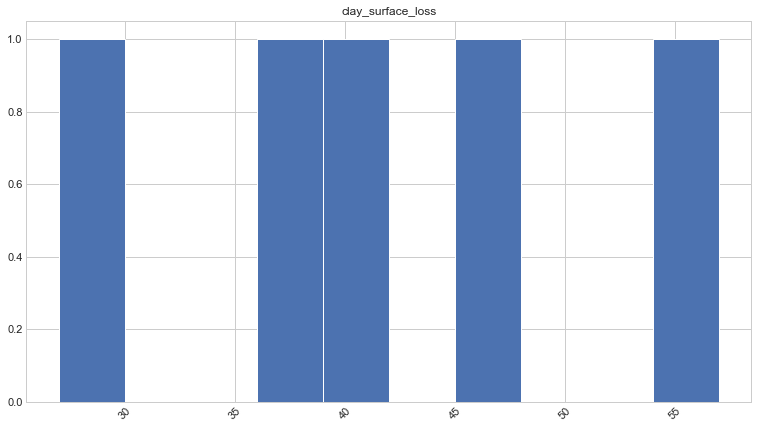

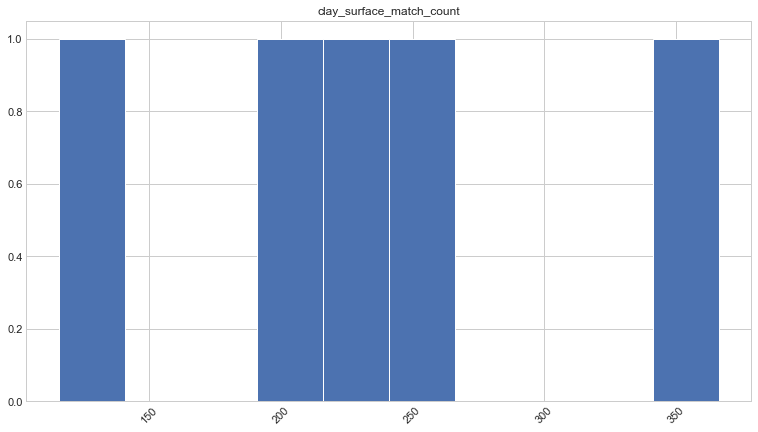

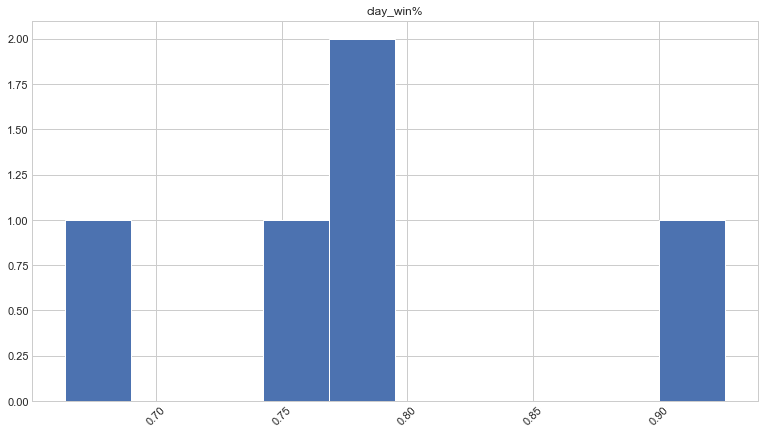

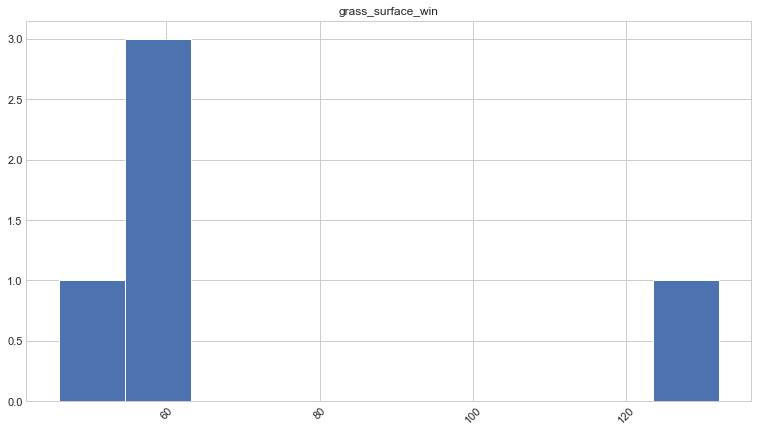

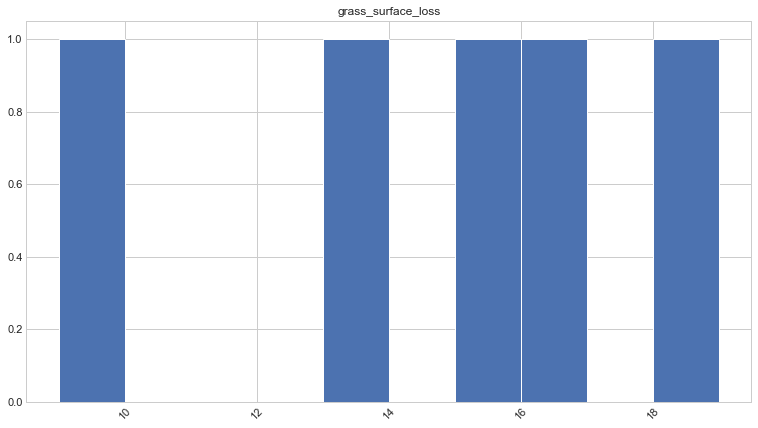

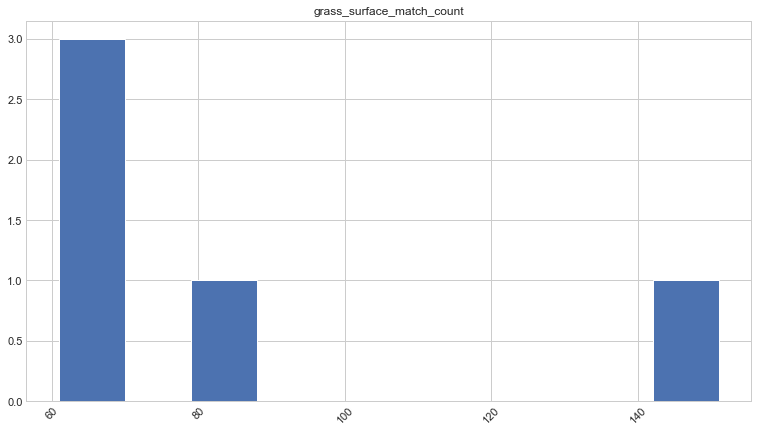

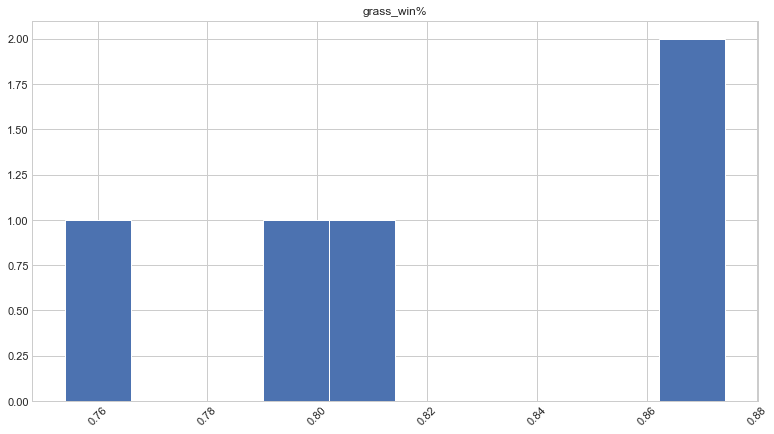

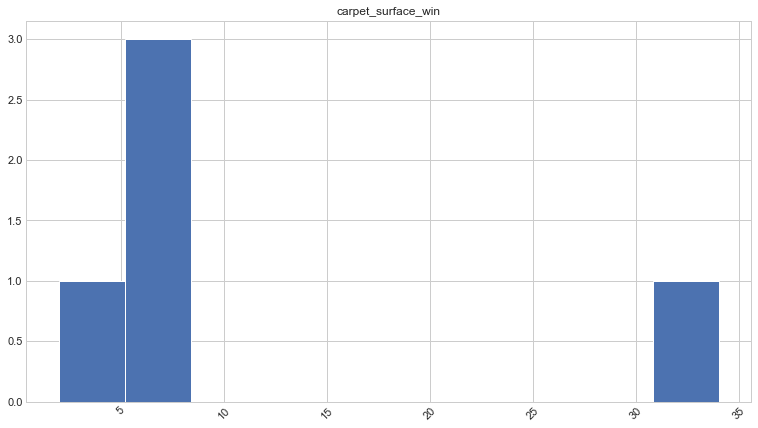

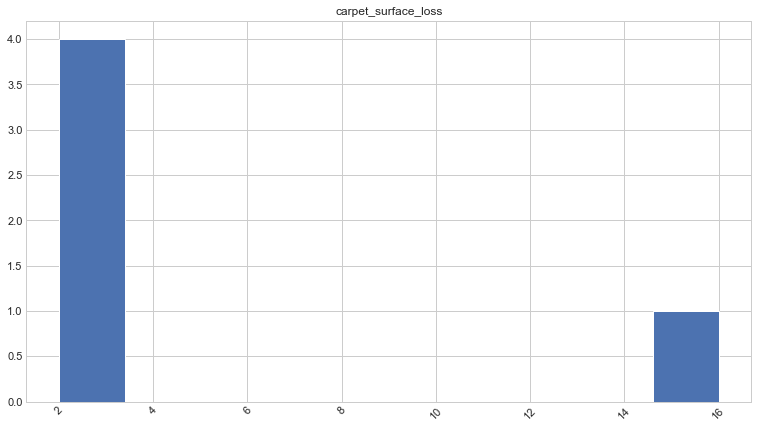

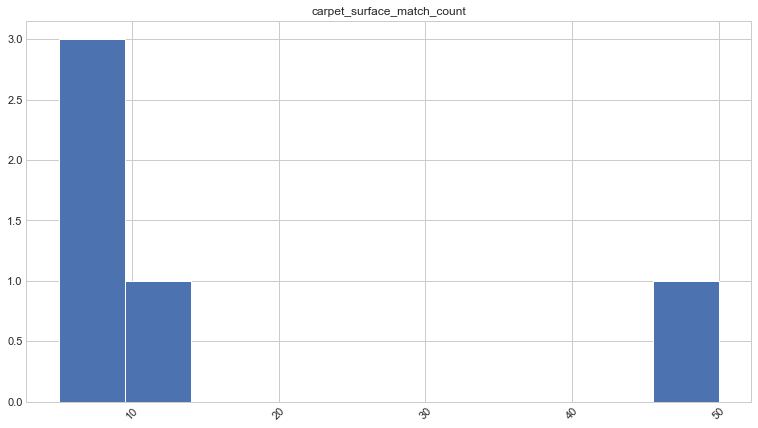

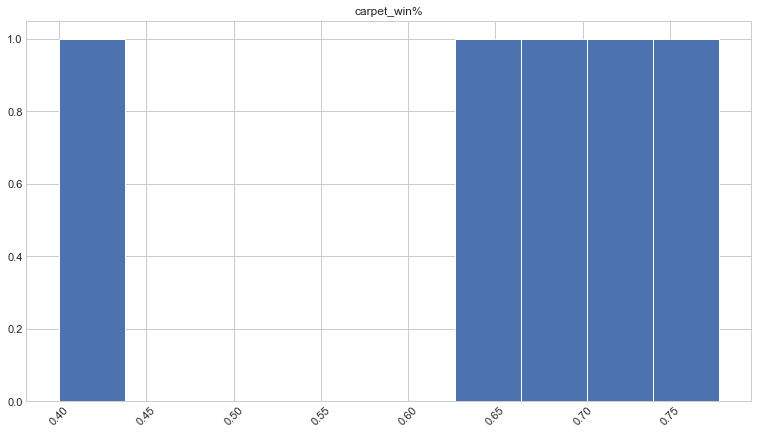

In [20]:
# visualize features for outliers
for col in roger_and_rivals:
    roger_and_rivals[col].hist()
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [21]:
df.describe().columns

Index(['playerid', 'age', 'height', 'maxrank', 'win_count', 'lose_count',
       'match_count', 'win%', 'aces_in_match_lost', 'aces_in_match_won',
       'ace_count', 'aces_per_game', 'first_serve_percentage_match_lost',
       'first_serve_percentage_match_won',
       'first_serve_won_percentage_match_lost',
       'first_serve_won_percentage_match_won', 'breakpoints_won_match_lost',
       'breakpoints_won_match_won', 'breakpoint_count', 'breakpoints_per_game',
       'win_count_30', 'loss_count_30', 'win_count_100', 'loss_count_100',
       'total_top30_matches', 'total_top100_matches', 'top_30_win%',
       'top_100_win%', 'hard_surface_win', 'hard_surface_loss',
       'hard_surface_match_count', 'hard_win%', 'clay_surface_win',
       'clay_surface_loss', 'clay_surface_match_count', 'clay_win%',
       'grass_surface_win', 'grass_surface_loss', 'grass_surface_match_count',
       'grass_win%', 'carpet_surface_win', 'carpet_surface_loss',
       'carpet_surface_match_count', 'car

In [22]:
#Create a datafreame that shows the fifference between roger_federer all the top rivals
rivals_difference = roger_and_rivals[['playerid', 'age', 'height', 'maxrank', 'win_count', 'lose_count',
       'match_count', 'win%', 'aces_in_match_lost', 'aces_in_match_won',
       'ace_count', 'aces_per_game', 'first_serve_percentage_match_lost',
       'first_serve_percentage_match_won',
       'first_serve_won_percentage_match_lost',
       'first_serve_won_percentage_match_won', 'breakpoints_won_match_lost',
       'breakpoints_won_match_won', 'breakpoint_count', 'breakpoints_per_game',
       'win_count_30', 'loss_count_30', 'win_count_100', 'loss_count_100',
       'total_top30_matches', 'total_top100_matches', 'top_30_win%',
       'top_100_win%', 'hard_surface_win', 'hard_surface_loss',
       'hard_surface_match_count', 'hard_win%', 'clay_surface_win',
       'clay_surface_loss', 'clay_surface_match_count', 'clay_win%',
       'grass_surface_win', 'grass_surface_loss', 'grass_surface_match_count',
       'grass_win%', 'carpet_surface_win', 'carpet_surface_loss',
       'carpet_surface_match_count', 'carpet_win%']].diff()

In [23]:
rivals_difference

playerid       age    height  maxrank   win_count  lose_count  match_count  \
0       NaN       NaN       NaN      NaN         NaN         NaN          NaN   
1     926.0 -0.257358  0.000000      0.0 -166.000000       -66.0  -232.000000   
2     180.0  1.984942  3.000000      0.0  -71.000000        -3.0   -74.000000   
3      -7.0  5.289528  2.000000      0.0 -174.000000        15.0  -159.000000   
4     -56.0 -4.187999 -2.333333      0.0  139.666667        -9.0   130.666667   

       win%  aces_in_match_lost  aces_in_match_won   ace_count  aces_per_game  \
0       NaN                 NaN                NaN         NaN            NaN   
1  0.030000          -60.000000             -142.0 -202.000000       0.022000   
2 -0.020000           -8.000000              -79.0  -87.000000      -0.018000   
3 -0.060000           20.000000             -169.0 -149.000000       0.005000   
4  0.046667          -10.666667              139.0  128.333333       0.002667   

   first_serve_percentage_match_lost  first_serve_percentage_match_won  \
0                                NaN                               NaN   
1                           0.082800                          0.054140   
2                          -0.044863                         -0.027067   
3                          -0.075756                         -0.068054   
4                           0.065458                          0.054392   

   first_serve_won_percentage_match_lost  \
0                                    NaN   
1                              -0.064295   
2                               0.015874   
3                               0.015114   
4                              -0.015368   

   first_serve_won_percentage_match_won  breakpoints_won_match_lost  \
0                                   NaN                         NaN   
1                             -0.047811                  -60.000000   
2                              0.014119                   -8.000000   
3                              0.009963                   20.000000   
4                             -0.011348                  -10.666667   

   breakpoints_won_match_won  breakpoint_count  breakpoints_per_game  \
0                        NaN               NaN                   NaN   
1                     -142.0       -202.000000              0.021901   
2                      -79.0        -87.000000             -0.018145   
3                     -169.0       -149.000000              0.005123   
4                      139.0        128.333333              0.002633   

   win_count_30  loss_count_30  win_count_100  loss_count_100  \
0           NaN            NaN            NaN             NaN   
1         -68.0     -37.000000         -143.0      -64.000000   
2         -13.0       6.000000          -55.0       -2.000000   
3        -121.0      -5.000000         -166.0       17.000000   
4          85.0       1.333333          129.0      -10.666667   

   total_top30_matches  total_top100_matches  top_30_win%  top_100_win%  \
0                  NaN                   NaN          NaN           NaN   
1          -105.000000           -207.000000     0.020711      0.028257   
2            -7.000000            -57.000000    -0.017467     -0.011013   
3          -126.000000           -149.000000    -0.088435     -0.077930   
4            86.333333            118.333333     0.064779      0.055624   

   hard_surface_win  hard_surface_loss  hard_surface_match_count  hard_win%  \
0               NaN                NaN                       NaN        NaN   
1       -198.000000              -19.0               -217.000000  -0.043407   
2         94.000000              -15.0                 79.000000   0.060929   
3        -99.000000               15.0                -84.000000  -0.063396   
4         34.666667               -5.0                 29.666667   0.021954   

   clay_surface_win  clay_surface_loss  clay_surface_match_count  clay_win%  \
0               NaN                NaN                       Na

In [24]:
roger_and_rivals

playerid     player_name        age      height  maxrank hand country  \
0    103819   roger_federer  22.485969  185.000000        1    R     SUI   
1    104745    rafael_nadal  22.228611  185.000000        1    L     ESP   
2    104925  novak_djokovic  24.213552  188.000000        1    R     SRB   
3    104918     andy_murray  29.503080  190.000000        1    R     GBR   
4    104862             nan  25.315081  187.666667        1  nan     nan   

    win_count  lose_count  match_count      win%  aces_in_match_lost  \
0  907.000000       212.0  1119.000000  0.810000          202.000000   
1  741.000000       146.0   887.000000  0.840000          142.000000   
2  670.000000       143.0   813.000000  0.820000          134.000000   
3  496.000000       158.0   654.000000  0.760000          154.000000   
4  635.666667       149.0   784.666667  0.806667          143.333333   

   aces_in_match_won    ace_count  aces_per_game  \
0              866.0  1068.000000       0.954000   
1              724.0   866.000000       0.976000   
2              645.0   779.000000       0.958000   
3              476.0   630.000000       0.963000   
4              615.0   758.333333       0.965667   

   first_serve_percentage_match_lost  first_serve_percentage_match_won  \
0                           0.597457                          0.629201   
1                           0.680257                          0.683340   
2                           0.635394                          0.656273   
3                           0.559638                          0.588219   
4                           0.625097                          0.642611   

   first_serve_won_percentage_match_lost  \
0                               0.701538   
1                               0.637243   
2                               0.653117   
3                               0.668232   
4                               0.652864   

   first_serve_won_percentage_match_won  breakpoints_won_match_lost  \
0                              0.796579                  202.000000   
1                              0.748767                  142.000000   
2                              0.762887                  134.000000   
3                              0.772850                  154.000000   
4                              0.761501                  143.333333   

   breakpoints_won_match_won  breakpoint_count  breakpoints_per_game  \
0                      866.0       1068.000000              0.954424   
1                      724.0        866.000000              0.976325   
2                      645.0        779.000000              0.958180   
3                      476.0        630.000000              0.963303   
4                      615.0        758.333333              0.965936   

   win_count_30  loss_count_30  win_count_100  loss_count_100  \
0         407.0     146.000000          786.0      200.000000   
1         339.0     109.000000          643.0      136.000000   
2         326.0     115.000000          588.0      134.000000   
3         205.0     110.000000          422.0      151.000000   
4         290.0     111.333333          551.0      140.333333   

   total_top30_matches  total_top100_matches  top_30_win%  top_100_win%  \
0           553.000000            986.000000     0.735986      0.797160   
1           448.000000            779.000000     0.756696      0.825417   
2           441.000000            722.000000     0.739229      0.814404   
3           315.000000            573.000000     0.650794      0.736475   
4           401.333333            691.333333     0.715573      0.792099   

   hard_surface_win  hard_surface_loss  hard_surface_match_count  hard_win%  \
0        552.000000              120.0                672.000000   0.821429   
1        354.000000              101.0                455.000000   0.778022   
2        448.000000               86.0                534.000000   0.838951   
3        349.000000              101.0                450.000000   0.775

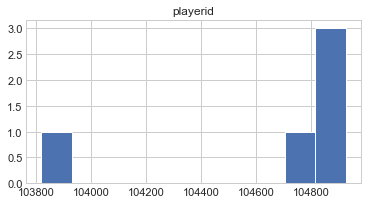

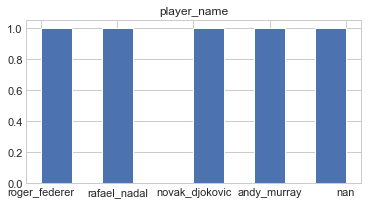

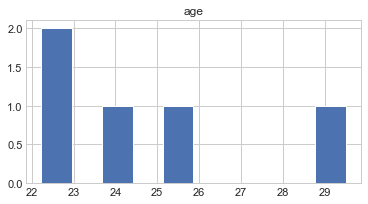

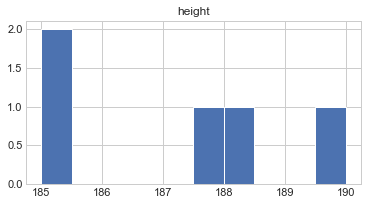

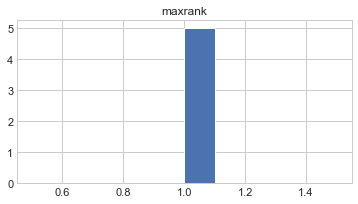

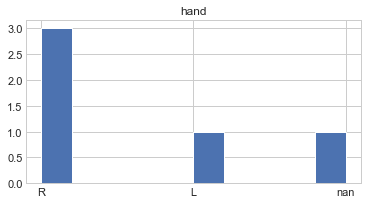

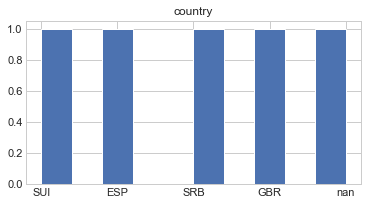

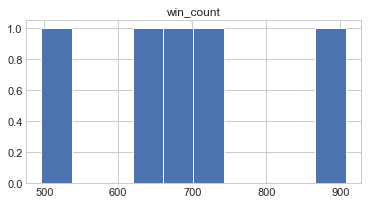

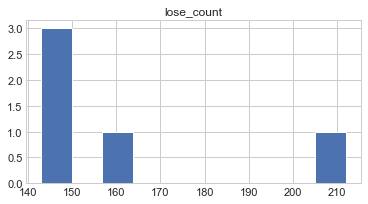

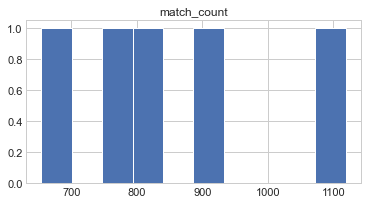

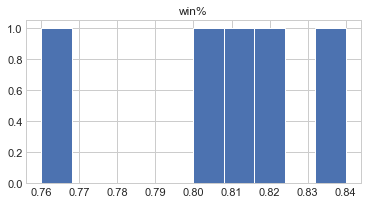

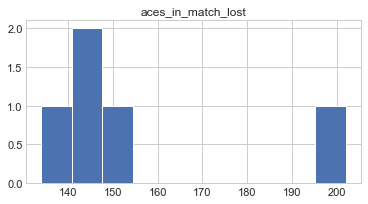

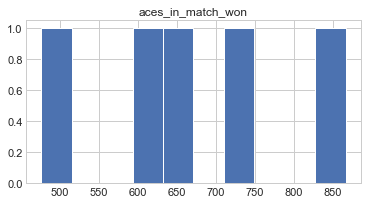

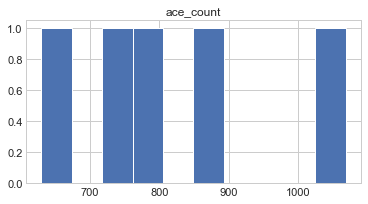

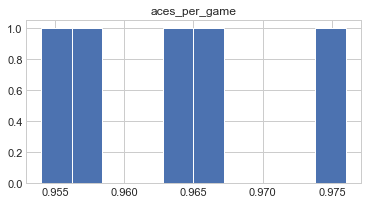

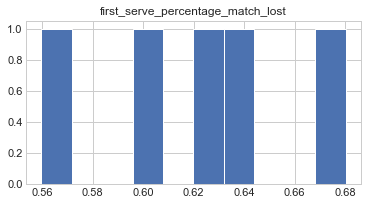

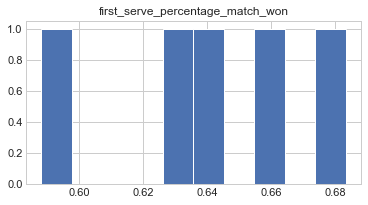

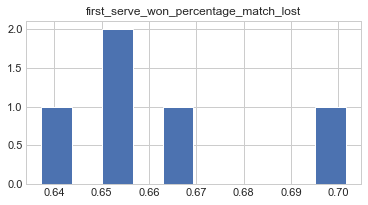

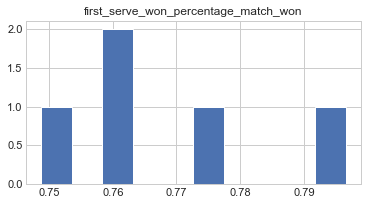

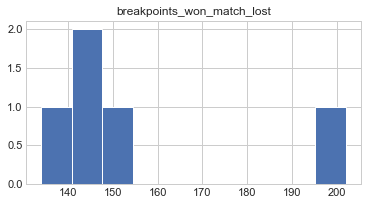

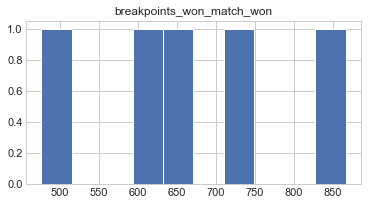

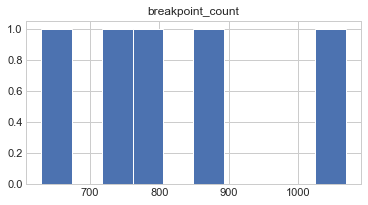

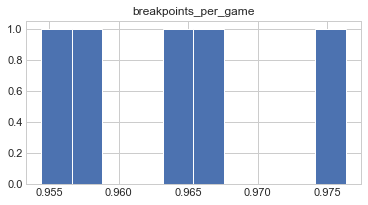

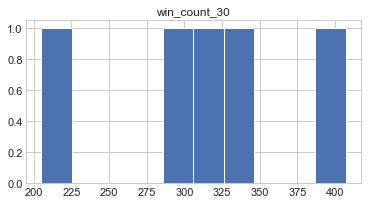

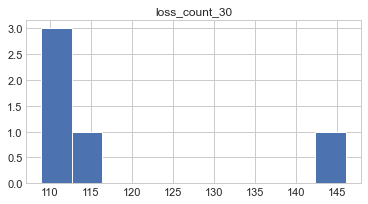

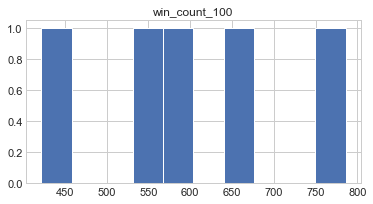

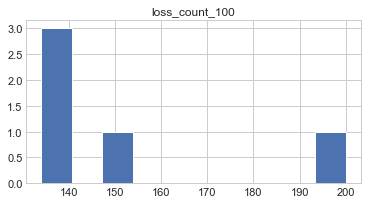

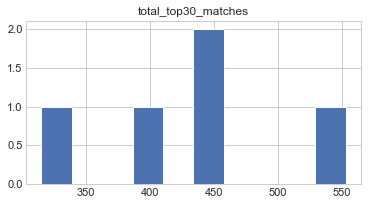

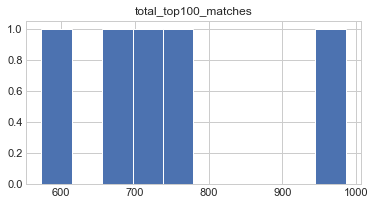

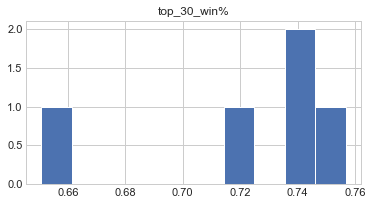

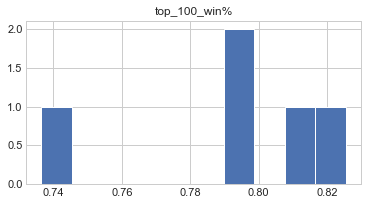

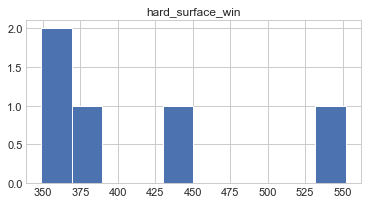

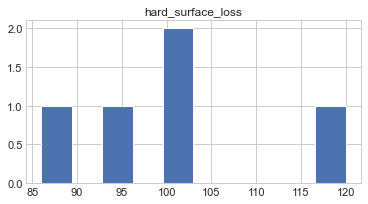

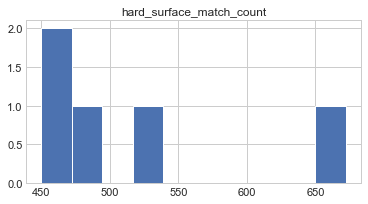

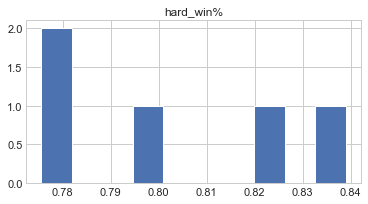

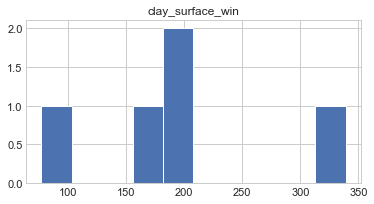

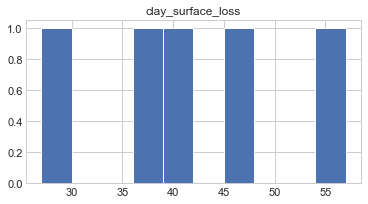

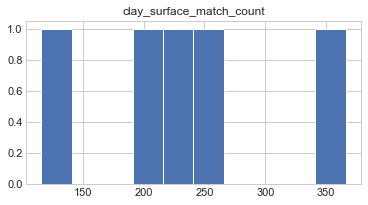

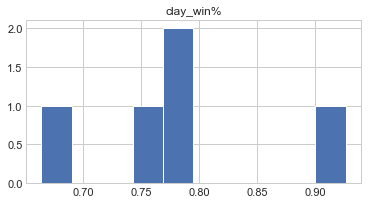

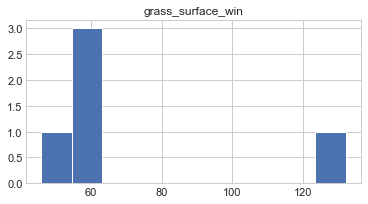

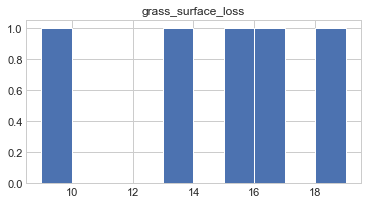

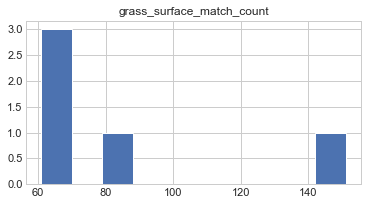

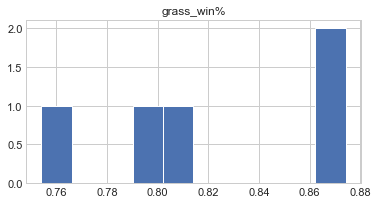

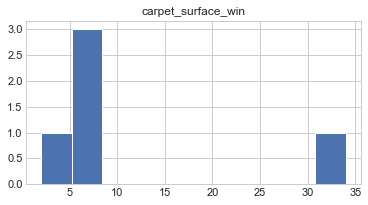

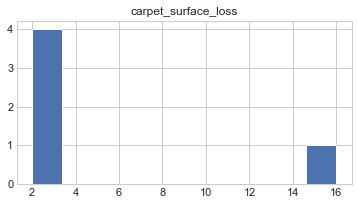

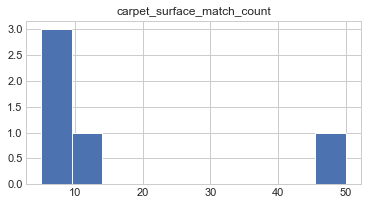

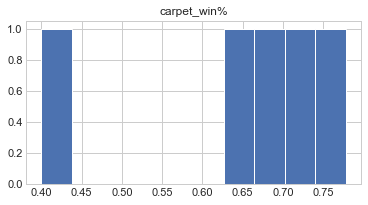

In [25]:
for col in roger_and_rivals.columns:
    plt.figure(figsize=(6,3))
    plt.hist(roger_and_rivals[col])
    plt.title(col)
    plt.show()

 
---

In [26]:
# Look at the .csv with all the games data using the prepare module
match = prepare.prepare_atp()
# df.drop(columns = 'Unnamed: 0', inplace=True)
match.sample(5)

tourney_id  tourney_name surface  draw_size tourney_level  \
tourney_date                                                             
2002-06-10     2002-311  Queen's Club   Grass         56             A   
2014-07-28     2014-418    Washington    Hard         48             A   
1999-08-30     1999-560       US Open    Hard        128             G   
2006-08-28     2006-560       US Open    Hard        128             G   
2013-08-26     2013-560       US Open    Hard        128             G   

              match_num                score  best_of round  minutes  \
tourney_date                                                           
2002-06-10           32              6-4 6-2        3   R32     60.0   
2014-07-28           31              6-4 6-3        3   R32     82.0   
1999-08-30           49       7-6(4) 6-3 6-4        5  R128    126.0   
2006-08-28          101          6-3 6-2 6-3        5   R32     91.0   
2013-08-26           98  6-4 4-6 0-6 6-3 7-5        5   R32    204.0   

                       player_1           player_2  player_1_age  \
tourney_date                                                       
2002-06-10            Jan Vacek     Sjeng Schalken     26.083504   
2014-07-28       Lleyton Hewitt  Marinko Matosevic     33.420945   
1999-08-30          Carlos Moya     Dominik Hrbaty     23.006160   
2006-08-28          Marat Safin     Olivier Rochus     26.584531   
2013-08-26    Marcel Granollers        Tim Smyczek     27.373032   

              player_2_age player_1_entry player_2_entry player_1_hand  \
tourney_date                                                             
2002-06-10       25.752225            NaN            NaN             R   
2014-07-28       28.969199            NaN            NaN             R   
1999-08-30       21.650924            NaN            NaN             R   
2006-08-28       25.607118            NaN            NaN             R   
2013-08-26       25.656400            NaN             WC             R   

             player_2_hand  player_1_ht  player_2_ht  player_1_id  \
tourney_date                                                        
2002-06-10               R        198.0        193.0       102788   
2014-07-28               R        180.0        194.0       103720   
1999-08-30               R        190.0        183.0       102845   
2006-08-28               R        193.0        168.0       103498   
2013-08-26               R        190.0        175.0       104719   

              player_2_id player_1_ioc player_2_ioc      player_1_name  \
tourney_date                                                             
2002-06-10         102854          CZE          NED          Jan Vacek   
2014-07-28         104594          AUS          AUS     Lleyton Hewitt   
1999-08-30         103103          ESP          SVK        Carlos Moya   
2006-08-28         103694          RUS          BEL        Marat Safin   
2013-08-26         105065          ESP          USA  Marcel Granollers   

                  player_2_name  player_1_rank  player_2_rank  \
tourney_date                                                    
2002-06-10       Sjeng Schalken           79.0           34.0   
2014-07-28    Marinko Matosevic           45.0           49.0   
1999-08-30       Dominik Hrbaty            9.0           22.0   
2006-08-28       Olivier Rochus          104.0           30.0   
2013-08-26          Tim Smyczek           43.0          109.0   

              player_1_rank_points  player_2_rank_points  player_1_seed  \
tourney_date                                                              
2002-06-10                   472.0                1070.0            NaN   
2014-07-28                   960.0                 887.0           14.0   
1999-08-30                  2292.0                1440.0            8.0   
2006-08-28                   400.0                1010.0            NaN   
2013-08-26                   975.0                 507.0            NaN   

        

In [27]:
best_of_3 = match[match.best_of == 3]
best_of_5 = match[match.best_of == 5]
best_of_3

tourney_id  \
tourney_date                                    
1999-01-11                           1999-338   
1999-01-11                           1999-338   
1999-01-11                           1999-338   
1999-01-11                           1999-338   
1999-01-11                           1999-338   
...                                       ...   
2019-11-23    2019-M-DC-2019-FLS-M-GBR-ESP-01   
2019-11-23    2019-M-DC-2019-FLS-M-RUS-CAN-01   
2019-11-23    2019-M-DC-2019-FLS-M-RUS-CAN-01   
2019-11-23    2019-M-DC-2019-FLS-M-GBR-ESP-01   
2019-11-24    2019-M-DC-2019-FLS-M-CAN-ESP-01   

                                 tourney_name surface  draw_size  \
tourney_date                                                       
1999-01-11                             Sydney    Hard         32   
1999-01-11                             Sydney    Hard         32   
1999-01-11                             Sydney    Hard         32   
1999-01-11                             Sydney    Hard         32   
1999-01-11                             Sydney    Hard         32   
...                                       ...     ...        ...   
2019-11-23    Davis Cup Finals SF: GBR vs ESP    Hard          4   
2019-11-23    Davis Cup Finals SF: RUS vs CAN    Hard          4   
2019-11-23    Davis Cup Finals SF: RUS vs CAN    Hard          4   
2019-11-23    Davis Cup Finals SF: GBR vs ESP    Hard          4   
2019-11-24     Davis Cup Finals F: CAN vs ESP    Hard          4   

             tourney_level  match_num        score  best_of round  minutes  \
tourney_date                                                                 
1999-01-11               A         16   7-6(1) 6-1        3   R32     84.0   
1999-01-11               A         15  5-7 6-3 6-2        3   R32    115.0   
1999-01-11               A         14      6-2 6-4        3   R32     61.0   
1999-01-11               A         13      6-1 6-3        3   R32     43.0   
1999-01-11               A         12   6-3 7-6(4)        3   R32     85.0   
...                    ...        ...          ...      ...   ...      ...   
2019-11-23               D          2      6-4 6-0        3    RR     85.0   
2019-11-23               D          1      6-4 6-4        3    RR     85.0   
2019-11-23               D          2  6-4 4-6 6-4        3    RR    110.0   
2019-11-23               D          1   6-3 7-6(3)        3    RR     81.0   
2019-11-24               D          2   6-3 7-6(7)        3    RR    115.0   

                      player_1          player_2  player_1_age  player_2_age  \
tourney_date                                                                   
1999-01-11      Lleyton Hewitt    Patrick Rafter     17.878166     26.036961   
1999-01-11      Martin Damm Sr    Nicolas Kiefer     26.444901     21.519507   
1999-01-11       Jan Siemerink    Mariano Puerta     28.744695     20.312115   
1999-01-11        Hicham Arazi       Todd Martin     25.229295     28.511978   
1999-01-11         Carlos Moya  Thomas Johansson     22.373717     23.802875   
...                        ...               ...           ...           ...   
2019-11-23        Daniel Evans      Rafael Nadal     29.489391     33.459274   
2019-11-23       Andrey Rublev    Vasek Pospisil     22.078029     29.404517   
2019-11-23    Denis Shapovalov   Karen Khachanov     20.594114     23.493498   
2019-11-23     Feliciano Lopez       Kyle Edmund     38.160164     24.859685   
2019-11-24    Denis Shapovalov      Rafael Nadal     20.594114     33.459274   

             player_1_entry player_2_entry player_1_hand player_2_hand  \
tourney_date                                                             
1999-01-11              NaN            NaN             R             R   
1999-01-11                Q            NaN             R             R   
1999-01-11              NaN            NaN             L             L   
1999-01-11              NaN            NaN             L             R   
1999-01-11  

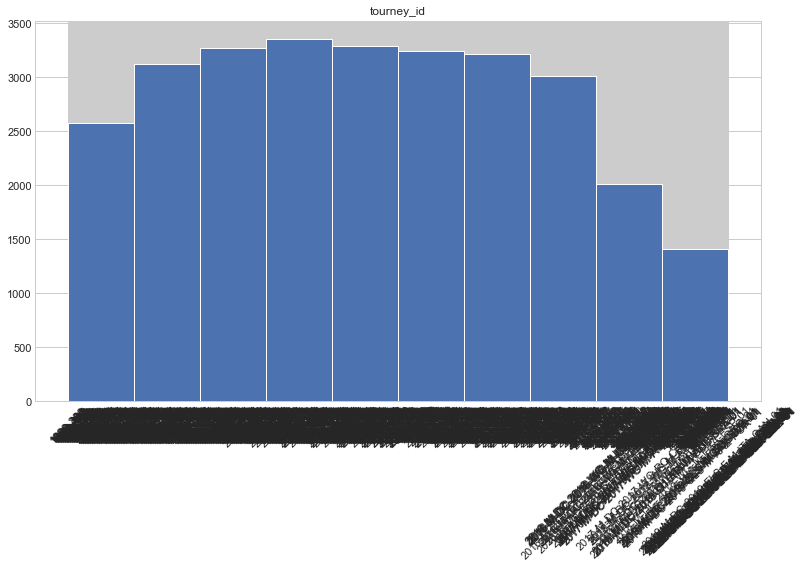

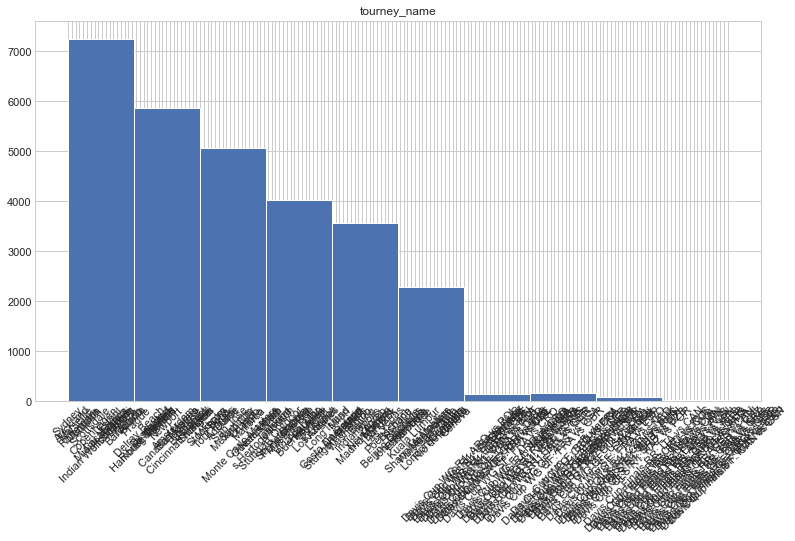

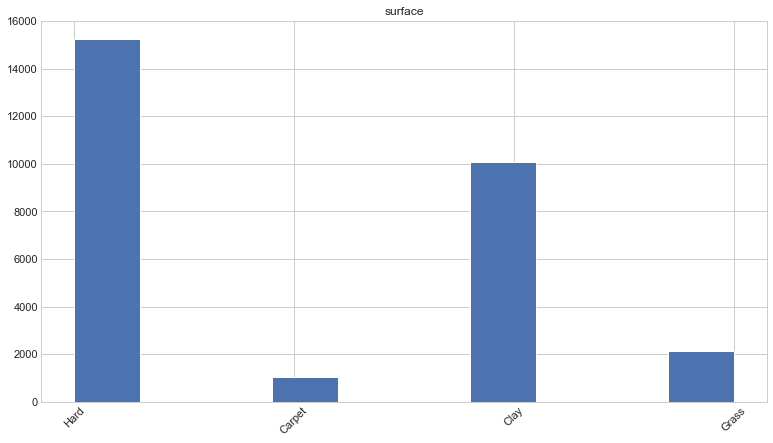

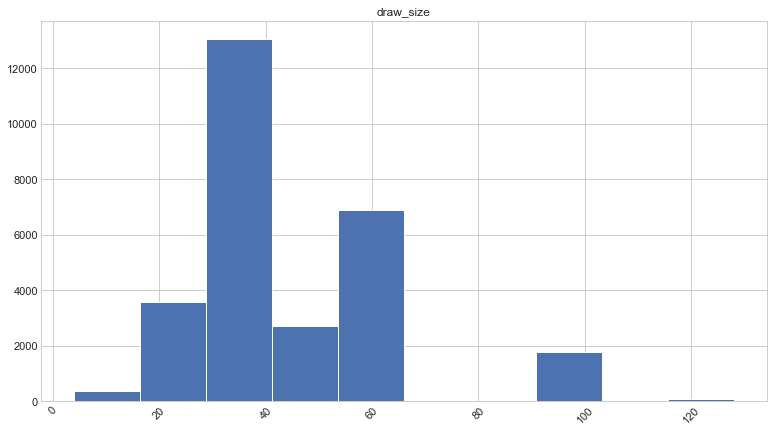

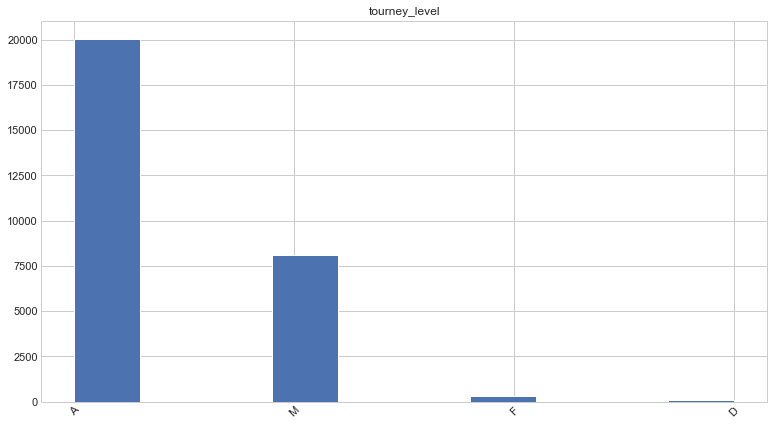

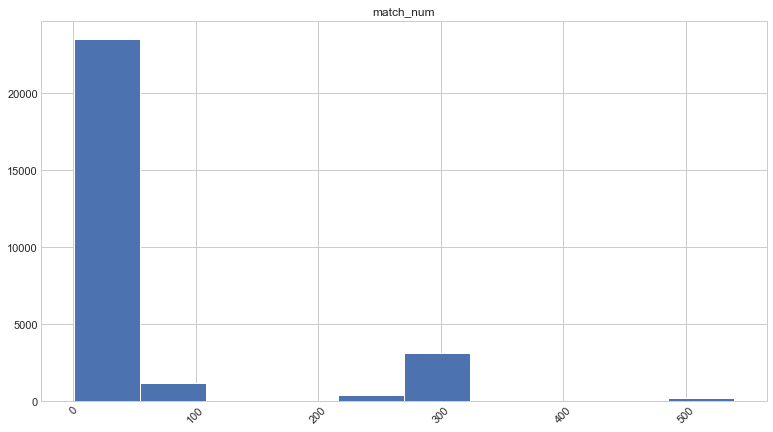

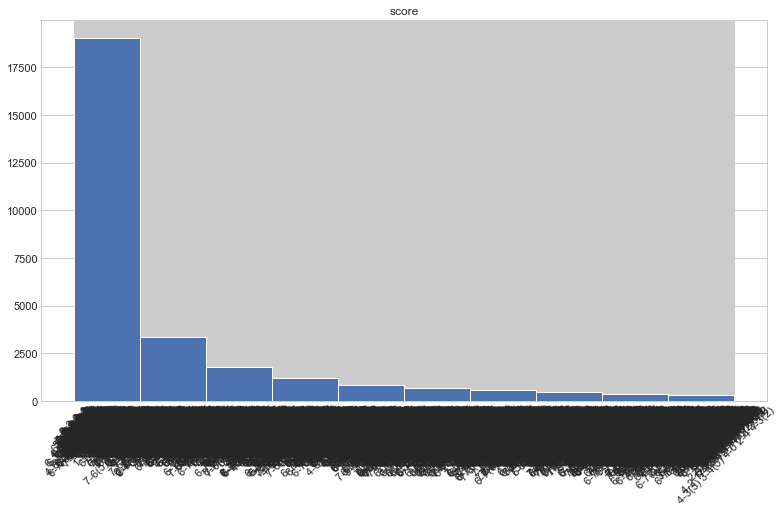

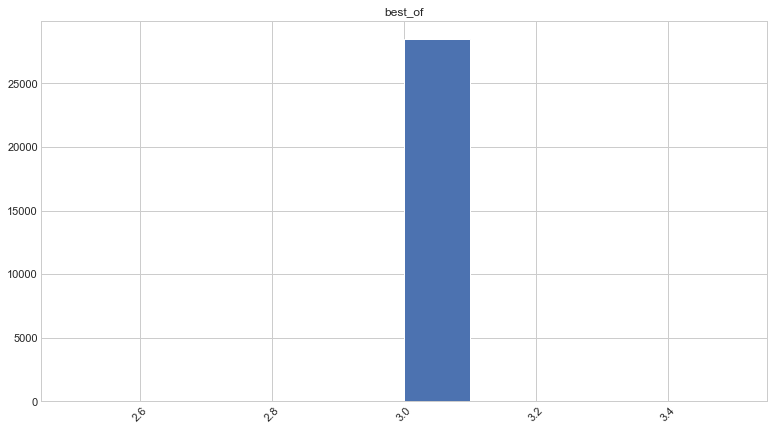

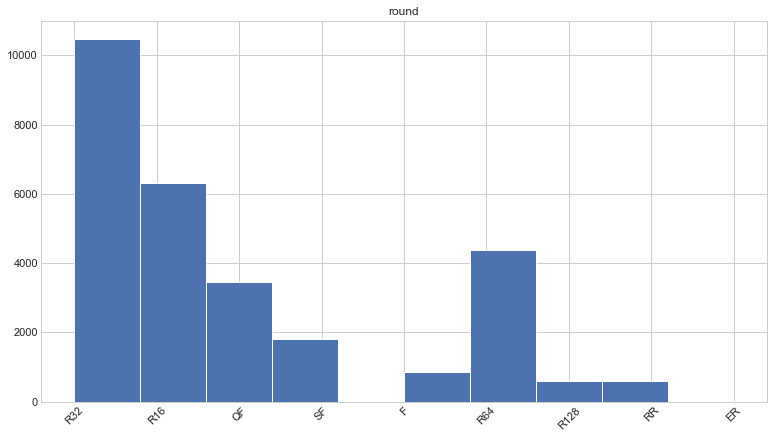

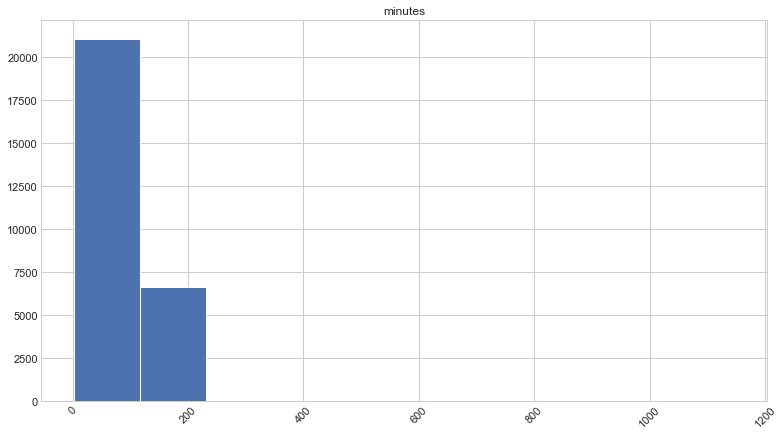

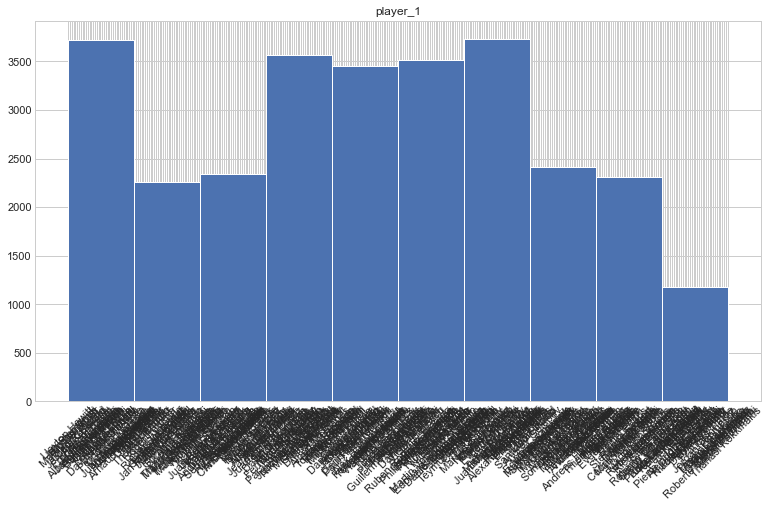

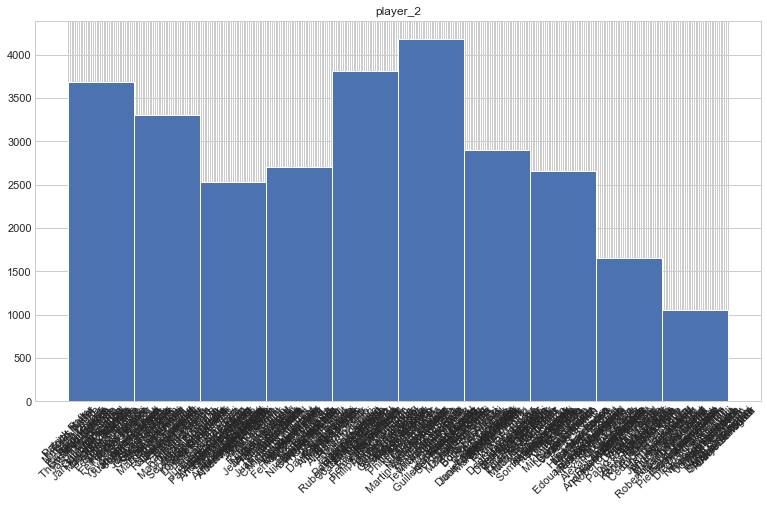

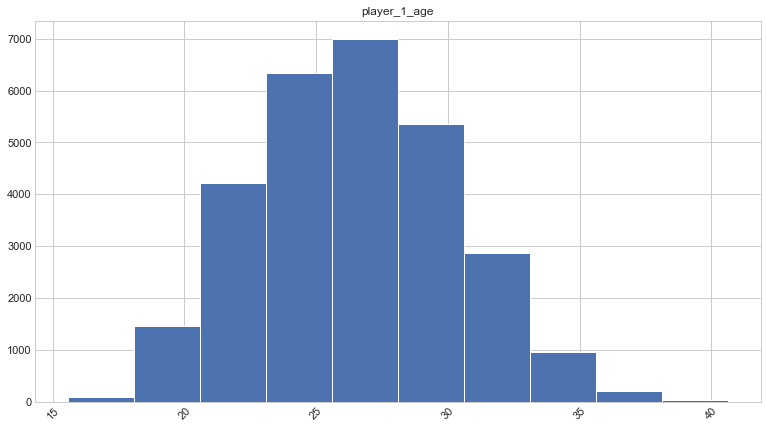

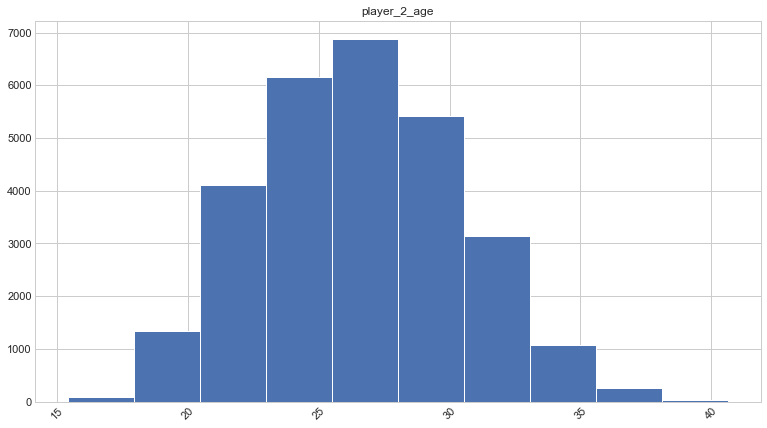

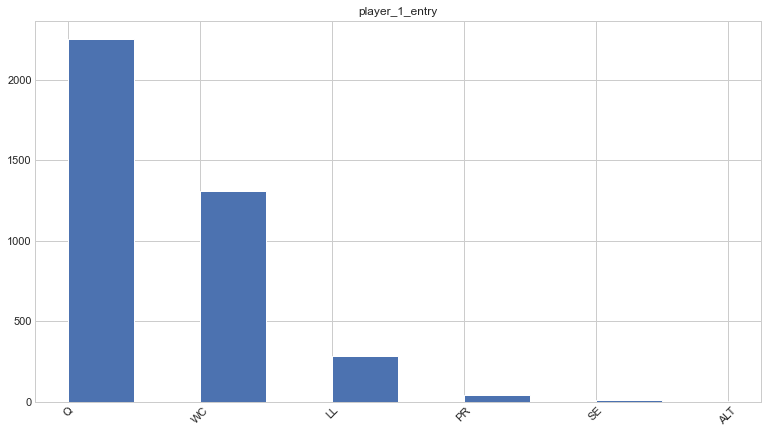

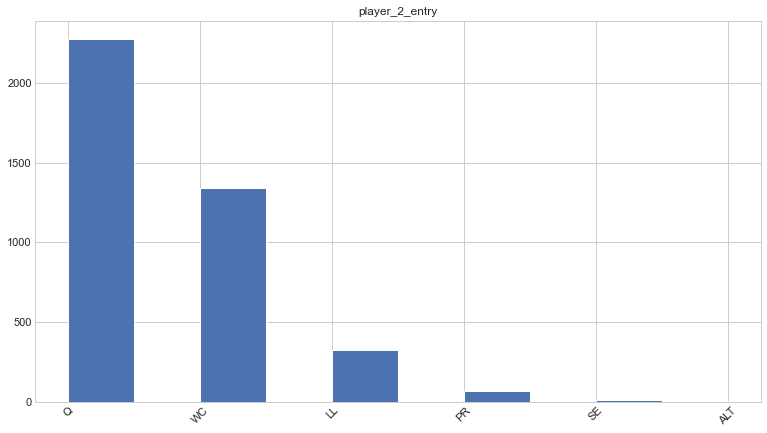

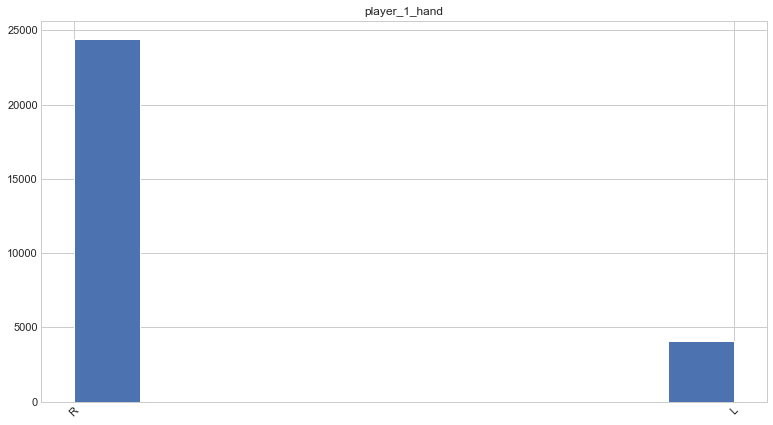

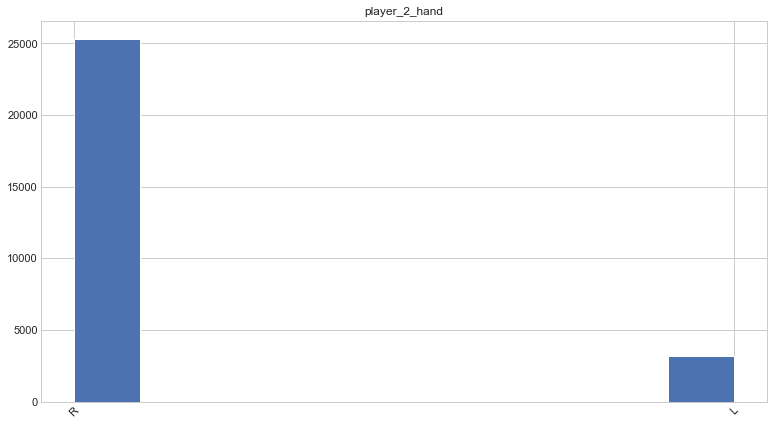

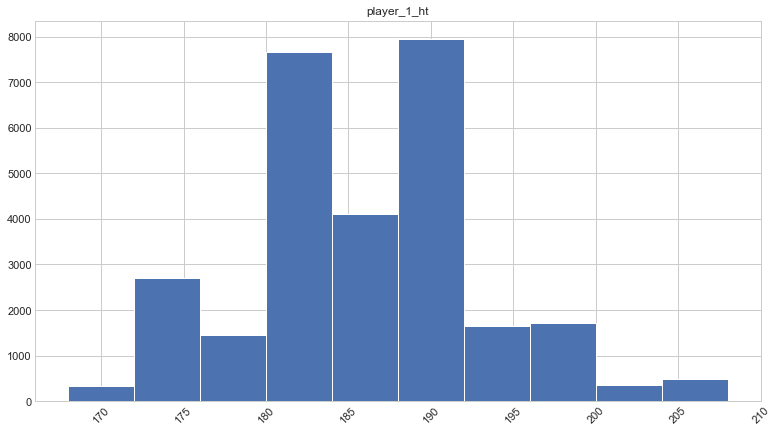

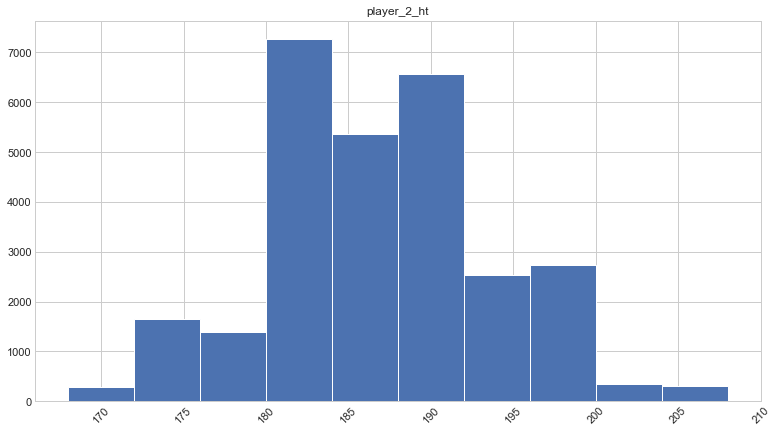

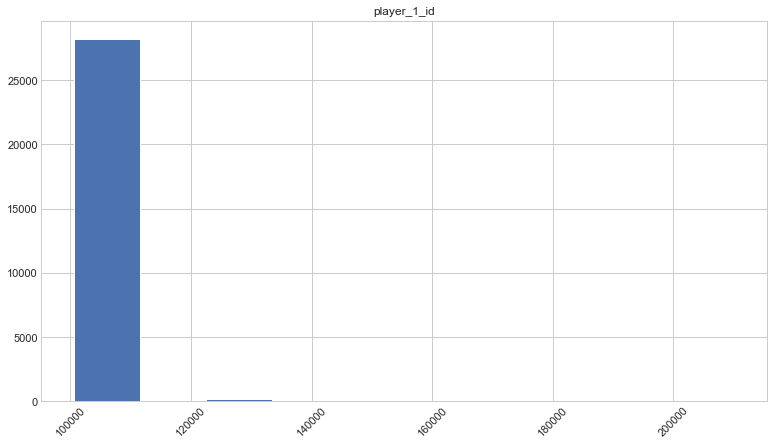

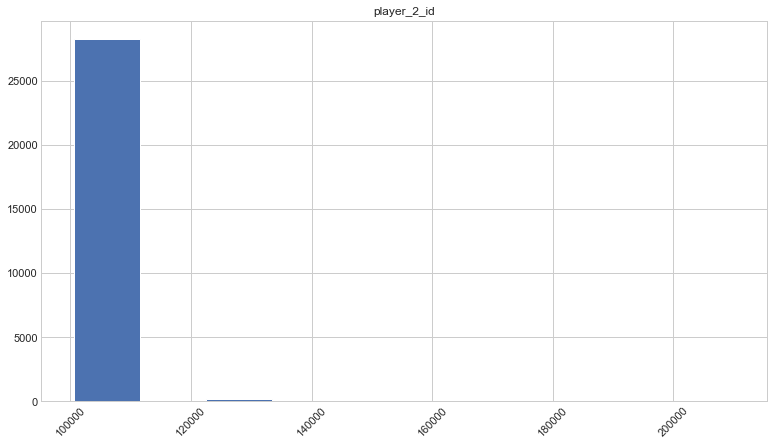

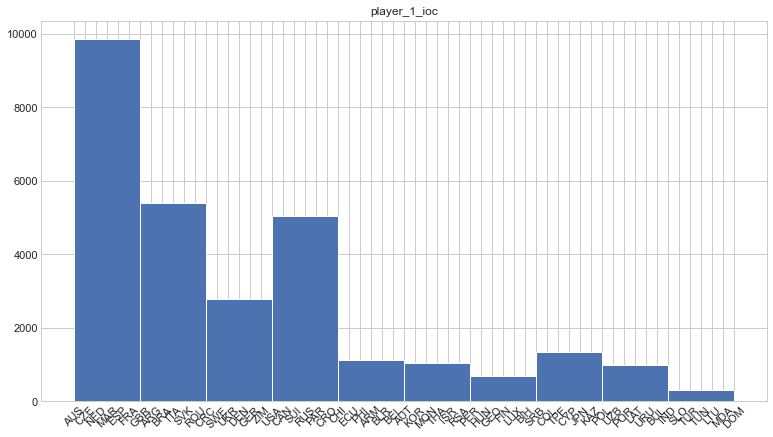

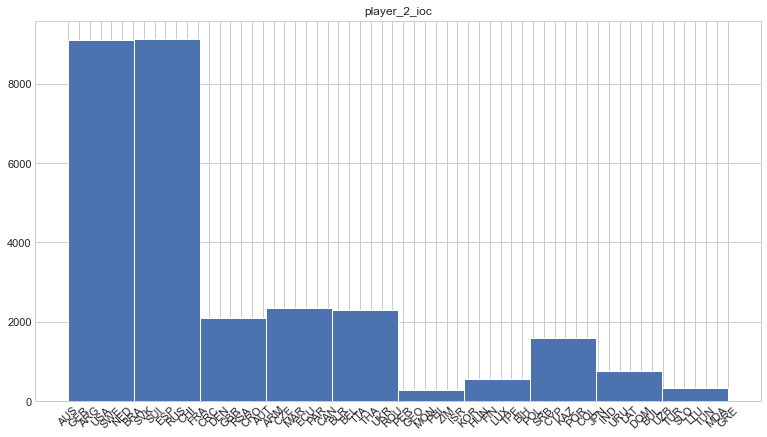

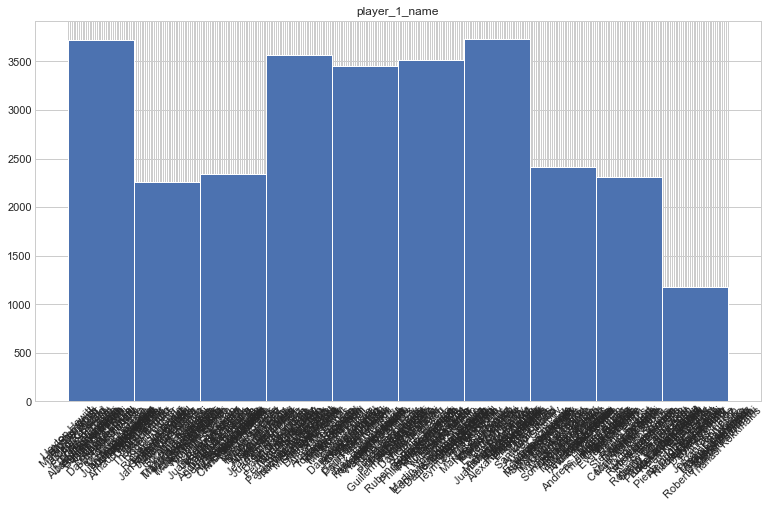

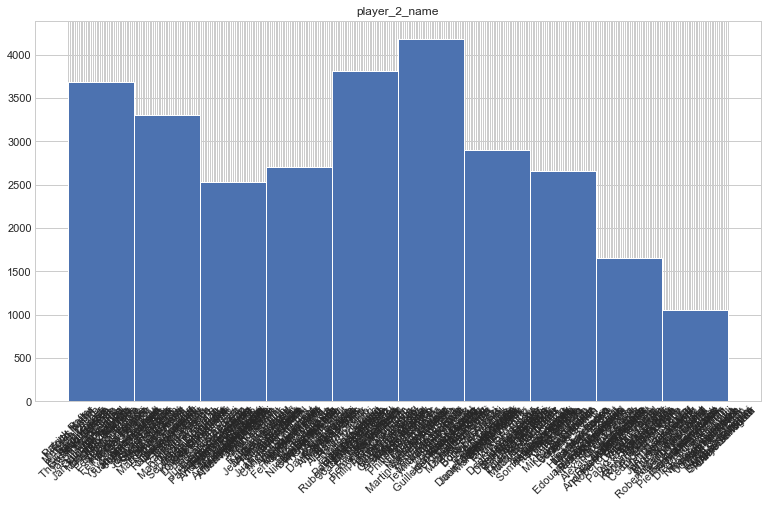

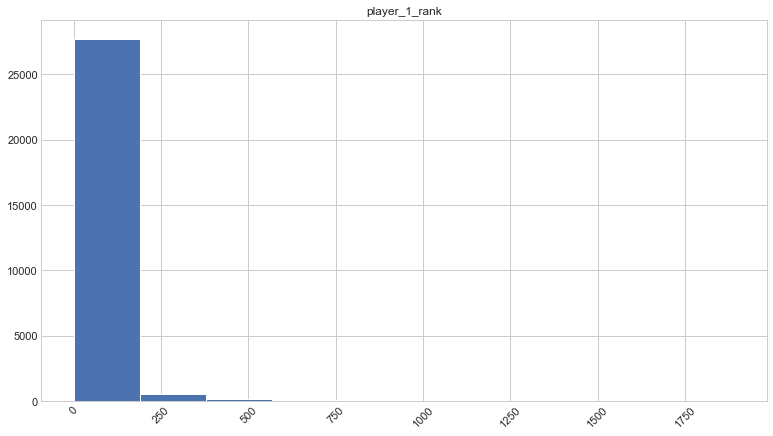

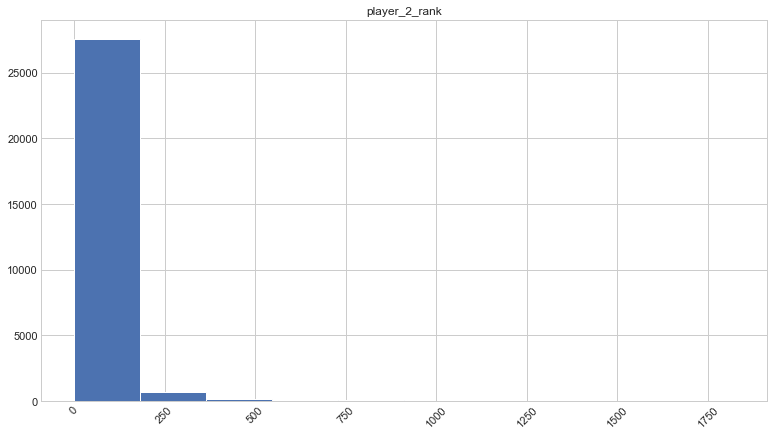

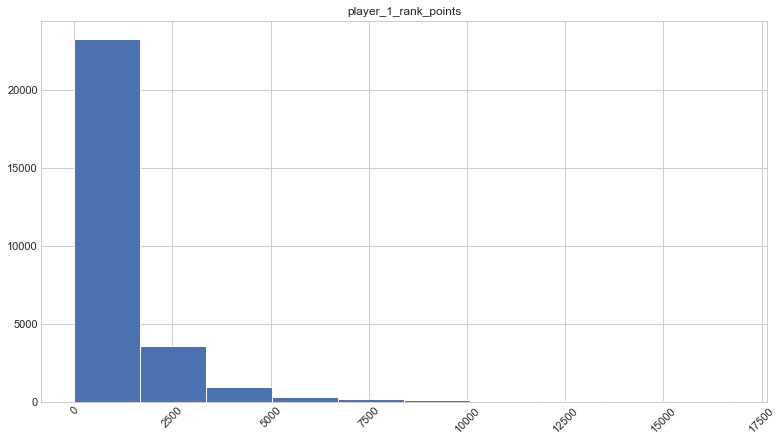

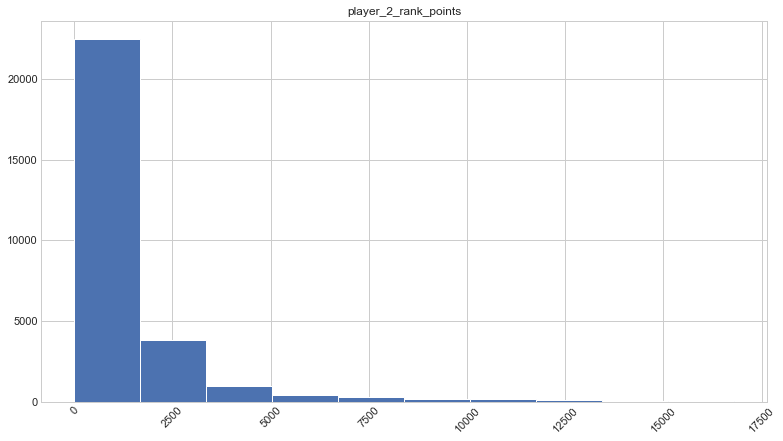

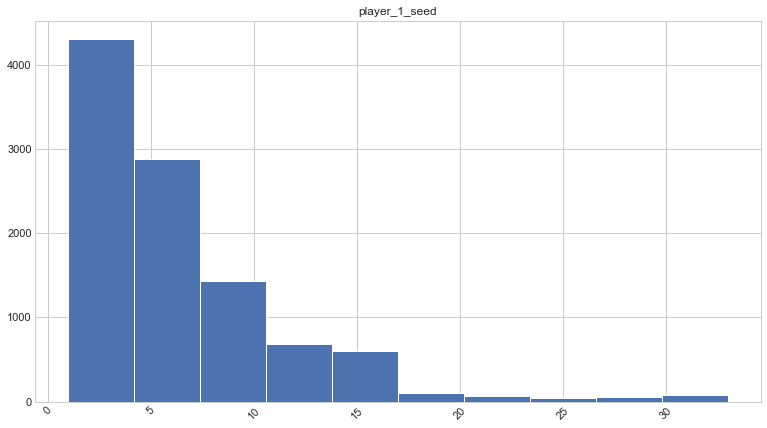

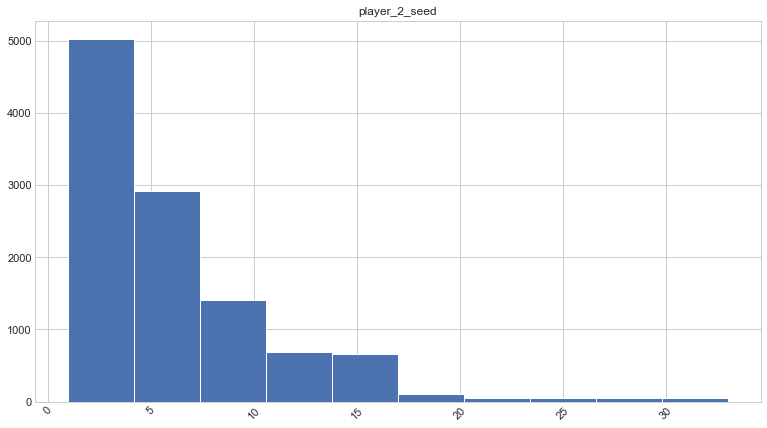

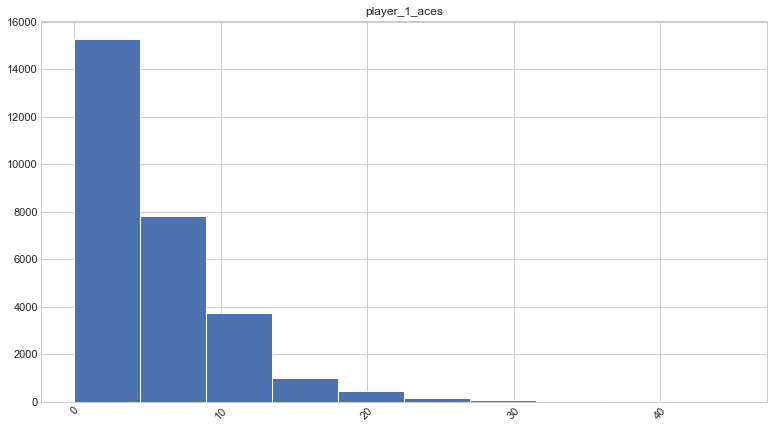

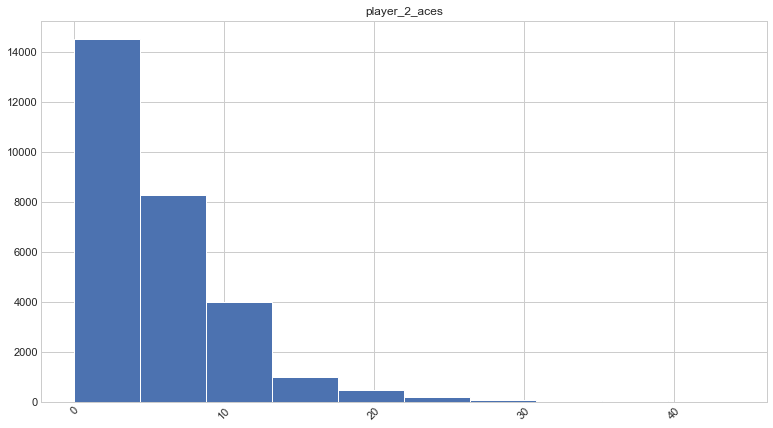

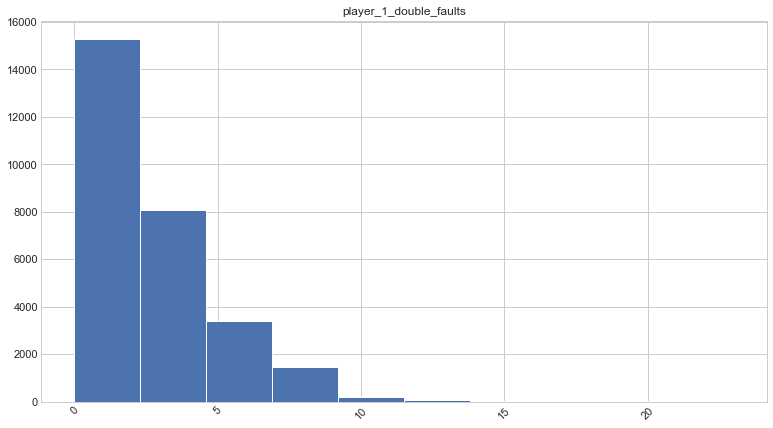

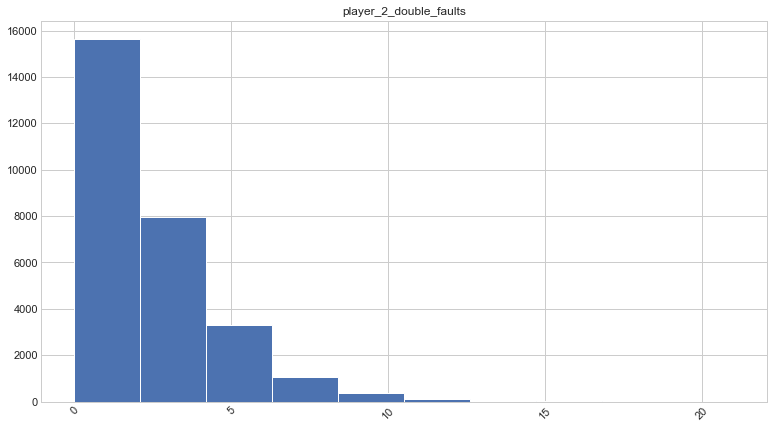

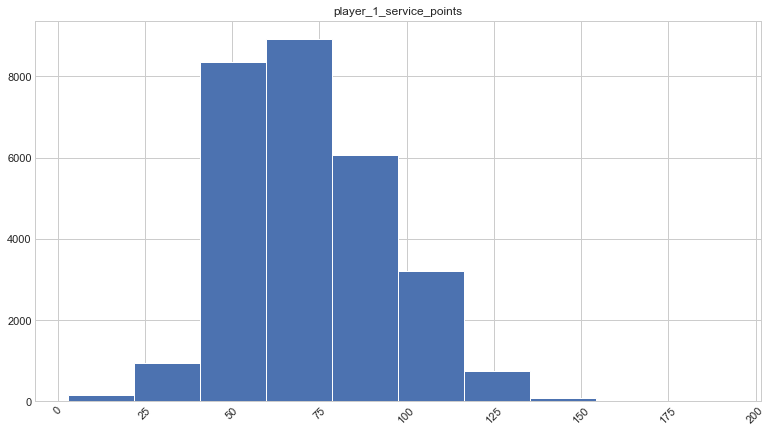

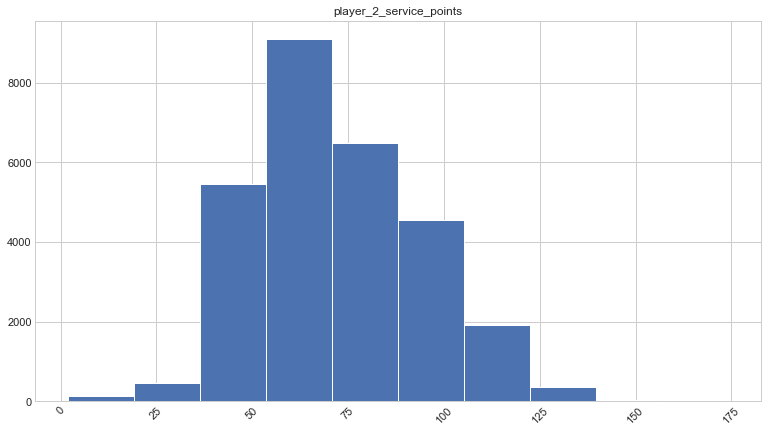

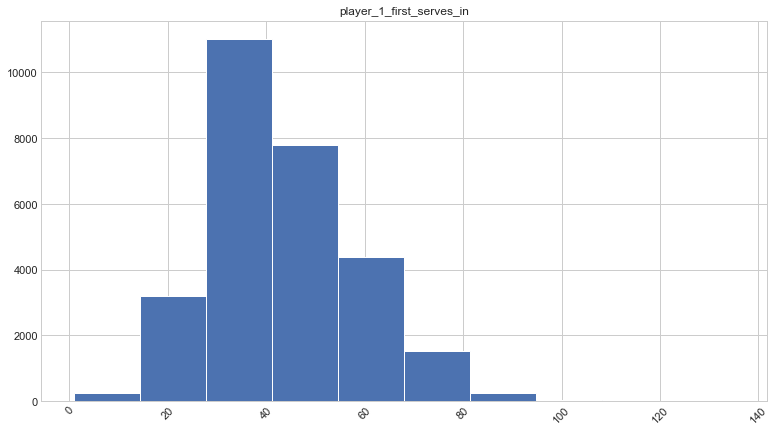

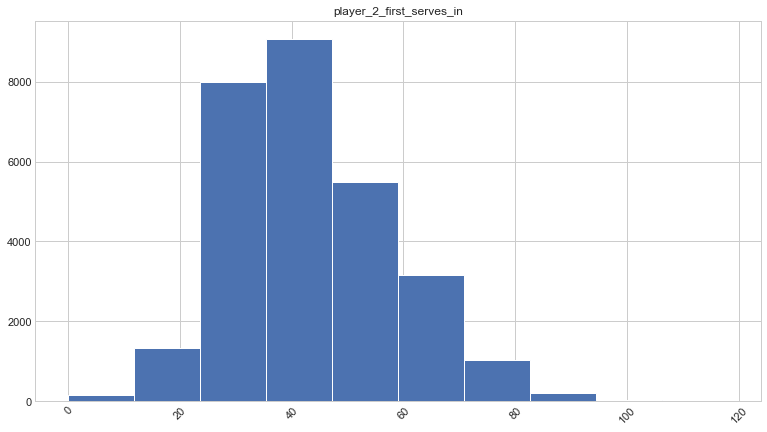

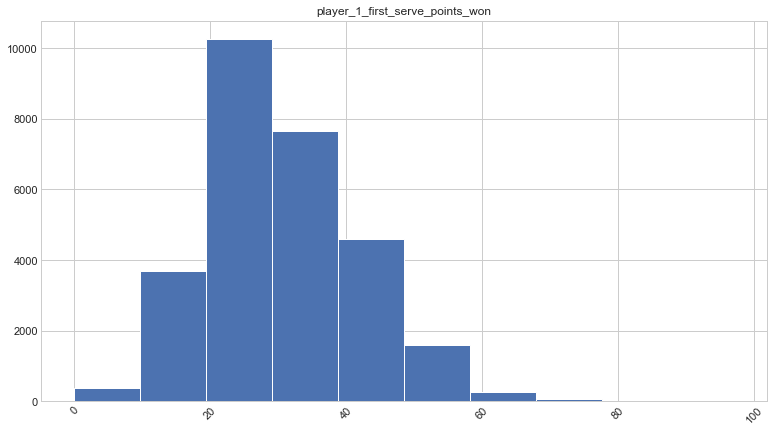

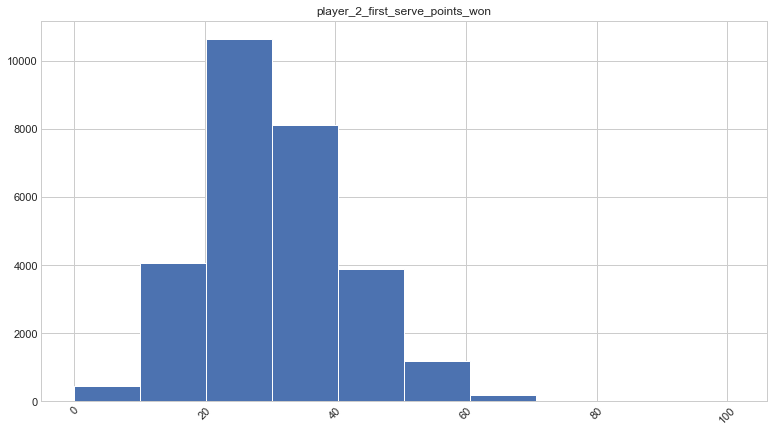

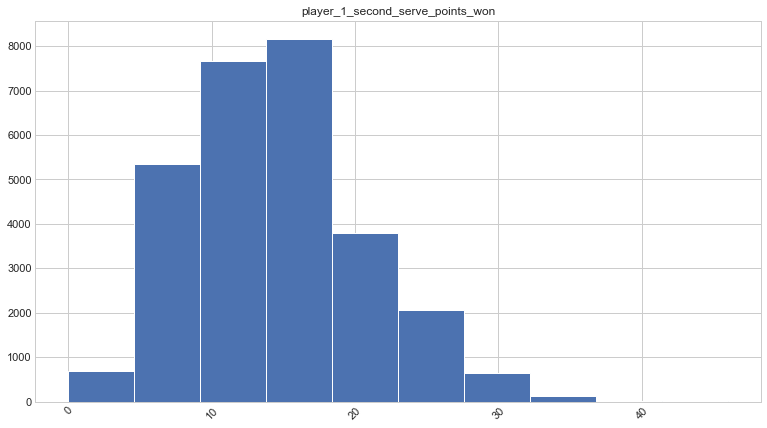

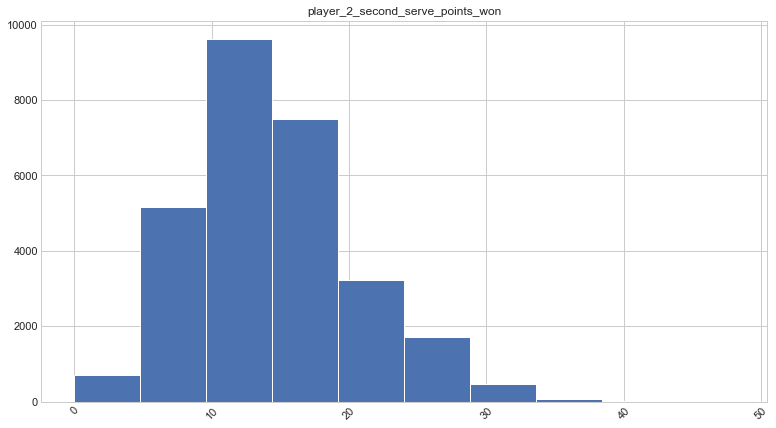

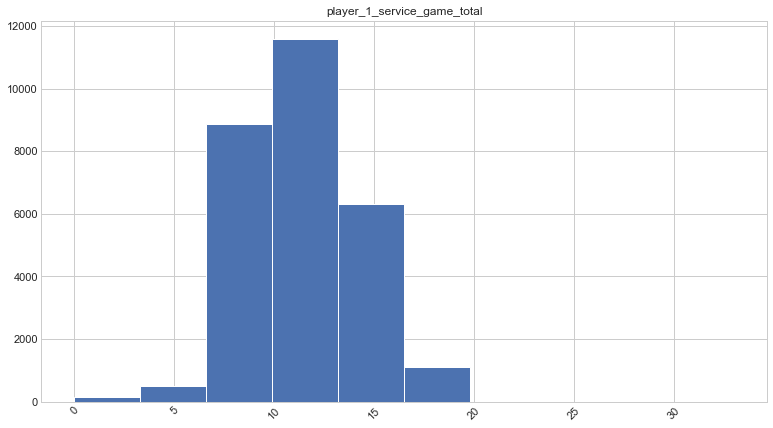

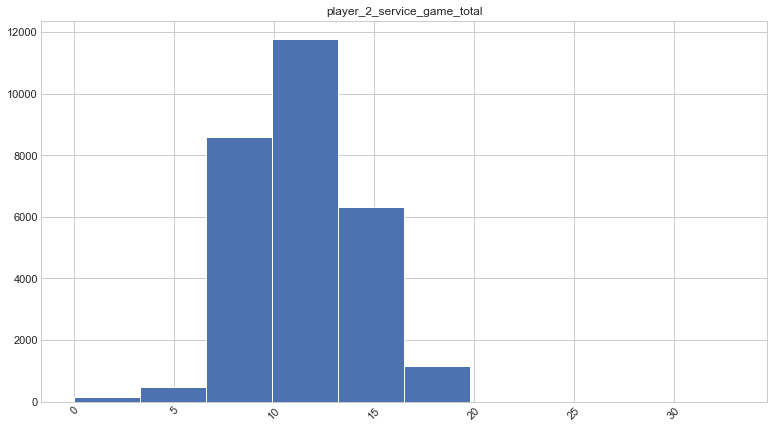

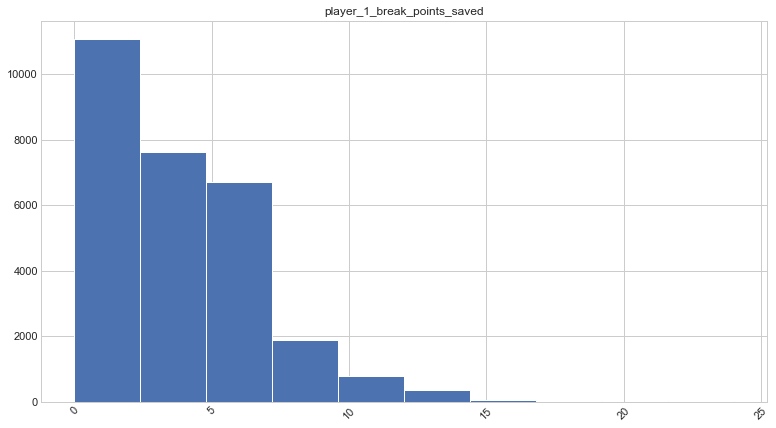

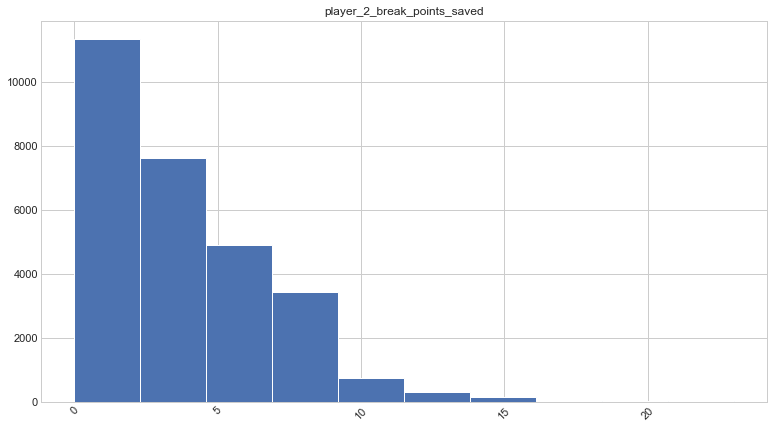

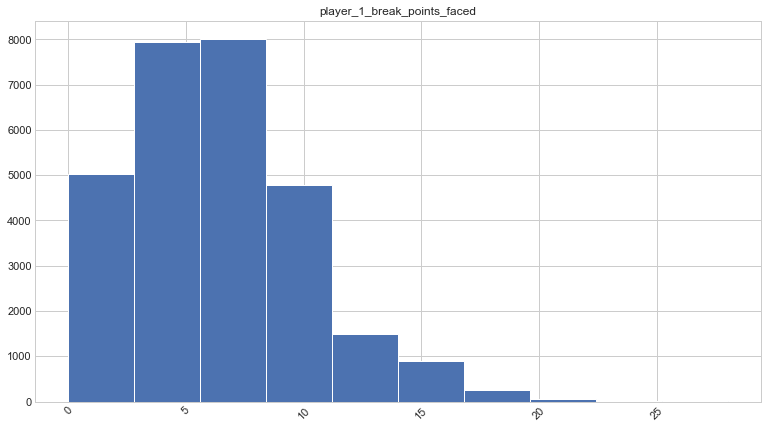

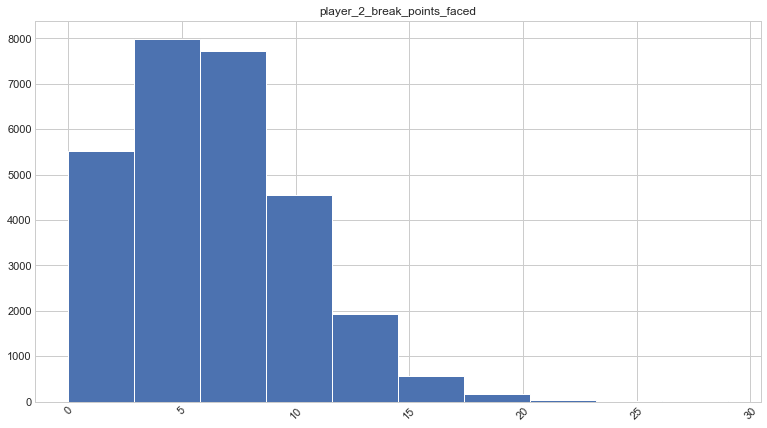

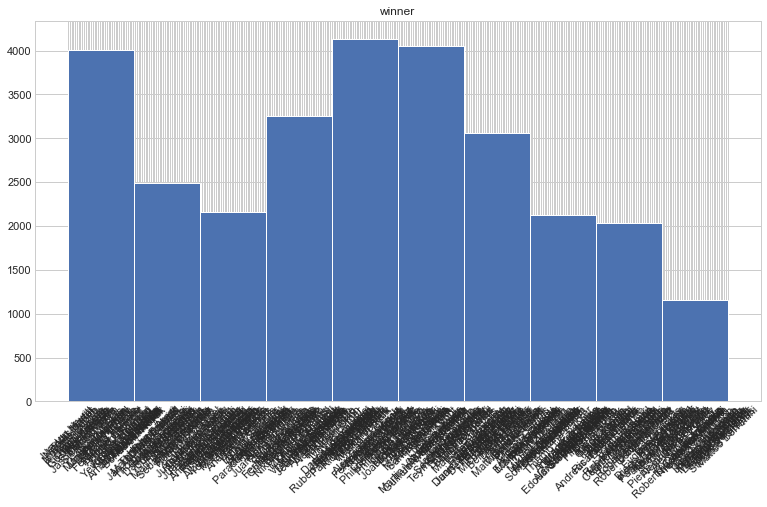

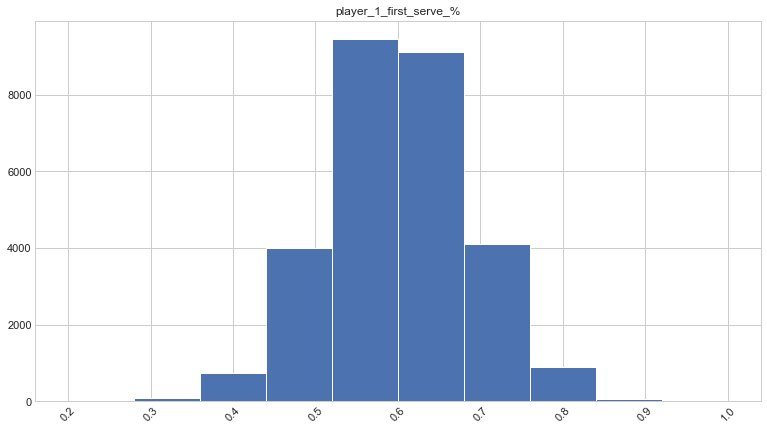

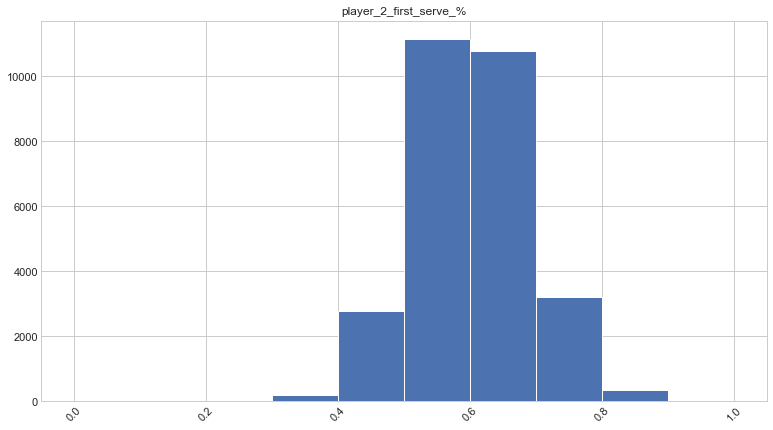

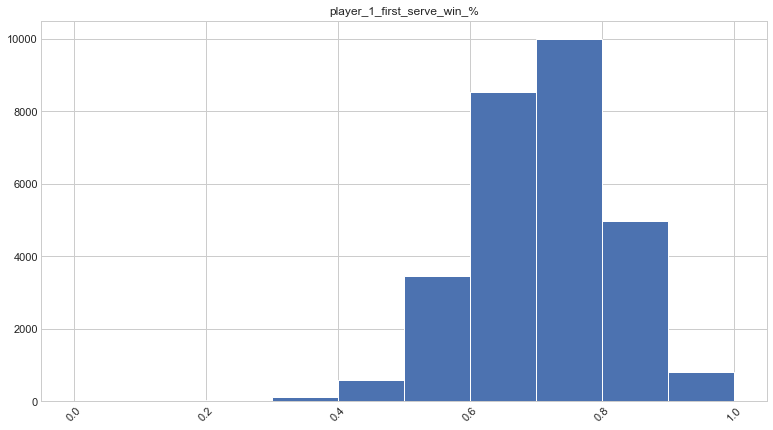

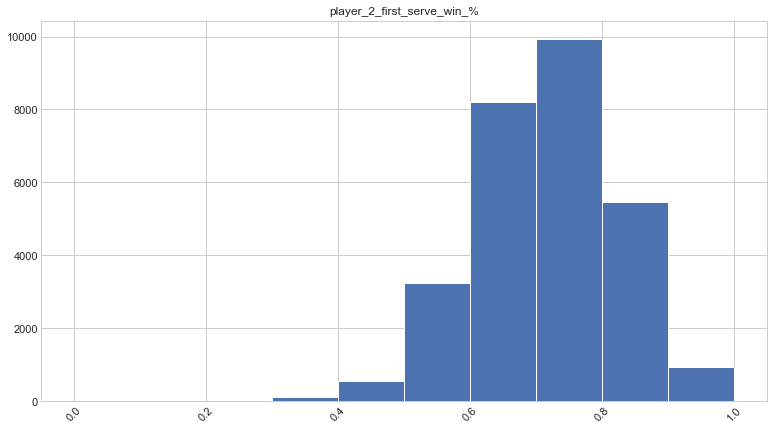

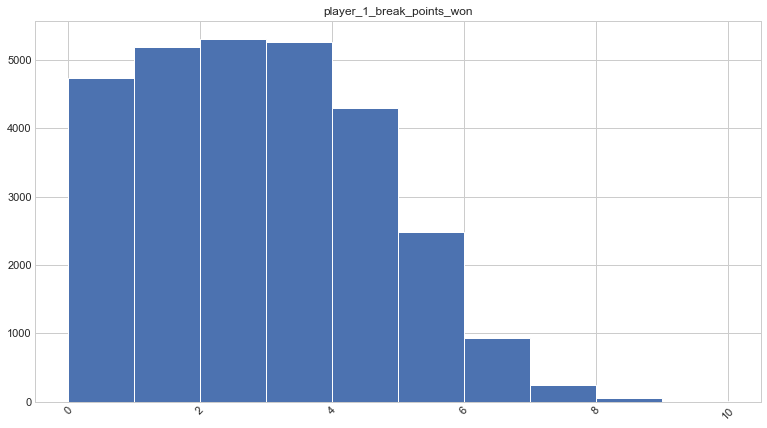

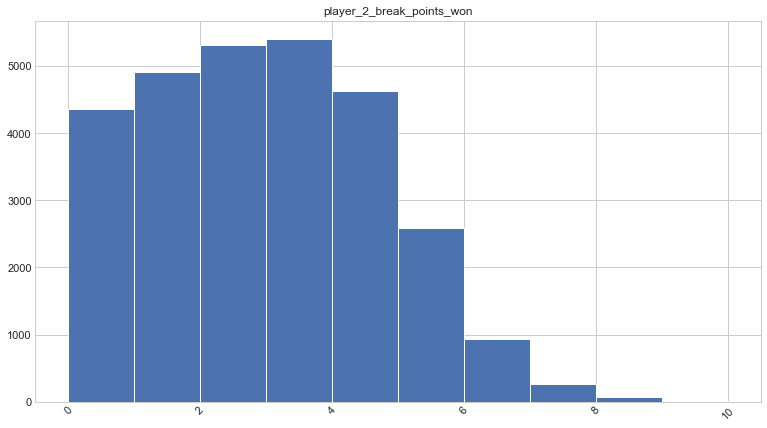

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

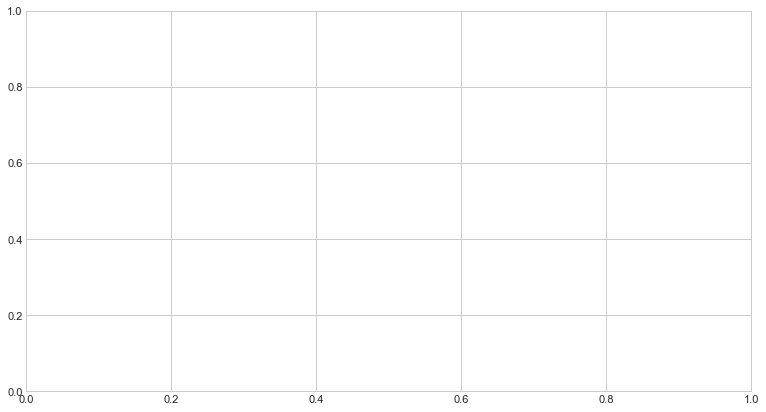

In [28]:
# visualize features for distribution 
for col in best_of_3:
    best_of_3[col].hist()
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [29]:
# create a list of colums with numeric values only
best_of_3.describe().columns


Index(['draw_size', 'match_num', 'best_of', 'minutes', 'player_1_age',
       'player_2_age', 'player_1_ht', 'player_2_ht', 'player_1_id',
       'player_2_id', 'player_1_rank', 'player_2_rank', 'player_1_rank_points',
       'player_2_rank_points', 'player_1_seed', 'player_2_seed',
       'player_1_aces', 'player_2_aces', 'player_1_double_faults',
       'player_2_double_faults', 'player_1_service_points',
       'player_2_service_points', 'player_1_first_serves_in',
       'player_2_first_serves_in', 'player_1_first_serve_points_won',
       'player_2_first_serve_points_won', 'player_1_second_serve_points_won',
       'player_2_second_serve_points_won', 'player_1_service_game_total',
       'player_2_service_game_total', 'player_1_break_points_saved',
       'player_2_break_points_saved', 'player_1_break_points_faced',
       'player_2_break_points_faced', 'player_1_first_serve_%',
       'player_2_first_serve_%', 'player_1_first_serve_win_%',
       'player_2_first_serve_win_%', 'pl

In [30]:
# create df with the numeric columsn of best_of_3
best_of_3_numeric = best_of_3[['draw_size', 'match_num', 'best_of', 'minutes', 'player_1_age',
       'player_2_age', 'player_1_ht', 'player_2_ht', 'player_1_id',
       'player_2_id', 'player_1_rank', 'player_2_rank', 'player_1_rank_points',
       'player_2_rank_points', 'player_1_seed', 'player_2_seed',
       'player_1_aces', 'player_2_aces', 'player_1_double_faults',
       'player_2_double_faults', 'player_1_service_points',
       'player_2_service_points', 'player_1_first_serves_in',
       'player_2_first_serves_in', 'player_1_first_serve_points_won',
       'player_2_first_serve_points_won', 'player_1_second_serve_points_won',
       'player_2_second_serve_points_won', 'player_1_service_game_total',
       'player_2_service_game_total', 'player_1_break_points_saved',
       'player_2_break_points_saved', 'player_1_break_points_faced',
       'player_2_break_points_faced', 'player_1_first_serve_%',
       'player_2_first_serve_%', 'player_1_first_serve_win_%',
       'player_2_first_serve_win_%', 'player_1_break_points_won',
       'player_2_break_points_won', 'surface_Clay', 'surface_Grass',
       'surface_Hard', 'tourney_level_D', 'tourney_level_F', 'tourney_level_G',
       'tourney_level_M', 'player_1_hand_R', 'player_2_hand_R', 'round_F',
       'round_QF', 'round_R128', 'round_R16', 'round_R32', 'round_R64',
       'round_RR', 'round_SF']].copy()

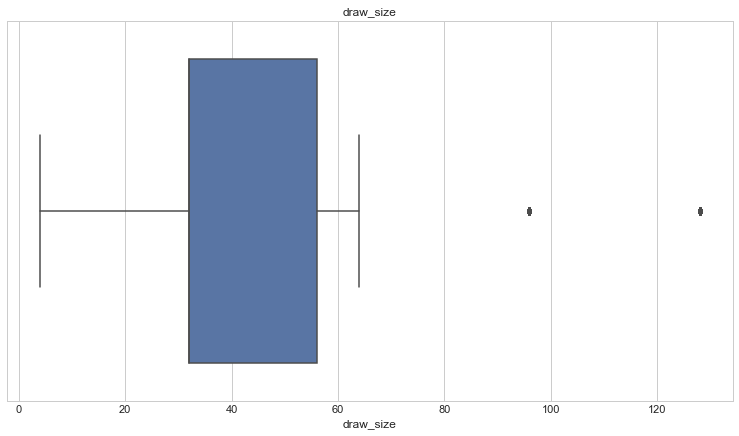

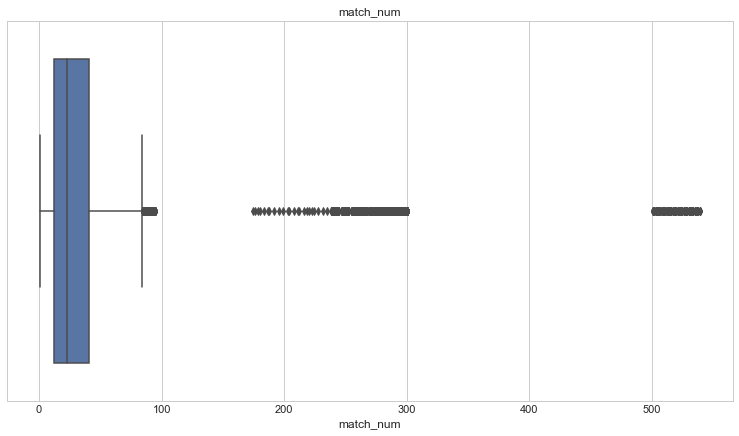

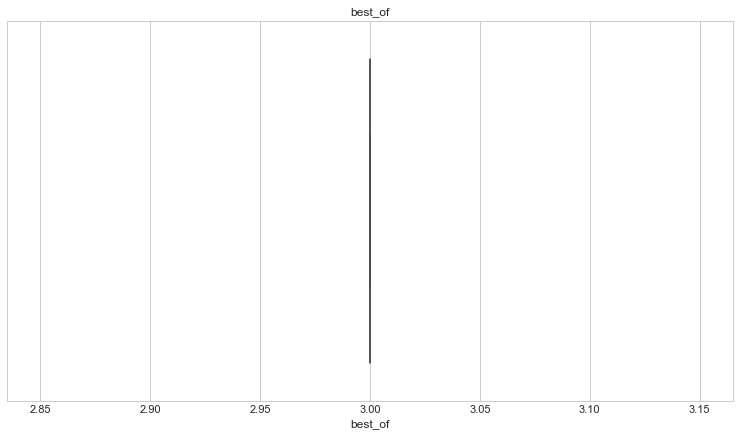

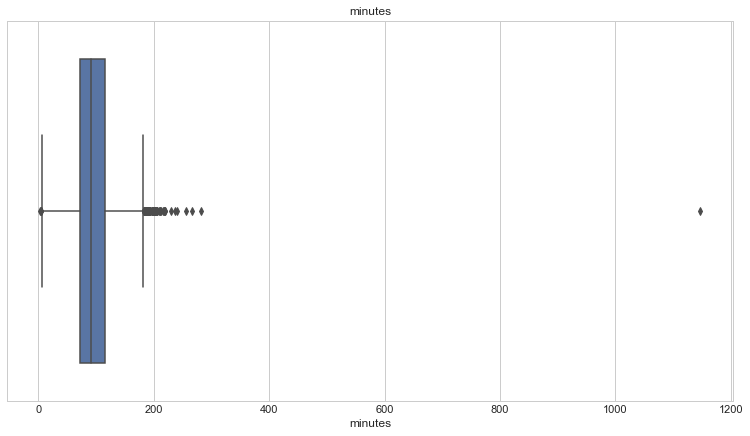

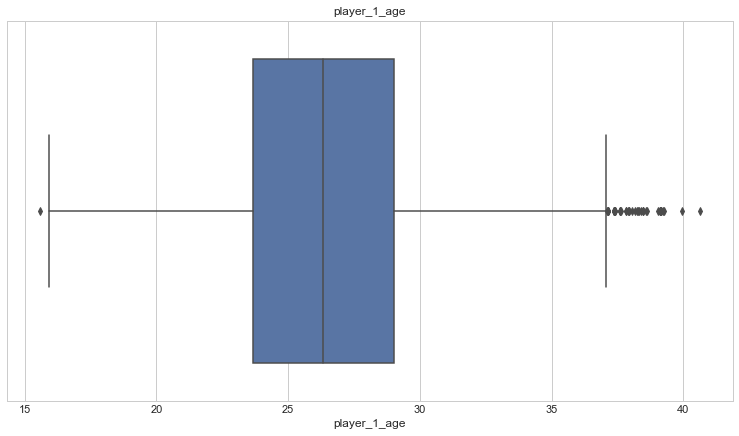

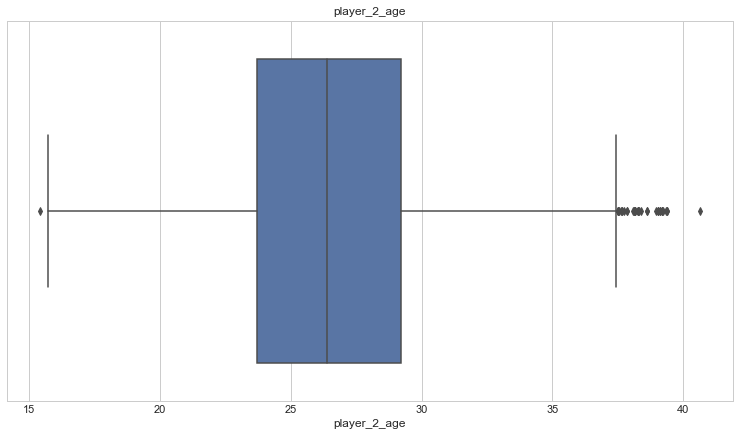

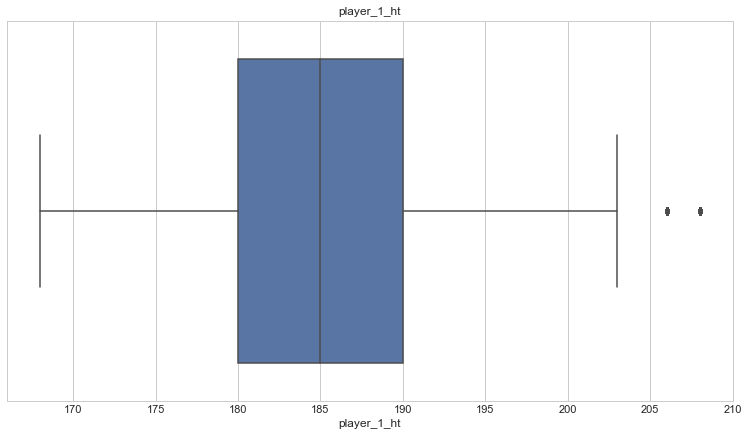

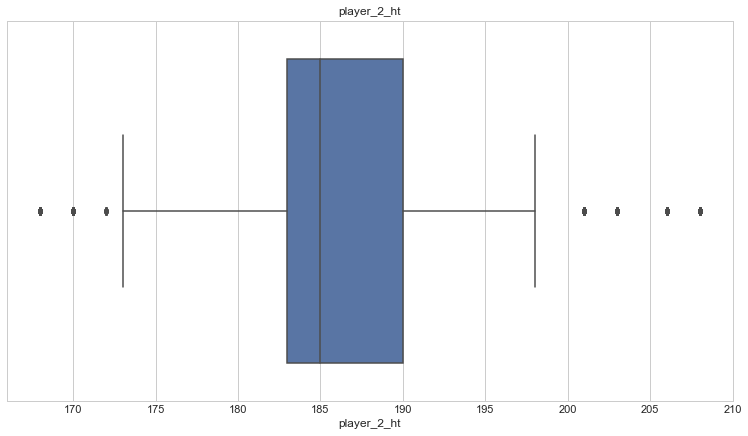

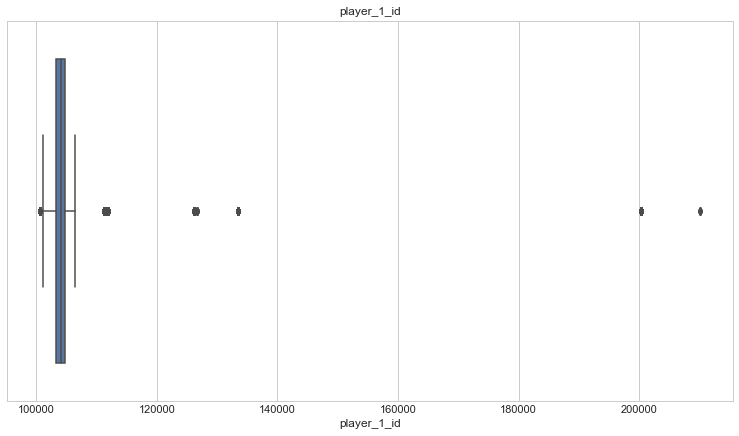

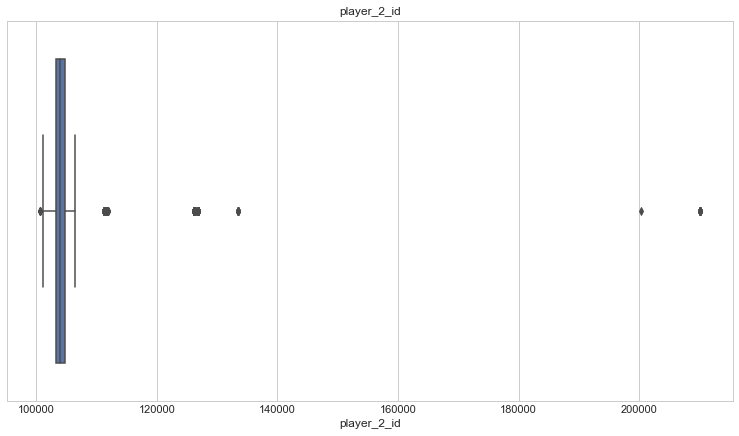

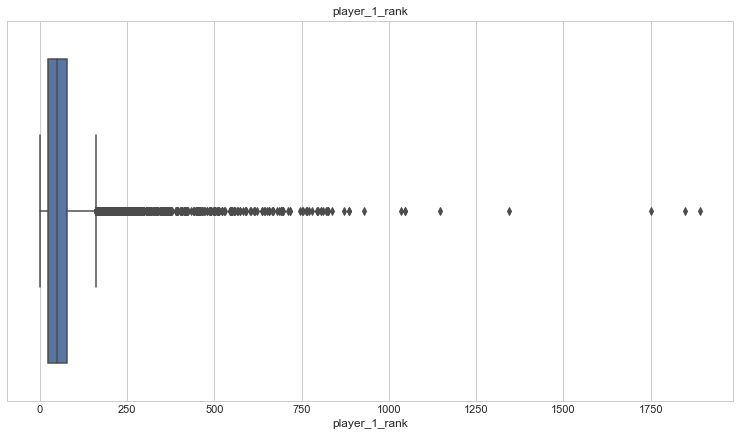

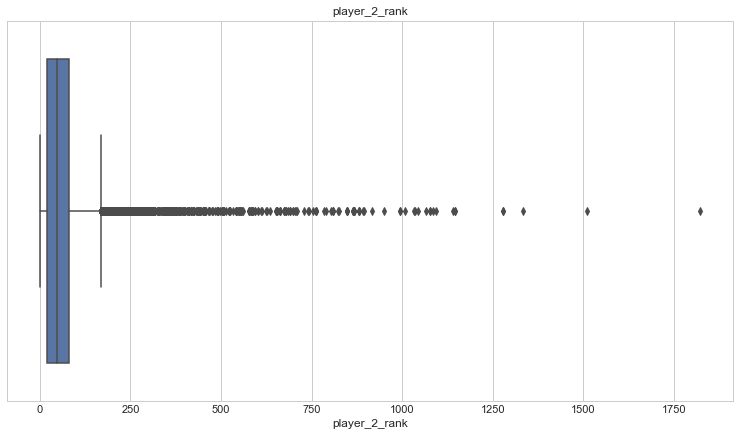

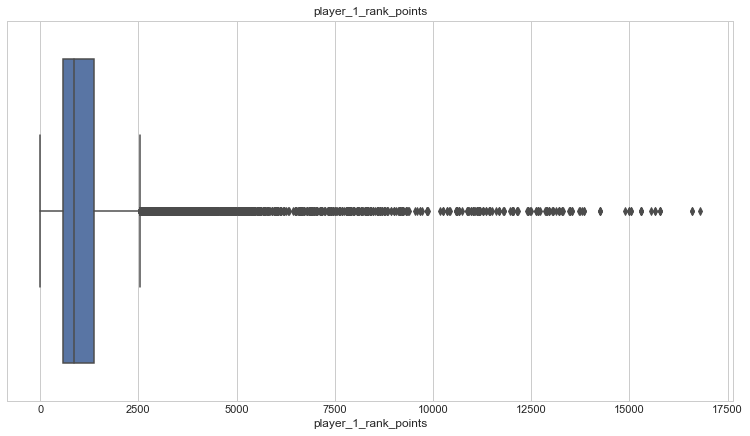

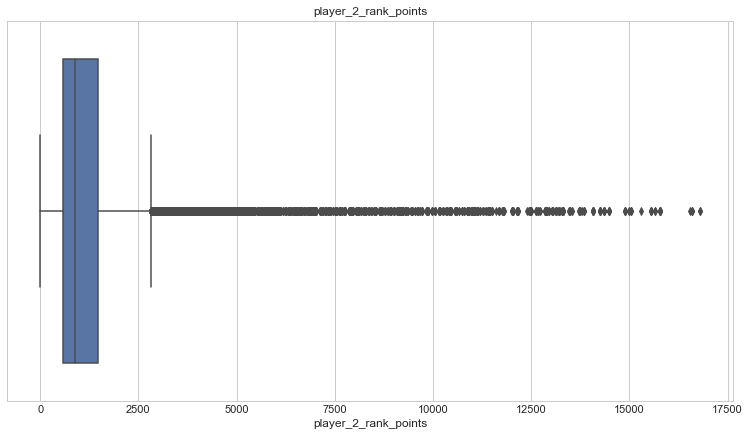

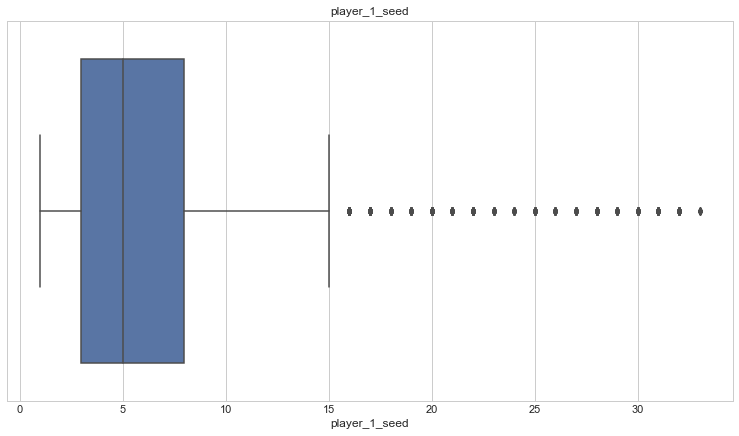

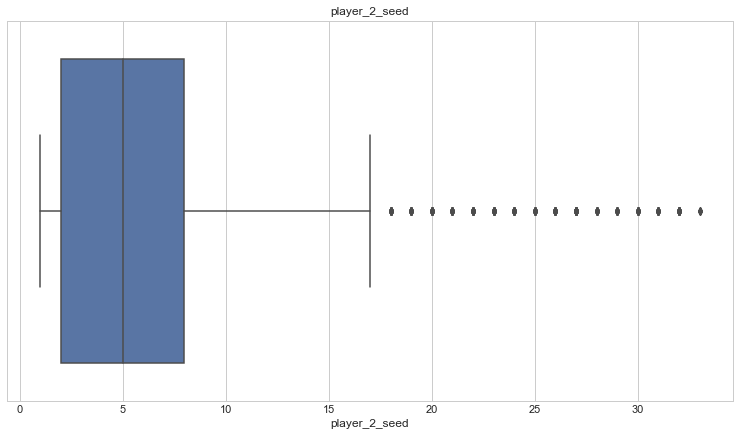

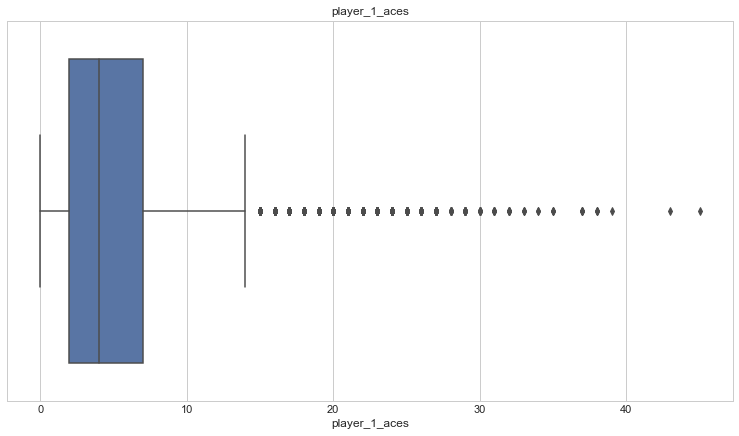

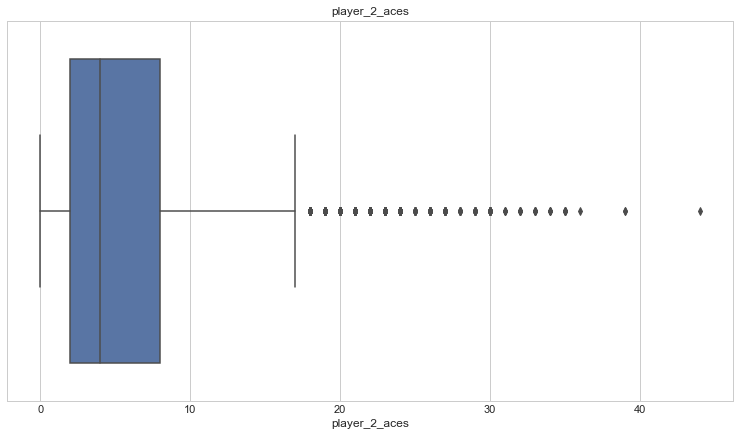

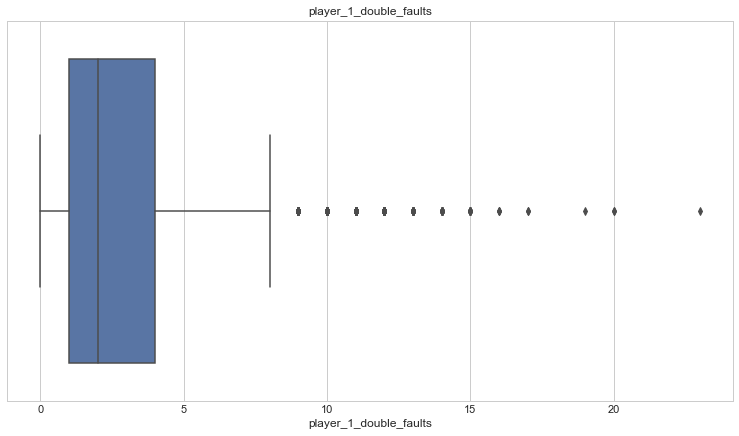

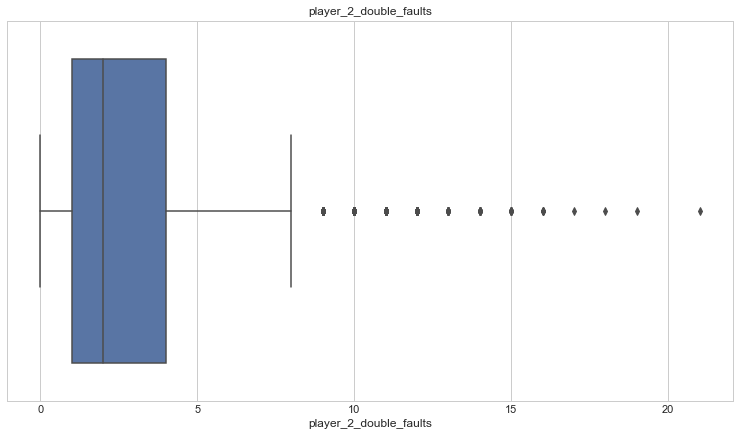

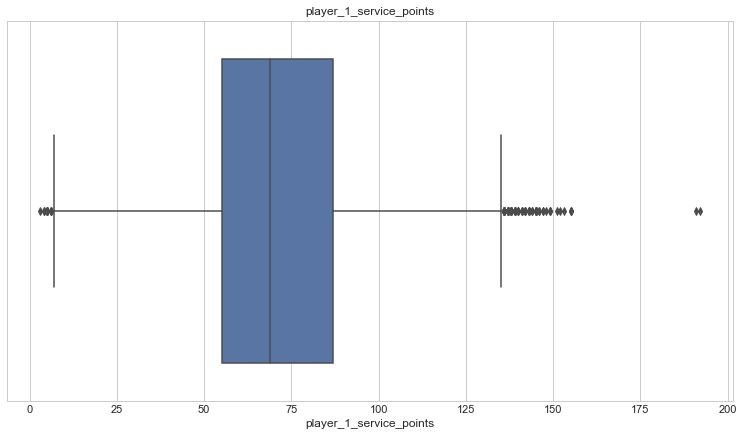

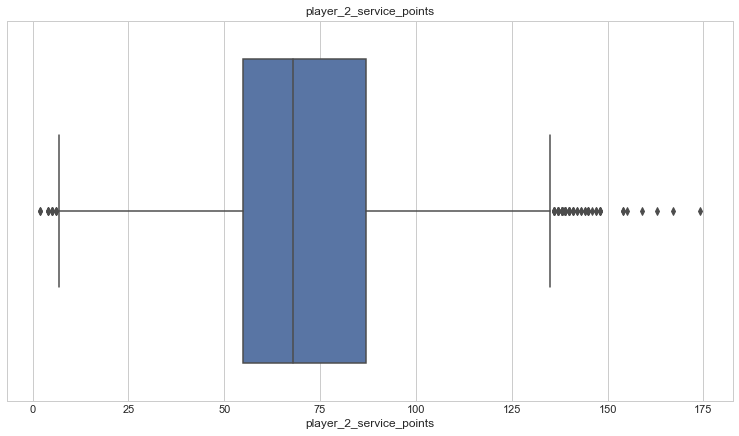

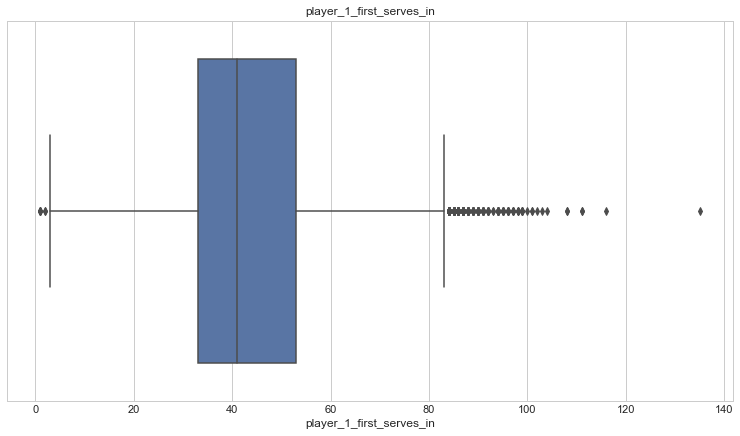

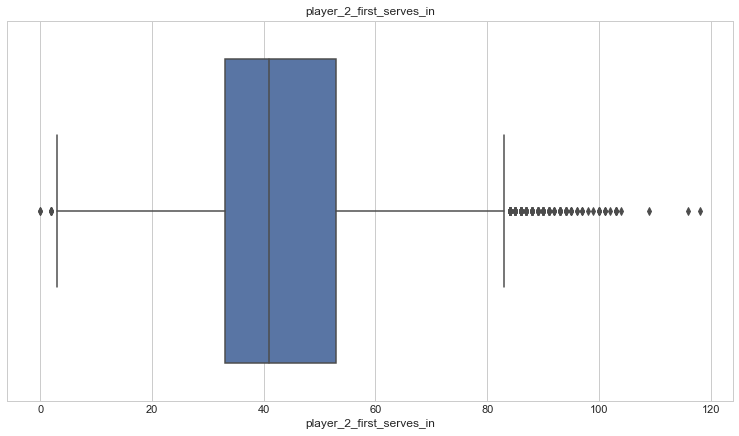

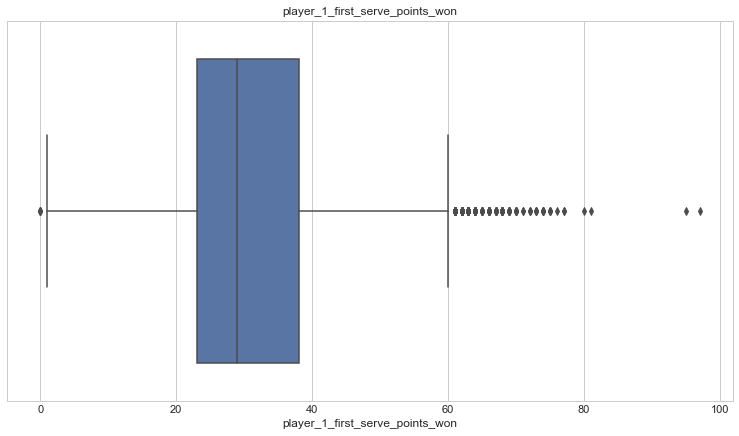

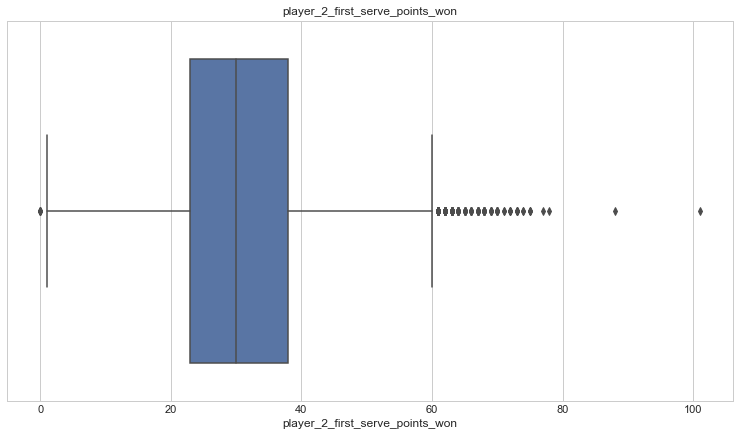

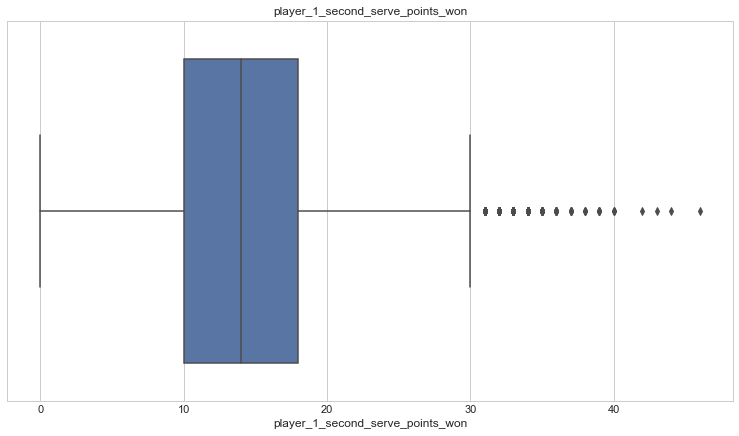

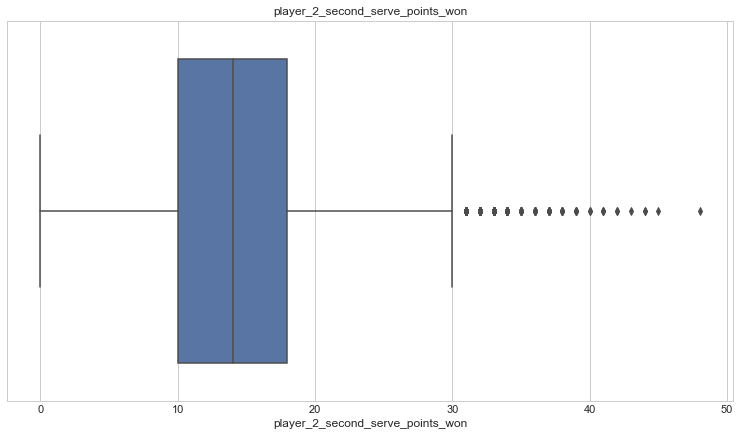

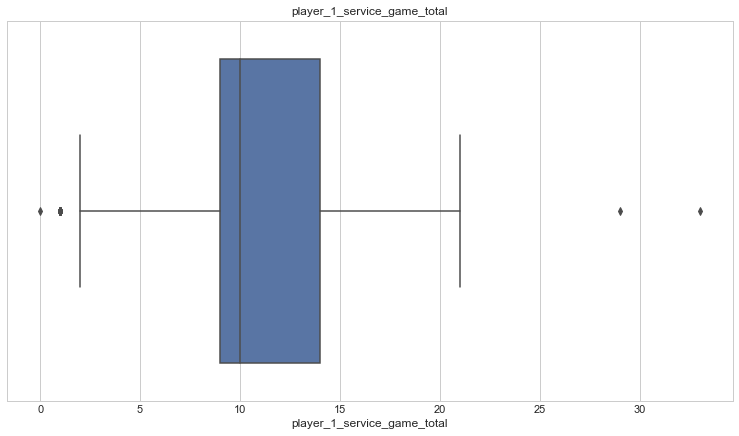

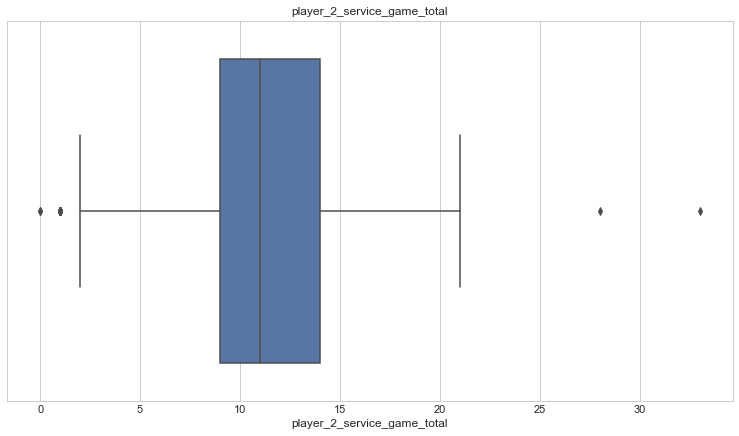

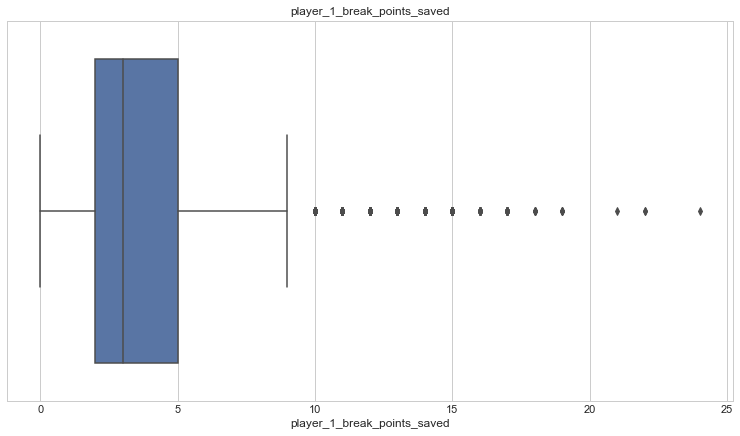

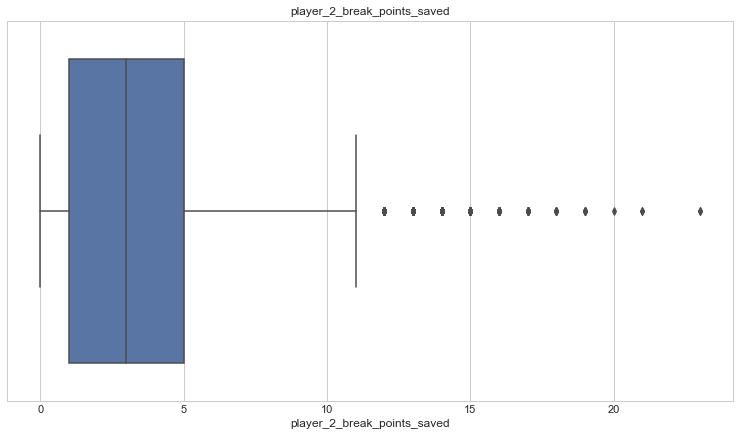

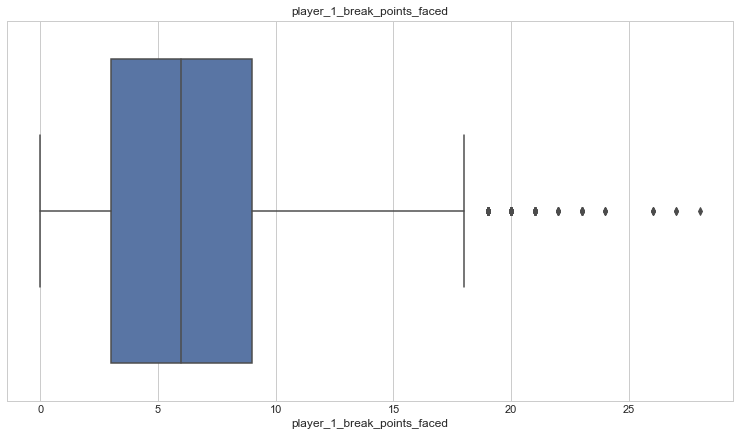

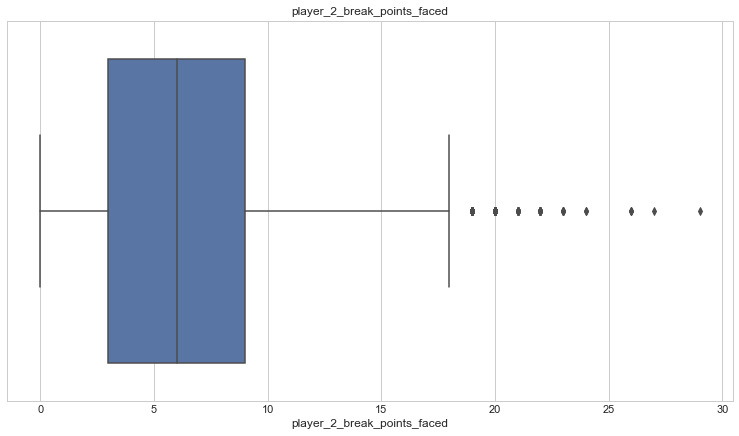

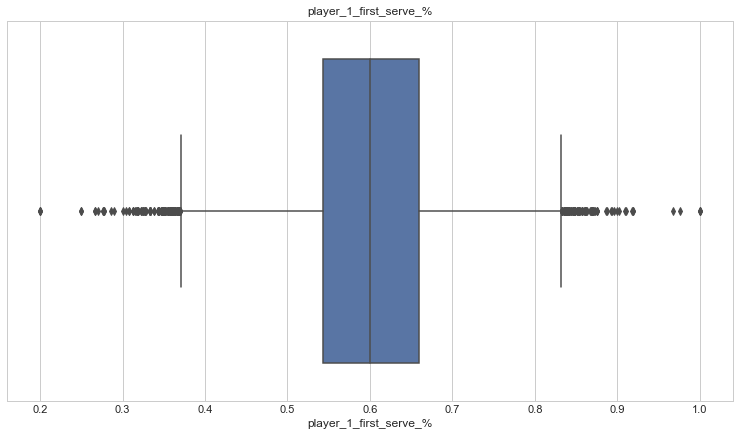

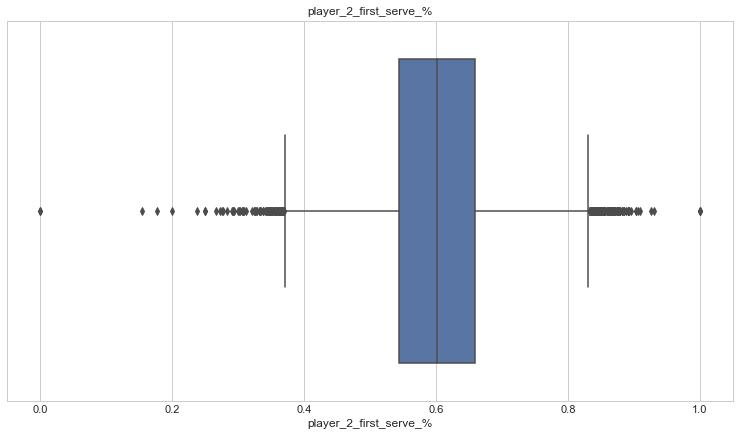

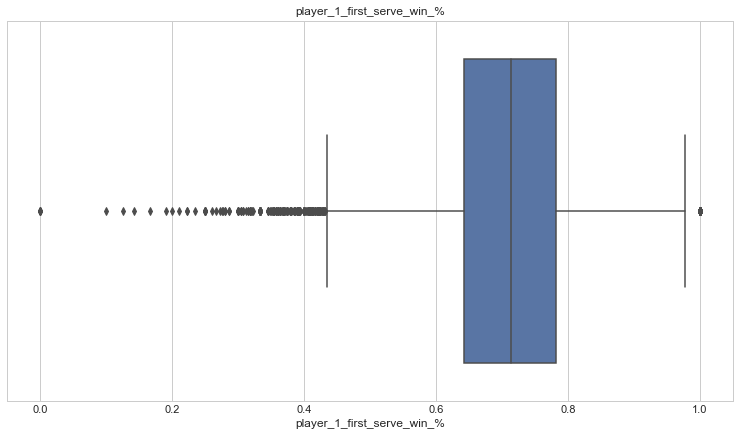

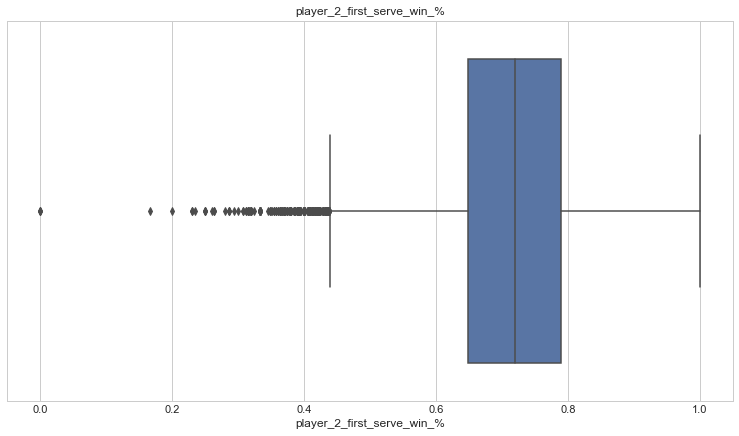

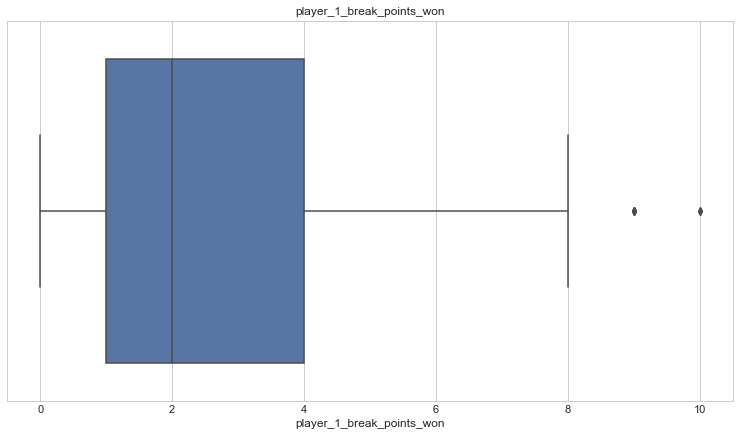

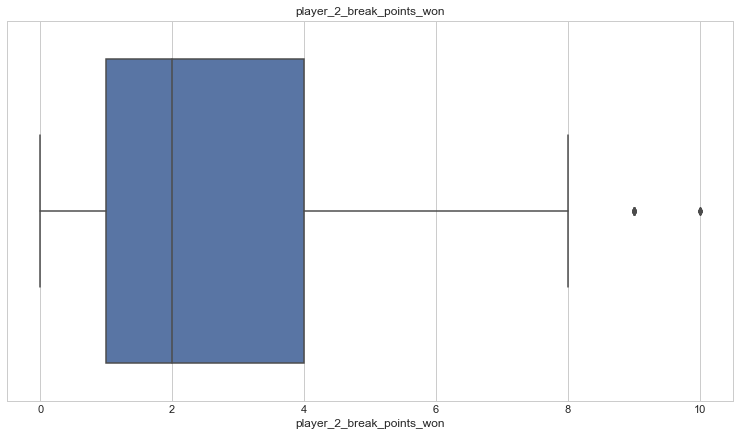

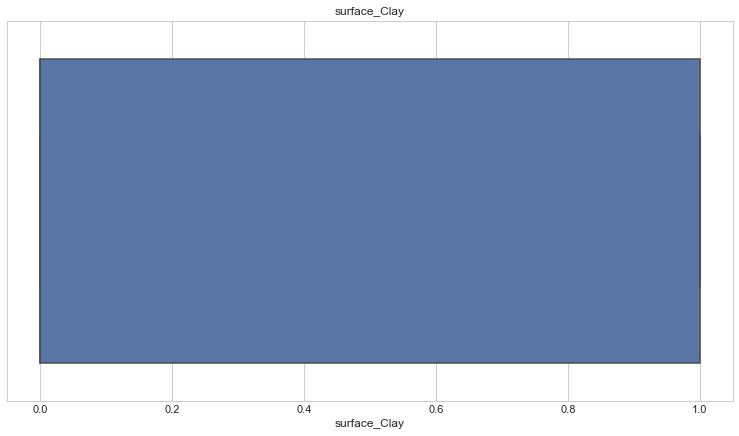

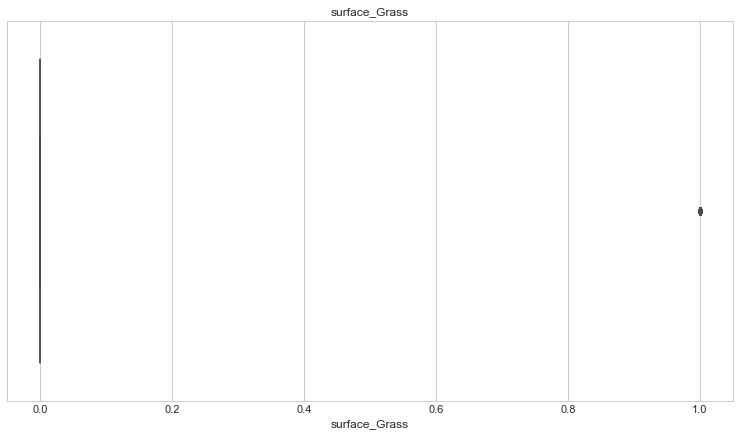

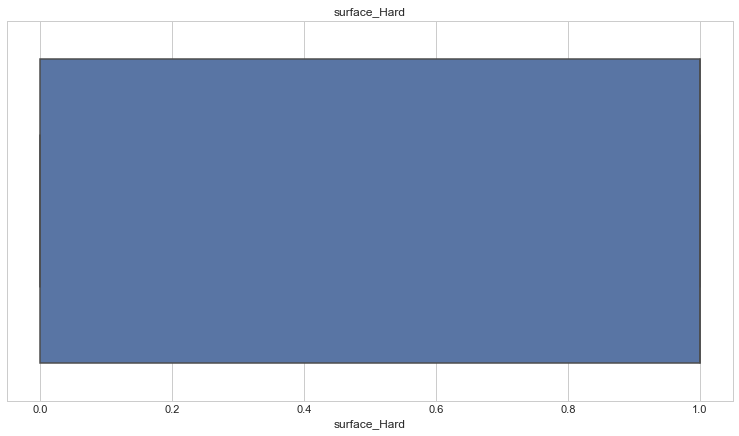

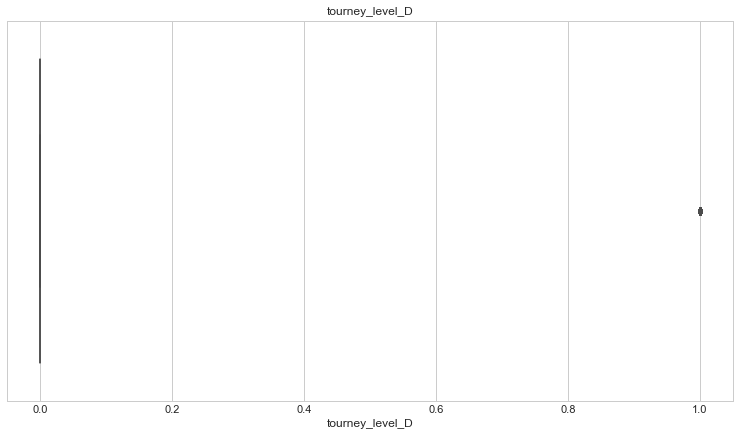

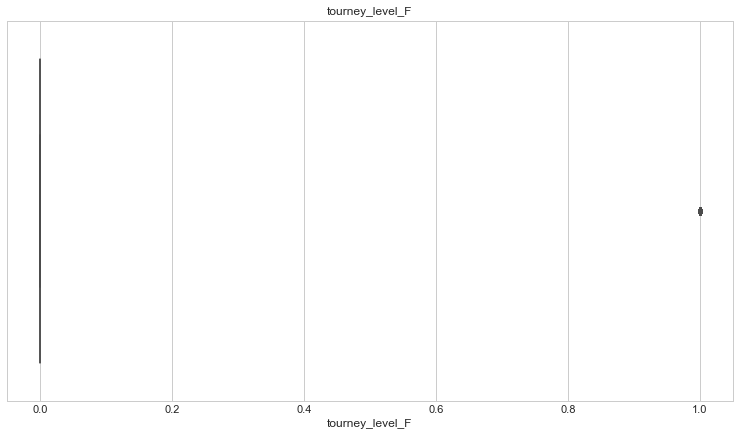

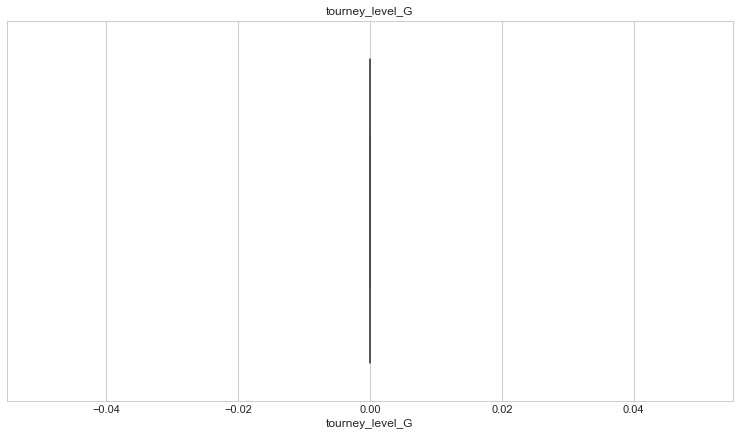

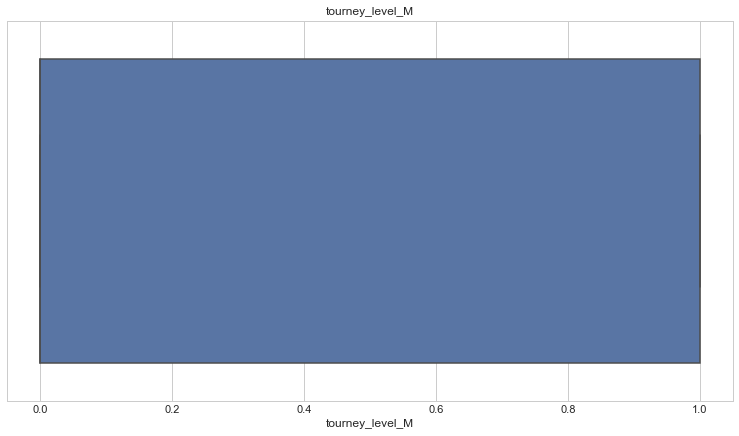

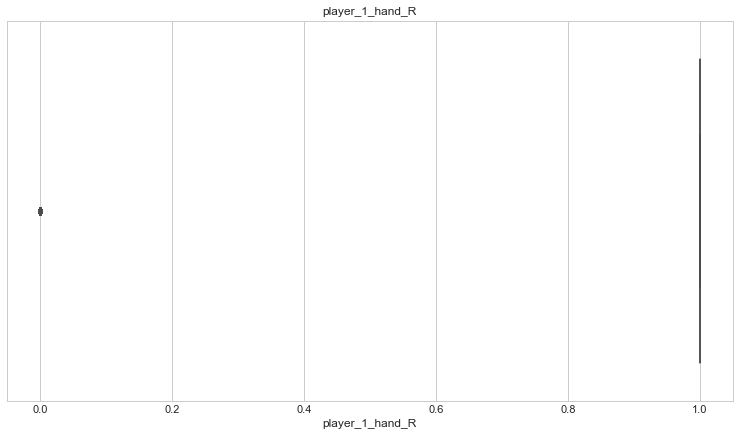

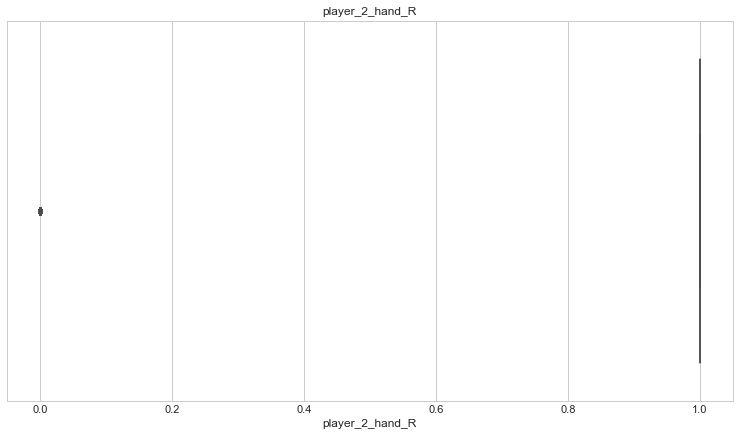

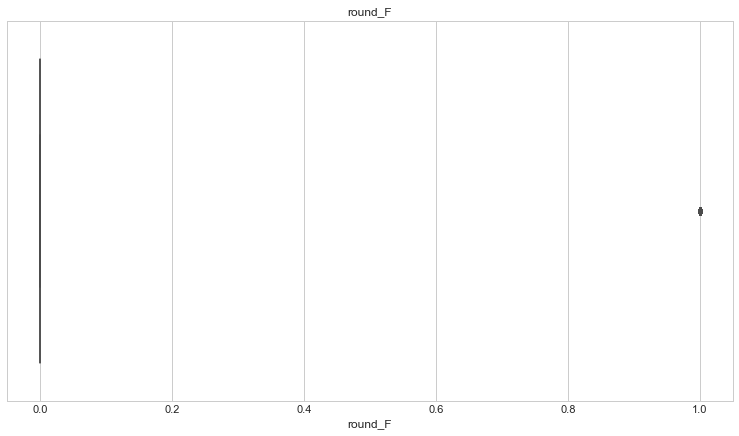

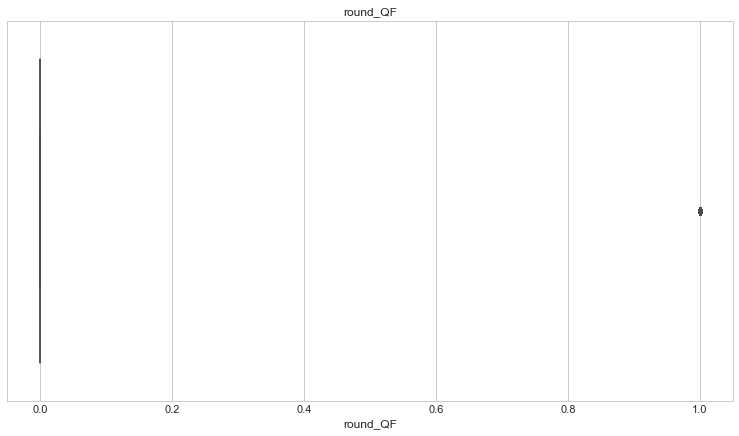

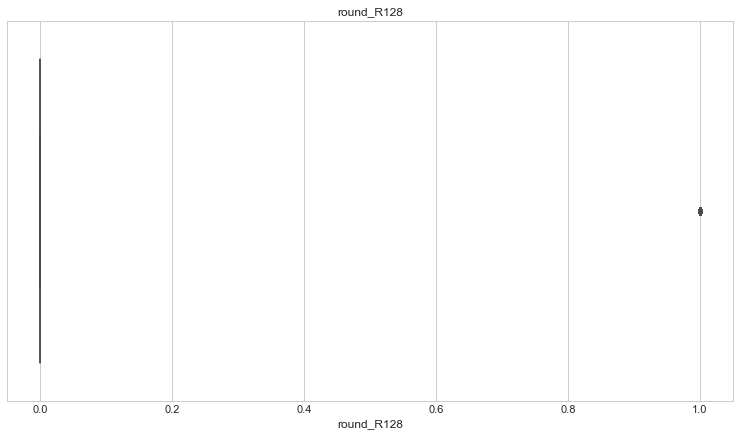

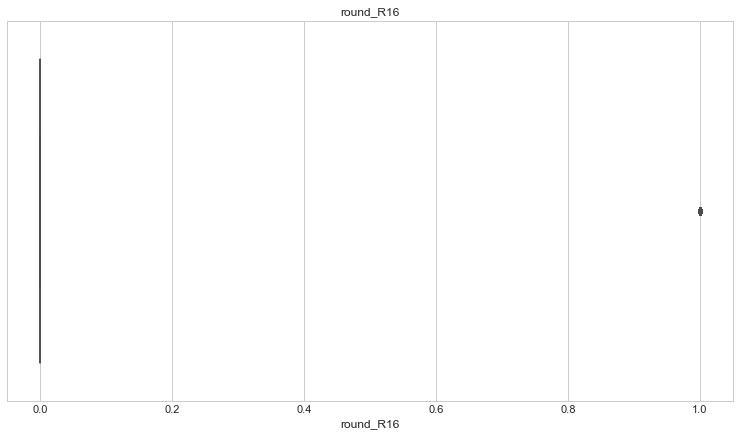

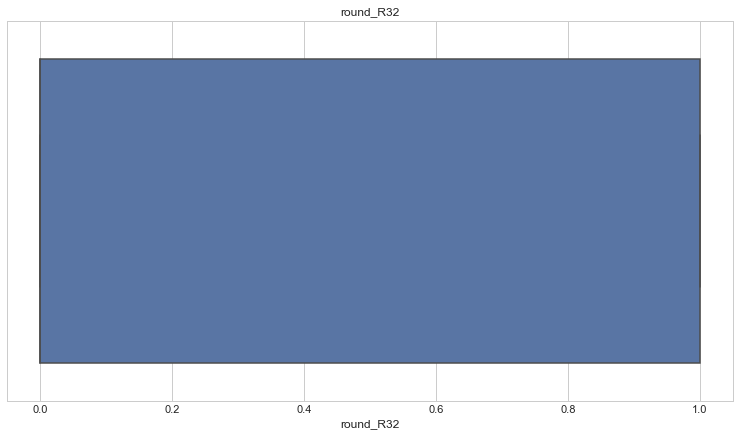

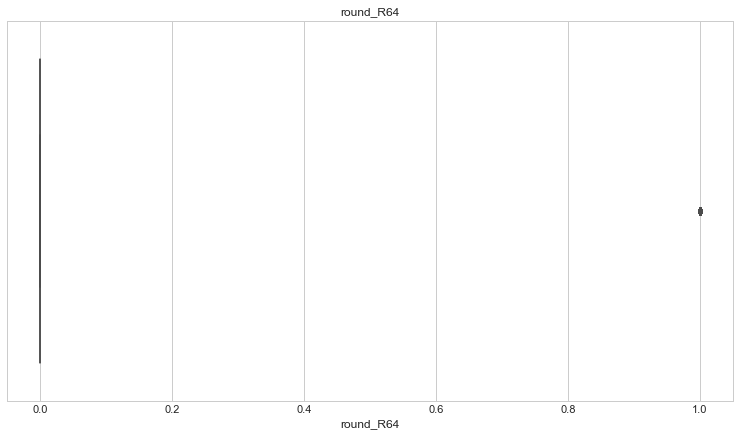

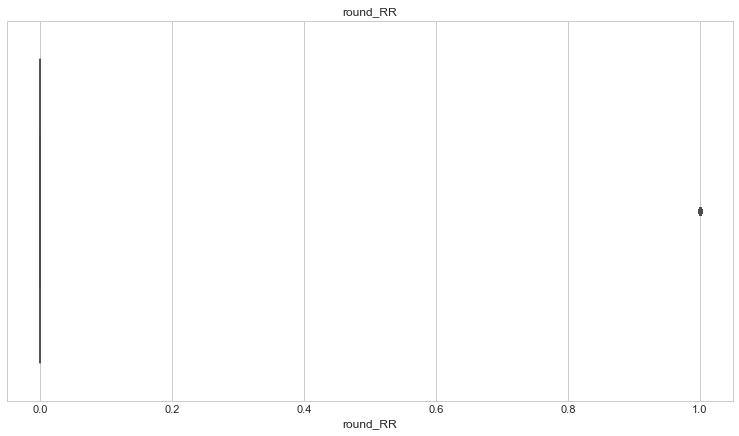

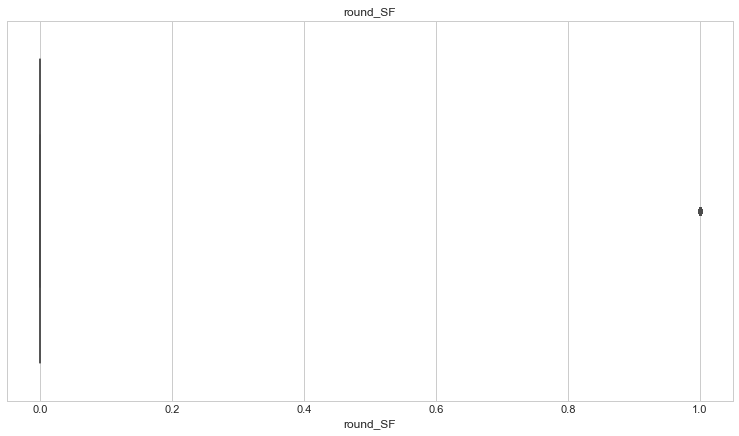

In [31]:
# visualize features for outliers
for col in best_of_3_numeric:
    sns.boxplot(best_of_3_numeric[col])
    plt.title(col)
    plt.show()

In [32]:
print(f'best of 3 shape = {best_of_3.shape[0]}')
print(f'best of 5 shape = {best_of_5.shape[0]}')
print(f'Total rows = {best_of_3.shape[0] + best_of_5.shape[0]}')


best of 3 shape = 28485
best of 5 shape = 7484
Total rows = 35969


## Takeaway 
- Splitting the data between best of 5 and best of 3 does no eliminate the outliers as we expected 

In [33]:
match.sample()


tourney_id tourney_name surface  draw_size tourney_level  \
tourney_date                                                            
2011-01-03     2011-891      Chennai    Hard         32             A   

              match_num    score  best_of round  minutes         player_1  \
tourney_date                                                                
2011-01-03           13  6-3 6-4        3   R32     80.0  Eduardo Schwank   

                      player_2  player_1_age  player_2_age player_1_entry  \
tourney_date                                                                
2011-01-03    Janko Tipsarevic     24.698152     26.532512            NaN   

             player_2_entry player_1_hand player_2_hand  player_1_ht  \
tourney_date                                                           
2011-01-03              NaN             R             R        183.0   

              player_2_ht  player_1_id  player_2_id player_1_ioc player_2_ioc  \
tourney_date                                                                    
2011-01-03          180.0       104724       104386          ARG          SRB   

                player_1_name     player_2_name  player_1_rank  player_2_rank  \
tourney_date                                                                    
2011-01-03    Eduardo Schwank  Janko Tipsarevic           74.0           49.0   

              player_1_rank_points  player_2_rank_points  player_1_seed  \
tourney_date                                                              
2011-01-03                   655.0                 935.0            NaN   

              player_2_seed  player_1_aces  player_2_aces  \
tourney_date                                                
2011-01-03              6.0            0.0            9.0   

              player_1_double_faults  player_2_double_faults  \
tourney_date                                                   
2011-01-03                       2.0                     2.0   

              player_1_service_points  player_2_service_points  \
tourney_date                                                     
2011-01-03                       54.0                     53.0   

              player_1_first_serves_in  player_2_first_serves_in  \
tourney_date                                                       
2011-01-03                        34.0                      29.0   

              player_1_first_serve_points_won  \
tourney_date                                    
2011-01-03                               23.0   

              player_2_first_serve_points_won  \
tourney_date                                    
2011-01-03                               27.0   

              player_1_second_serve_points_won  \
tourney_date                                     
2011-01-03                                11.0   

              player_2_second_serve_points_won  player_1_service_game_total  \
tourney_date                                                                  
2011-01-03                                14.0                          9.0   

              player_2_service_game_total  player_1_break_points_saved  \
tourney_date                                                             
2011-01-03                           10.0                          2.0   

              player_2_break_points_saved  player_1_break_points_faced  \
tourney_date                                                             
2011-01-03                            3.0                          4.0   

              player_2_break_points_faced            winner  \
tourney_date                                                  
2011-01-03                            3.0  Janko Tipsarevic   

              player_1_first_serve_%  player_2_first_serve_%  \
tourney_date                                                   
2011-01-03                   0.62963                 0.54717   

              player_1_first_serve_win_%  player_2_first_serve_win_%  \
tourney_date                   

In [34]:
# lets create a dataframe that allows us to analyse Roger Federer and his games 
roger1 = match[match['player_1'] == 'Roger Federer']
roger2 = match[match['player_2'] == 'Roger Federer']
roger = pd.concat([roger1, roger2])

In [35]:
roger.sample(5)

tourney_id     tourney_name surface  draw_size tourney_level  \
tourney_date                                                                
2015-05-24     2015-520    Roland Garros    Clay        128             G   
2006-06-26     2006-540        Wimbledon   Grass        128             G   
2016-01-04    2016-M020         Brisbane    Hard         32             A   
2005-05-09     2005-414  Hamburg Masters    Clay         64             M   
2015-04-27    2015-7163         Istanbul    Clay         28             A   

              match_num           score  best_of round  minutes  \
tourney_date                                                      
2015-05-24           96  6-2 7-6(1) 6-3        5   R64    107.0   
2006-06-26           65     6-4 6-0 6-2        5   R64     85.0   
2016-01-04          297  6-4 6-7(4) 6-4        3    QF    127.0   
2005-05-09           63  6-3 7-5 7-6(4)        5     F    133.0   
2015-04-27           25     2-6 6-2 7-5        3    SF    115.0   

                       player_1       player_2  player_1_age  player_2_age  \
tourney_date                                                                 
2015-05-24    Marcel Granollers  Roger Federer     29.117043     33.793292   
2006-06-26        Roger Federer     Tim Henman     24.881588     31.802875   
2016-01-04      Grigor Dimitrov  Roger Federer     24.637919     34.406571   
2005-05-09      Richard Gasquet  Roger Federer     18.891170     23.750856   
2015-04-27    Diego Schwartzman  Roger Federer     22.694045     33.716632   

             player_1_entry player_2_entry player_1_hand player_2_hand  \
tourney_date                                                             
2015-05-24              NaN            NaN             R             R   
2006-06-26              NaN            NaN             R             R   
2016-01-04              NaN            NaN             R             R   
2005-05-09                Q            NaN             R             R   
2015-04-27              NaN            NaN             R             R   

              player_1_ht  player_2_ht  player_1_id  player_2_id player_1_ioc  \
tourney_date                                                                    
2015-05-24          190.0        185.0       104719       103819          ESP   
2006-06-26          185.0        185.0       103819       102450          SUI   
2016-01-04          188.0        185.0       105777       103819          BUL   
2005-05-09          185.0        185.0       104755       103819          FRA   
2015-04-27          170.0        185.0       106043       103819          ARG   

             player_2_ioc      player_1_name  player_2_name  player_1_rank  \
tourney_date                                                                 
2015-05-24            SUI  Marcel Granollers  Roger Federer           57.0   
2006-06-26            GBR      Roger Federer     Tim Henman            1.0   
2016-01-04            SUI    Grigor Dimitrov  Roger Federer           28.0   
2005-05-09            SUI    Richard Gasquet  Roger Federer           56.0   
2015-04-27            SUI  Diego Schwartzman  Roger Federer           63.0   

              player_2_rank  player_1_rank_points  player_2_rank_points  \
tourney_date                                                              
2015-05-24              2.0                 845.0                9235.0   
2006-06-26             64.0                7260.0                 615.0   
2016-01-04              3.0                1360.0                8265.0   
2005-05-09              1.0                 686.0                6605.0   
2015-04-27              2.0                 765.0                8385.0   

              player_1_seed  player_2_seed  player_1_aces  player_2_aces  \
tourney_date                                                               
2015-05-24              NaN            2.0            2.0            3.0   
2006-06-26              1.0            NaN            6.0           

In [36]:
# lets take a look at Rafael Nadal vs Roger Federer by creating a new df 
n_vs_r1 = roger[roger['player_1'] == 'Rafael Nadal']
n_vs_r2 = roger[roger['player_2'] == 'Rafael Nadal']
n_vs_r  = pd.concat([n_vs_r1, n_vs_r2])
n_vs_r.head()

tourney_id         tourney_name surface  draw_size tourney_level  \
tourney_date                                                                    
2004-03-22     2004-403        Miami Masters    Hard         96             M   
2006-04-17     2006-410  Monte Carlo Masters    Clay         64             M   
2006-05-08     2006-416         Rome Masters    Clay         64             M   
2006-05-29     2006-520        Roland Garros    Clay        128             G   
2006-06-26     2006-540            Wimbledon   Grass        128             G   

              match_num                         score  best_of round  minutes  \
tourney_date                                                                    
2004-03-22           65                       6-3 6-3        3   R32     70.0   
2006-04-17           63         6-2 6-7(2) 6-3 7-6(5)        5     F    230.0   
2006-05-08           63  6-7(0) 7-6(5) 6-4 2-6 7-6(5)        5     F    305.0   
2006-05-29          127            1-6 6-1 6-4 7-6(4)        5     F    182.0   
2006-06-26          127         6-0 7-6(5) 6-7(2) 6-3        5     F    178.0   

                  player_1       player_2  player_1_age  player_2_age  \
tourney_date                                                            
2004-03-22    Rafael Nadal  Roger Federer     17.801506     22.620123   
2006-04-17    Rafael Nadal  Roger Federer     19.871321     24.689938   
2006-05-08    Rafael Nadal  Roger Federer     19.928816     24.747433   
2006-05-29    Rafael Nadal  Roger Federer     19.986311     24.804928   
2006-06-26    Rafael Nadal  Roger Federer     20.062971     24.881588   

             player_1_entry player_2_entry player_1_hand player_2_hand  \
tourney_date                                                             
2004-03-22              NaN            NaN             L             R   
2006-04-17              NaN            NaN             L             R   
2006-05-08              NaN            NaN             L             R   
2006-05-29              NaN            NaN             L             R   
2006-06-26              NaN            NaN             L             R   

              player_1_ht  player_2_ht  player_1_id  player_2_id player_1_ioc  \
tourney_date                                                                    
2004-03-22          185.0        185.0       104745       103819          ESP   
2006-04-17          185.0        185.0       104745       103819          ESP   
2006-05-08          185.0        185.0       104745       103819          ESP   
2006-05-29          185.0        185.0       104745       103819          ESP   
2006-06-26          185.0        185.0       104745       103819          ESP   

             player_2_ioc player_1_name  player_2_name  player_1_rank  \
tourney_date                                                            
2004-03-22            SUI  Rafael Nadal  Roger Federer           34.0   
2006-04-17            SUI  Rafael Nadal  Roger Federer            2.0   
2006-05-08            SUI  Rafael Nadal  Roger Federer            2.0   
2006-05-29            SUI  Rafael Nadal  Roger Federer            2.0   
2006-06-26            SUI  Rafael Nadal  Roger Federer            2.0   

              player_2_rank  player_1_rank_points  player_2_rank_points  \
tourney_date                                                              
2004-03-22              1.0                 973.0                5635.0   
2006-04-17              1.0                4135.0                6810.0   
2006-05-08              1.0                4135.0                7160.0   
2006-05-29              1.0                4545.0                7010.0   
2006-06-26              1.0                4545.0                7260.0   

              player_1_seed  player_2_seed  player_1_aces  player_2_aces  \
tourney_date                                                               
2004-03-22             32.0            1.0            1.0            8.0   
2006-04-17  

In [37]:
# how many matches of Federer vs Nadal do we have in our data set
n_vs_r.shape

(30, 75)

In [38]:
n_vs_r.describe().T

count           mean          std  \
draw_size                          30.0      77.600000    43.875686   
match_num                          30.0     155.033333   292.051304   
best_of                            30.0       3.800000     0.996546   
minutes                            30.0     139.300000    67.924984   
player_1_age                       30.0      24.353365     4.206338   
player_2_age                       30.0      29.171983     4.206338   
player_1_ht                        30.0     185.000000     0.000000   
player_2_ht                        30.0     185.000000     0.000000   
player_1_id                        30.0  104745.000000     0.000000   
player_2_id                        30.0  103819.000000     0.000000   
player_1_rank                      30.0       3.533333     6.027142   
player_2_rank                      30.0       2.666667     3.144051   
player_1_rank_points               30.0    6938.766667  3205.375568   
player_2_rank_points               30.0    7002.000000  1741.450842   
player_1_seed                      26.0       3.615385     6.033751   
player_2_seed                      26.0       2.576923     3.312680   
player_1_aces                      30.0       2.400000     2.457922   
player_2_aces                      30.0       8.200000     5.040525   
player_1_double_faults             30.0       1.633333     1.272612   
player_2_double_faults             30.0       1.266667     1.484014   
player_1_service_points            30.0      92.400000    46.177767   
player_2_service_points            30.0      93.333333    41.540453   
player_1_first_serves_in           30.0      68.033333    34.037994   
player_2_first_serves_in           30.0      58.633333    25.491693   
player_1_first_serve_points_won    30.0      45.700000    23.664538   
player_2_first_serve_points_won    30.0      41.033333    19.184195   
player_1_second_serve_points_won   30.0      13.366667     7.595295   
player_2_second_serve_points_won   30.0      17.066667     9.321585   
player_1_service_game_total        30.0      14.433333     6.083802   
player_2_service_game_total        30.0      14.533333     6.015688   
player_1_break_points_saved        30.0       5.000000     4.660916   
player_2_break_points_saved        30.0       5.033333     3.863921   
player_1_break_points_faced        30.0       7.666667     5.535673   
player_2_break_points_faced        30.0       8.433333     5.411886   
player_1_first_serve_%             30.0       0.739211     0.052449   
player_2_first_serve_%             30.0       0.633086     0.057472   
player_1_first_serve_win_%         30.0       0.669714     0.079501   
player_2_first_serve_win_%         30.0       0.699980     0.100296   
player_1_break_points_won          30.0       3.400000     2.175094   
player_2_break_points_won          30.0       2.666667     1.806756   
surface_Clay                       30.0       0.400000     0.498273   
surface_Grass                      30.0       0.100000     0.305129   
surface_Hard                       30.0       0.500000     0.508548   
tourney_level_D                    30.0       0.000000     0.000000   
tourney_level_F                    30.0       0.166667     0.379049   
tourney_level_G                    30.0       0.333333     0.479463   
tourney_level_M                    30.0       0.466667     0.507416   
player_1_hand_R                    30.0       0.000000     0.000000   
player_2_hand_R                    30.0       1.000000     0.000000   
round_F                            30.0       0.600000     0.498273   
round_QF                           30.0       0.066667     0.253708   
round_R128                         30.0       0.000000     0.000000   
round_R16                          30.0       0.000000     0.000000   
round_R32                          30.0       0.033333     0.182574   
round_R64                          30.0       0.000000     0.000000   
round_RR                           30.0       0.033333    

In [39]:
n_vs_r.mean().diff()

draw_size                                     NaN
match_num                               77.433333
best_of                               -151.233333
minutes                                135.500000
player_1_age                          -114.946635
player_2_age                             4.818617
player_1_entry                                NaN
player_2_entry                                NaN
player_1_ht                                   NaN
player_2_ht                              0.000000
player_1_id                         104560.000000
player_2_id                           -926.000000
player_1_rank                      -103815.466667
player_2_rank                           -0.866667
player_1_rank_points                  6936.100000
player_2_rank_points                    63.233333
player_1_seed                        -6998.384615
player_2_seed                           -1.038462
player_1_aces                           -0.176923
player_2_aces                            5.800000


In [40]:
print(f'Games in clay: {n_vs_r.surface_Clay.value_counts()[1]}')
print(f'Games in grass: {n_vs_r.surface_Grass.value_counts()[1]}')
print(f'Games in Hard: {n_vs_r.surface.value_counts()[0]}')

Games in clay: 12
Games in grass: 3
Games in Hard: 15


In [41]:
# Rafael nadal has won 19 of 30 games 
n_vs_r.winner.value_counts()

Rafael Nadal     19
Roger Federer    11
Name: winner, dtype: int64

In [42]:
# longest game
n_vs_r[n_vs_r.minutes == n_vs_r.minutes.max()]

tourney_id  tourney_name surface  draw_size tourney_level  \
tourney_date                                                             
2006-05-08     2006-416  Rome Masters    Clay         64             M   

              match_num                         score  best_of round  minutes  \
tourney_date                                                                    
2006-05-08           63  6-7(0) 7-6(5) 6-4 2-6 7-6(5)        5     F    305.0   

                  player_1       player_2  player_1_age  player_2_age  \
tourney_date                                                            
2006-05-08    Rafael Nadal  Roger Federer     19.928816     24.747433   

             player_1_entry player_2_entry player_1_hand player_2_hand  \
tourney_date                                                             
2006-05-08              NaN            NaN             L             R   

              player_1_ht  player_2_ht  player_1_id  player_2_id player_1_ioc  \
tourney_date                                                                    
2006-05-08          185.0        185.0       104745       103819          ESP   

             player_2_ioc player_1_name  player_2_name  player_1_rank  \
tourney_date                                                            
2006-05-08            SUI  Rafael Nadal  Roger Federer            2.0   

              player_2_rank  player_1_rank_points  player_2_rank_points  \
tourney_date                                                              
2006-05-08              1.0                4135.0                7160.0   

              player_1_seed  player_2_seed  player_1_aces  player_2_aces  \
tourney_date                                                               
2006-05-08              2.0            1.0            4.0           10.0   

              player_1_double_faults  player_2_double_faults  \
tourney_date                                                   
2006-05-08                       1.0                     0.0   

              player_1_service_points  player_2_service_points  \
tourney_date                                                     
2006-05-08                      173.0                    180.0   

              player_1_first_serves_in  player_2_first_serves_in  \
tourney_date                                                       
2006-05-08                       147.0                     112.0   

              player_1_first_serve_points_won  \
tourney_date                                    
2006-05-08                              101.0   

              player_2_first_serve_points_won  \
tourney_date                                    
2006-05-08                               86.0   

              player_1_second_serve_points_won  \
tourney_date                                     
2006-05-08                                14.0   

              player_2_second_serve_points_won  player_1_service_game_total  \
tourney_date                                                                  
2006-05-08                                35.0                         27.0   

              player_2_service_game_total  player_1_break_points_saved  \
tourney_date                                                             
2006-05-08                           27.0                          6.0   

              player_2_break_points_saved  player_1_break_points_faced  \
tourney_date                                                             
2006-05-08                            6.0                         10.0   

              player_2_break_points_faced        winner  \
tourney_date                                              
2006-05-08                            9.0  Rafael Nadal   

              player_1_first_serve_%  player_2_first_serve_%  \
tourney_date                                                   
2006-05-08                  0.849711                0.622222   

              player_1_first_serve_win_%  player_2_first_serve_win_%  \
tourney_date 

In [43]:
# shortes game 
n_vs_r[n_vs_r.minutes == n_vs_r.minutes.min()]

tourney_id tourney_name surface  draw_size tourney_level  \
tourney_date                                                            
2007-11-12     2007-605  Masters Cup    Hard          8             F   

              match_num    score  best_of round  minutes      player_1  \
tourney_date                                                             
2007-11-12            4  6-4 6-1        3    SF     59.0  Rafael Nadal   

                   player_2  player_1_age  player_2_age player_1_entry  \
tourney_date                                                             
2007-11-12    Roger Federer     21.442847     26.261465            NaN   

             player_2_entry player_1_hand player_2_hand  player_1_ht  \
tourney_date                                                           
2007-11-12              NaN             L             R        185.0   

              player_2_ht  player_1_id  player_2_id player_1_ioc player_2_ioc  \
tourney_date                                                                    
2007-11-12          185.0       104745       103819          ESP          SUI   

             player_1_name  player_2_name  player_1_rank  player_2_rank  \
tourney_date                                                              
2007-11-12    Rafael Nadal  Roger Federer            2.0            1.0   

              player_1_rank_points  player_2_rank_points  player_1_seed  \
tourney_date                                                              
2007-11-12                  5535.0                6530.0            NaN   

              player_2_seed  player_1_aces  player_2_aces  \
tourney_date                                                
2007-11-12              NaN            1.0           11.0   

              player_1_double_faults  player_2_double_faults  \
tourney_date                                                   
2007-11-12                       1.0                     0.0   

              player_1_service_points  player_2_service_points  \
tourney_date                                                     
2007-11-12                       39.0                     48.0   

              player_1_first_serves_in  player_2_first_serves_in  \
tourney_date                                                       
2007-11-12                        28.0                      39.0   

              player_1_first_serve_points_won  \
tourney_date                                    
2007-11-12                               17.0   

              player_2_first_serve_points_won  \
tourney_date                                    
2007-11-12                               32.0   

              player_1_second_serve_points_won  \
tourney_date                                     
2007-11-12                                 6.0   

              player_2_second_serve_points_won  player_1_service_game_total  \
tourney_date                                                                  
2007-11-12                                 5.0                          8.0   

              player_2_service_game_total  player_1_break_points_saved  \
tourney_date                                                             
2007-11-12                            9.0                          1.0   

              player_2_break_points_saved  player_1_break_points_faced  \
tourney_date                                                             
2007-11-12                            1.0                          4.0   

              player_2_break_points_faced         winner  \
tourney_date                                               
2007-11-12                            1.0  Roger Federer   

              player_1_first_serve_%  player_2_first_serve_%  \
tourney_date                                                   
2007-11-12                  0.717949                  0.8125   

              player_1_first_serve_win_%  player_2_first_serve_win_%  \
tourney_date                                                           
2007

In [44]:
# Average double faults per match faced 
print(f'Nadal  average double points = {round(n_vs_r.player_1_double_faults.mean(), 3)}')
print(f'Federe average double points = {round(n_vs_r.player_2_double_faults.mean(), 3)}')

Nadal  average double points = 1.633
Federe average double points = 1.267


In [45]:
# Average service points points 
print(f'Nadal  average service points = {round(n_vs_r.player_1_service_points.mean(), 3)}')
print(f'Federe average service points = {round(n_vs_r.player_2_service_points.mean(), 3)}')

Nadal  average service points = 92.4
Federe average service points = 93.333


In [46]:
# Average verage first serve points won
print(f'Nadal  average first serve points won = {round(n_vs_r.player_1_first_serve_points_won.mean(), 3)}')
print(f'Federe average first serve points won = {round(n_vs_r.player_2_first_serve_points_won.mean(), 3)}')

Nadal  average first serve points won = 45.7
Federe average first serve points won = 41.033


In [47]:
# Average verage first serve points won
print(f'Nadal  average seconnd serve points won = {round(n_vs_r.player_1_second_serve_points_won.mean(), 3)}')
print(f'Federe average seconnd serve points won = {round(n_vs_r.player_2_second_serve_points_won.mean(), 3)}')

Nadal  average seconnd serve points won = 13.367
Federe average seconnd serve points won = 17.067


In [48]:
# Average verage first serve points won
print(f'Nadal  average service game total = {round(n_vs_r.player_1_service_game_total.mean(), 3)}')
print(f'Federe average service game total = {round(n_vs_r.player_2_service_game_total.mean(), 3)}')

Nadal  average service game total = 14.433
Federe average service game total = 14.533


In [49]:
# Average verage first serve points won
print(f'Nadal  average aces per game = {round(n_vs_r.player_1_aces.mean(), 3)}')
print(f'Federe average aces per game = {round(n_vs_r.player_2_aces.mean(), 3)}')

Nadal  average aces per game = 2.4
Federe average aces per game = 8.2


In [50]:
for col in n_vs_r:
    print(n_vs_r[col].value_counts())
    

2019-520     1
2007-410     1
2017-580     1
2013-422     1
2013-605     1
2006-520     1
2017-5014    1
2011-605     1
2007-414     1
2010-1536    1
2007-605     1
2013-416     1
2011-403     1
2006-605     1
2008-540     1
2008-410     1
2008-414     1
2014-580     1
2009-580     1
2007-520     1
2006-416     1
2006-540     1
2008-520     1
2010-605     1
2013-404     1
2019-540     1
2006-410     1
2015-328     1
2004-403     1
2012-404     1
Name: tourney_id, dtype: int64
Roland Garros           4
Australian Open         3
Monte Carlo Masters     3
Wimbledon               3
Tour Finals             3
Rome Masters            2
Hamburg Masters         2
Indian Wells Masters    2
Miami Masters           2
Masters Cup             2
Shanghai Masters        1
Basel                   1
Cincinnati Masters      1
Madrid Masters          1
Name: tourney_name, dtype: int64
Hard     15
Clay     12
Grass     3
Name: surface, dtype: int64
128    10
56      7
96      4
8       4
64      3
32      

# TAKEAWAYS 
- We are missing about 10 games ==> 9 are exivition 1 in miami 2005 
- Nadal is about 5 years younguer than Federer 
- They use different hands. We have prooven that lefthanded players have a slight advantage over righthanded players
- They both are equally tall at 185cm
- Players have never played on carpet
- Face each other in the rank of Roland Garros 4 times
- In tourney level M 14 times and in Finals 5 times 
- Their longest game lasted 305 minutes and Rafael Nadal won 
- Their shortest games lasted 59 minutes, and Roger Federer won 
- Roger Feder has maintained the highest rank amongst their matches 
- Nadal had aces in every game against Federer. 
- Nadal had 2 games where he had 20 aces or more against Federer. Anything above 18 is an outlier
- Federer had 5 games where he had 0 aces and 10 where he only had 1 ace against Nadal. The most aces he was able to score were only 10 
- In Average, Federer is safer with his serve. He has a lower average double fault in their games
- Nadal has a little more double faults but has a lot more aces than Federer. could this be correlated
- Federer gets abount one more service poitn in avergage than Nadal in the 30 games 

- Nadal has won 63% of the matches  

### Notes
- Try to graph Aces to compare 
- double faults and aces are correlated. (check), the more aces in tennis, the more double faults?

player_1_name = Rafael Nadal    30
player_2_name = Roger Federer    30


In [51]:
n_vs_r.mean()

draw_size                               77.600000
match_num                              155.033333
best_of                                  3.800000
minutes                                139.300000
player_1_age                            24.353365
player_2_age                            29.171983
player_1_entry                                NaN
player_2_entry                                NaN
player_1_ht                            185.000000
player_2_ht                            185.000000
player_1_id                         104745.000000
player_2_id                         103819.000000
player_1_rank                            3.533333
player_2_rank                            2.666667
player_1_rank_points                  6938.766667
player_2_rank_points                  7002.000000
player_1_seed                            3.615385
player_2_seed                            2.576923
player_1_aces                            2.400000
player_2_aces                            8.200000


In [52]:
n_vs_r.player_1_aces.value_counts()

1.0     10
0.0      5
3.0      5
4.0      4
2.0      3
6.0      1
10.0     1
9.0      1
Name: player_1_aces, dtype: int64

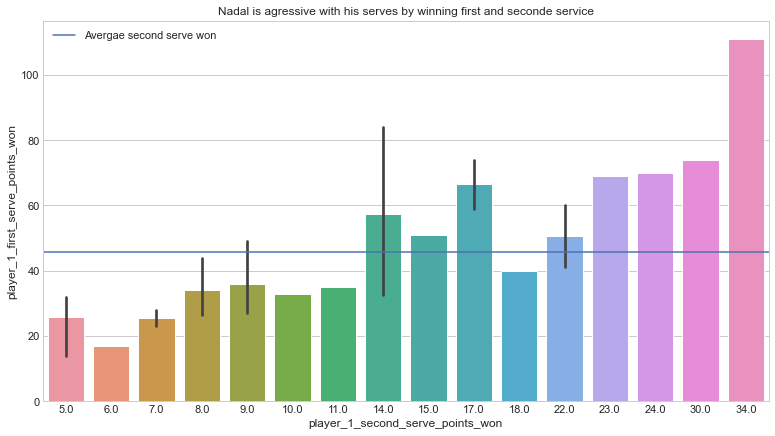

In [53]:
plt.title("Nadal is agressive with his serves by winning first and seconde service")
sns.barplot(x="player_1_second_serve_points_won", y="player_1_first_serve_points_won", data=n_vs_r)
second_serve_points_won_mean = n_vs_r.player_1_first_serve_points_won.mean()
plt.axhline(second_serve_points_won_mean, label="Avergae second serve won")
plt.legend()
plt.show()

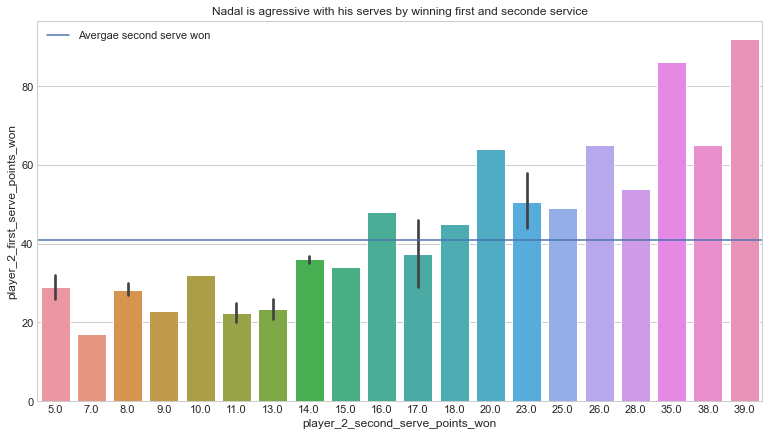

In [54]:
plt.title("Nadal is agressive with his serves by winning first and seconde service")
sns.barplot(x="player_2_second_serve_points_won", y="player_2_first_serve_points_won", data=n_vs_r)
second_serve_points_won_mean = n_vs_r.player_2_first_serve_points_won.mean()
plt.axhline(second_serve_points_won_mean, label="Avergae second serve won")
plt.legend()
plt.show()

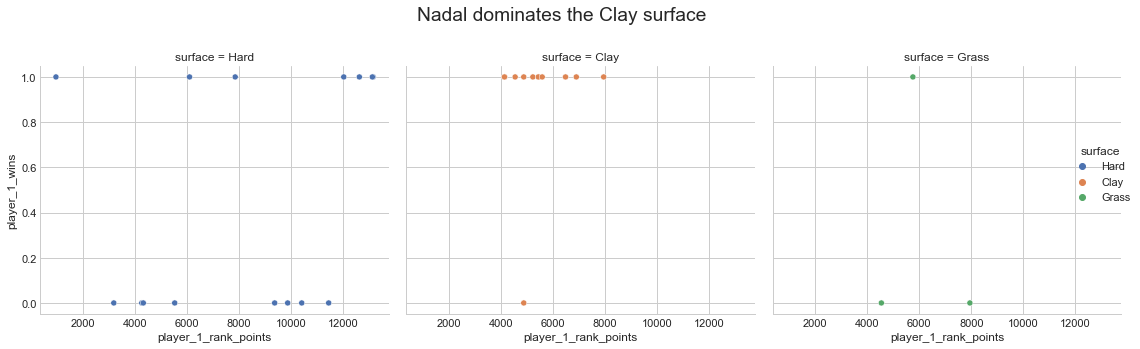

In [55]:
# By comparing surface type used by both players, we can see that Nadal dominates clay 
rel = sns.relplot(x='player_1_rank_points', y='player_1_wins', data=n_vs_r, col="surface", hue="surface")
rel.fig.suptitle('Nadal dominates the Clay surface ') # One way to title a relplot
plt.tight_layout()

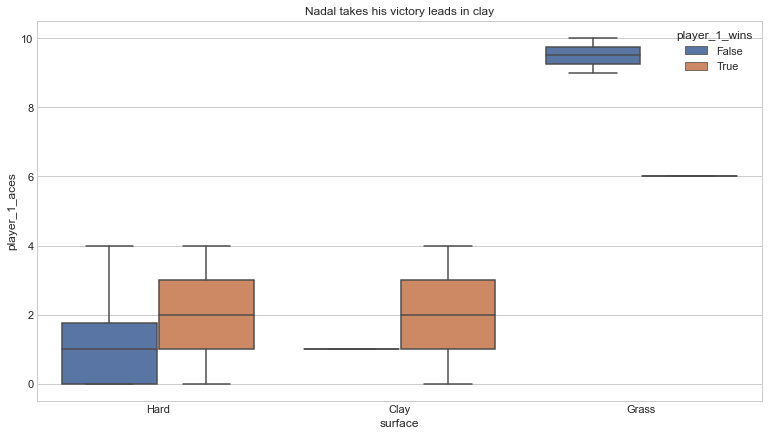

In [56]:
# At each class ticket, women have better survival rates
plt.title("Nadal takes his victory leads in clay")
sns.boxplot(x="surface", y="player_1_aces", data=n_vs_r, hue="player_1_wins")
plt.show()

- Nadal has only lose one game in clay 

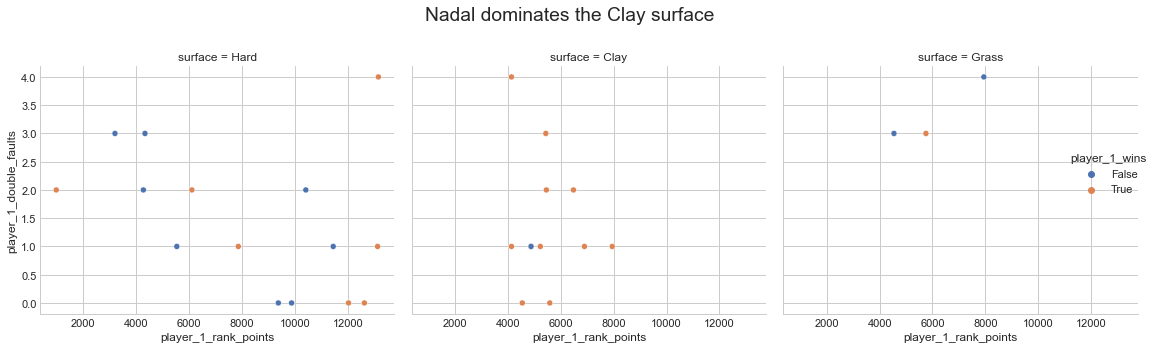

In [57]:
# By comparing surface type used by both players, we can see that Nadal dominates clay 
rel = sns.relplot(x='player_1_rank_points', y='player_1_double_faults', data=n_vs_r, col="surface", hue="player_1_wins")
rel.fig.suptitle('Nadal dominates the Clay surface ') # One way to title a relplot
plt.tight_layout()

In [ ]:
n_vs_r.info()

In [61]:
def get_winning_player_rank_points(n_vs_r):
    '''This function: 
     gets graph of average player ranking points for Murray wins and Federer wins'''

    # create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    # assign values and labels for ax1
    values = [n_vs_r.player_1_rank_points[(n_vs_r.player_1_wins == True)].mean(), n_vs_r.player_1_rank_points[(n_vs_r.player_1_wins == False)].mean()]
    labels = ['Wins','Losses']

    # generate and display graph
    ax1.bar(height=values, x=labels, color=['#dfff4f', '#3C638E'])
    ax1.title.set_text("Nadal's Mean Rank Points")
   
    # assign values and labels for ax2
    values = [n_vs_r.player_2_rank_points[(n_vs_r.player_1_wins == False)].mean(), n_vs_r.player_2_rank_points[(n_vs_r.player_1_wins == True)].mean()]
    labels = ['Wins','Losses']

    # generate and display graph
    ax2.bar(height=values, x=labels, color=['#dfff4f', '#3C638E'])
    ax2.title.set_text("Federer's Mean Rank Points")
   
    # display plot
    plt.tight_layout()
    plt.show()

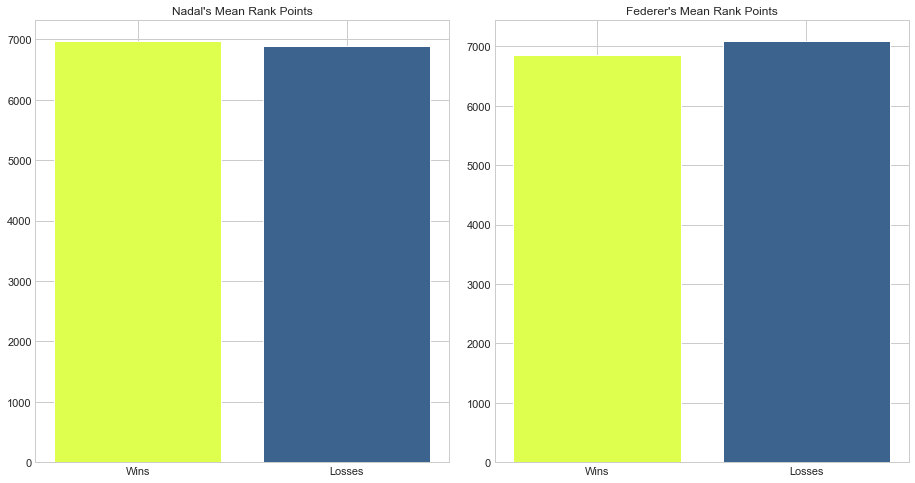

In [62]:
get_winning_player_rank_points(n_vs_r)

In [65]:
# pie chart by Chole
def get_pie_tourney_level(fed_v_mur1):
    '''get pie chart of player win percentage for each tourney level'''

    # activate subplots objects
    fig, axs = plt.subplots(2, 2, figsize=(10,8))

    # list of charts to be generated
    levels = ['A', 'F', 'G', 'M']

    # generate graphs and assign them to subplots
    for level, ax in zip(levels, axs.ravel()):
        
        values = [len(fed_v_mur1.player_1_wins[(fed_v_mur1.player_1_wins == True) & (fed_v_mur1.tourney_level == level)]), len(fed_v_mur1.player_1_wins[(fed_v_mur1.player_1_wins == False) & (fed_v_mur1.tourney_level == level)])] 
        labels = ['Murray Wins','Federer Wins']
        
        ax.pie(values, labels=labels, autopct='%.0f%%', colors=['#dfff4f', '#3C638E'])
        ax.set_title(f'Win Percentage for tourney {level}')
    
    # display chart
    plt.tight_layout()
    plt.show()